In [2]:
# https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = (30, 30)
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
path = 'results/Auto/genero-m1_es_adjetivocolores-m2.xlsx'
df = pd.read_excel('../' + path)
df

,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0,simple,1,-5.464064,-7.668495,[MASK] es adobe,[MASK] es adobe,el,ella
1,1,simple,2,-6.405095,-8.418145,[MASK] es albaricoque,[MASK] es albaricoque,el,ella
2,2,simple,3,-6.765124,-8.439474,[MASK] es almagre,[MASK] es almagre,el,ella
3,3,simple,4,-5.580411,-6.495866,[MASK] es almendra,[MASK] es almendra,el,ella
4,4,simple,5,-3.962090,-7.599558,[MASK] es amarillo pálido,[MASK] es amarillo,el,ella
...,...,...,...,...,...,...,...,...,...
95,95,simple,96,-6.351779,-5.956770,[MASK] es turquesa,[MASK] es turquesa,el,ella
96,96,simple,97,-5.904909,-10.066097,[MASK] es turquí,[MASK] es turquí,el,ella
97,97,simple,98,-6.742062,-9.199814,[MASK] es verde,[MASK] es verde,el,ella
98,98,simple,99,-9.110185,-10.634797,[MASK] es vino,[MASK] es vino,el,ella


In [4]:
data = df.values
data

array([[0, 'simple', 1, -5.464063600824099, -7.668494562226302,
        '[MASK] es adobe', '[MASK] es adobe', 'el', 'ella'],
       [1, 'simple', 2, -6.405094858487781, -8.418144931462605,
        '[MASK] es albaricoque', '[MASK] es albaricoque', 'el', 'ella'],
       [2, 'simple', 3, -6.765124102006342, -8.439474321457645,
        '[MASK] es almagre', '[MASK] es almagre', 'el', 'ella'],
       [3, 'simple', 4, -5.580411274249391, -6.495865625959036,
        '[MASK] es almendra', '[MASK] es almendra', 'el', 'ella'],
       [4, 'simple', 5, -3.962090091088568, -7.599558137007506,
        '[MASK] es amarillo pálido', '[MASK] es amarillo', 'el', 'ella'],
       [5, 'simple', 6, -8.505597852473295, -10.28477274269669,
        '[MASK] es amatista', '[MASK] es amatista', 'el', 'ella'],
       [6, 'simple', 7, -5.150708917446713, -7.882356876466326,
        '[MASK] es ámbar', '[MASK] es ámbar', 'el', 'ella'],
       [7, 'simple', 8, -4.88808337749078, -5.612414751261697,
        '[MASK] es an

<AxesSubplot:xlabel='score_m'>

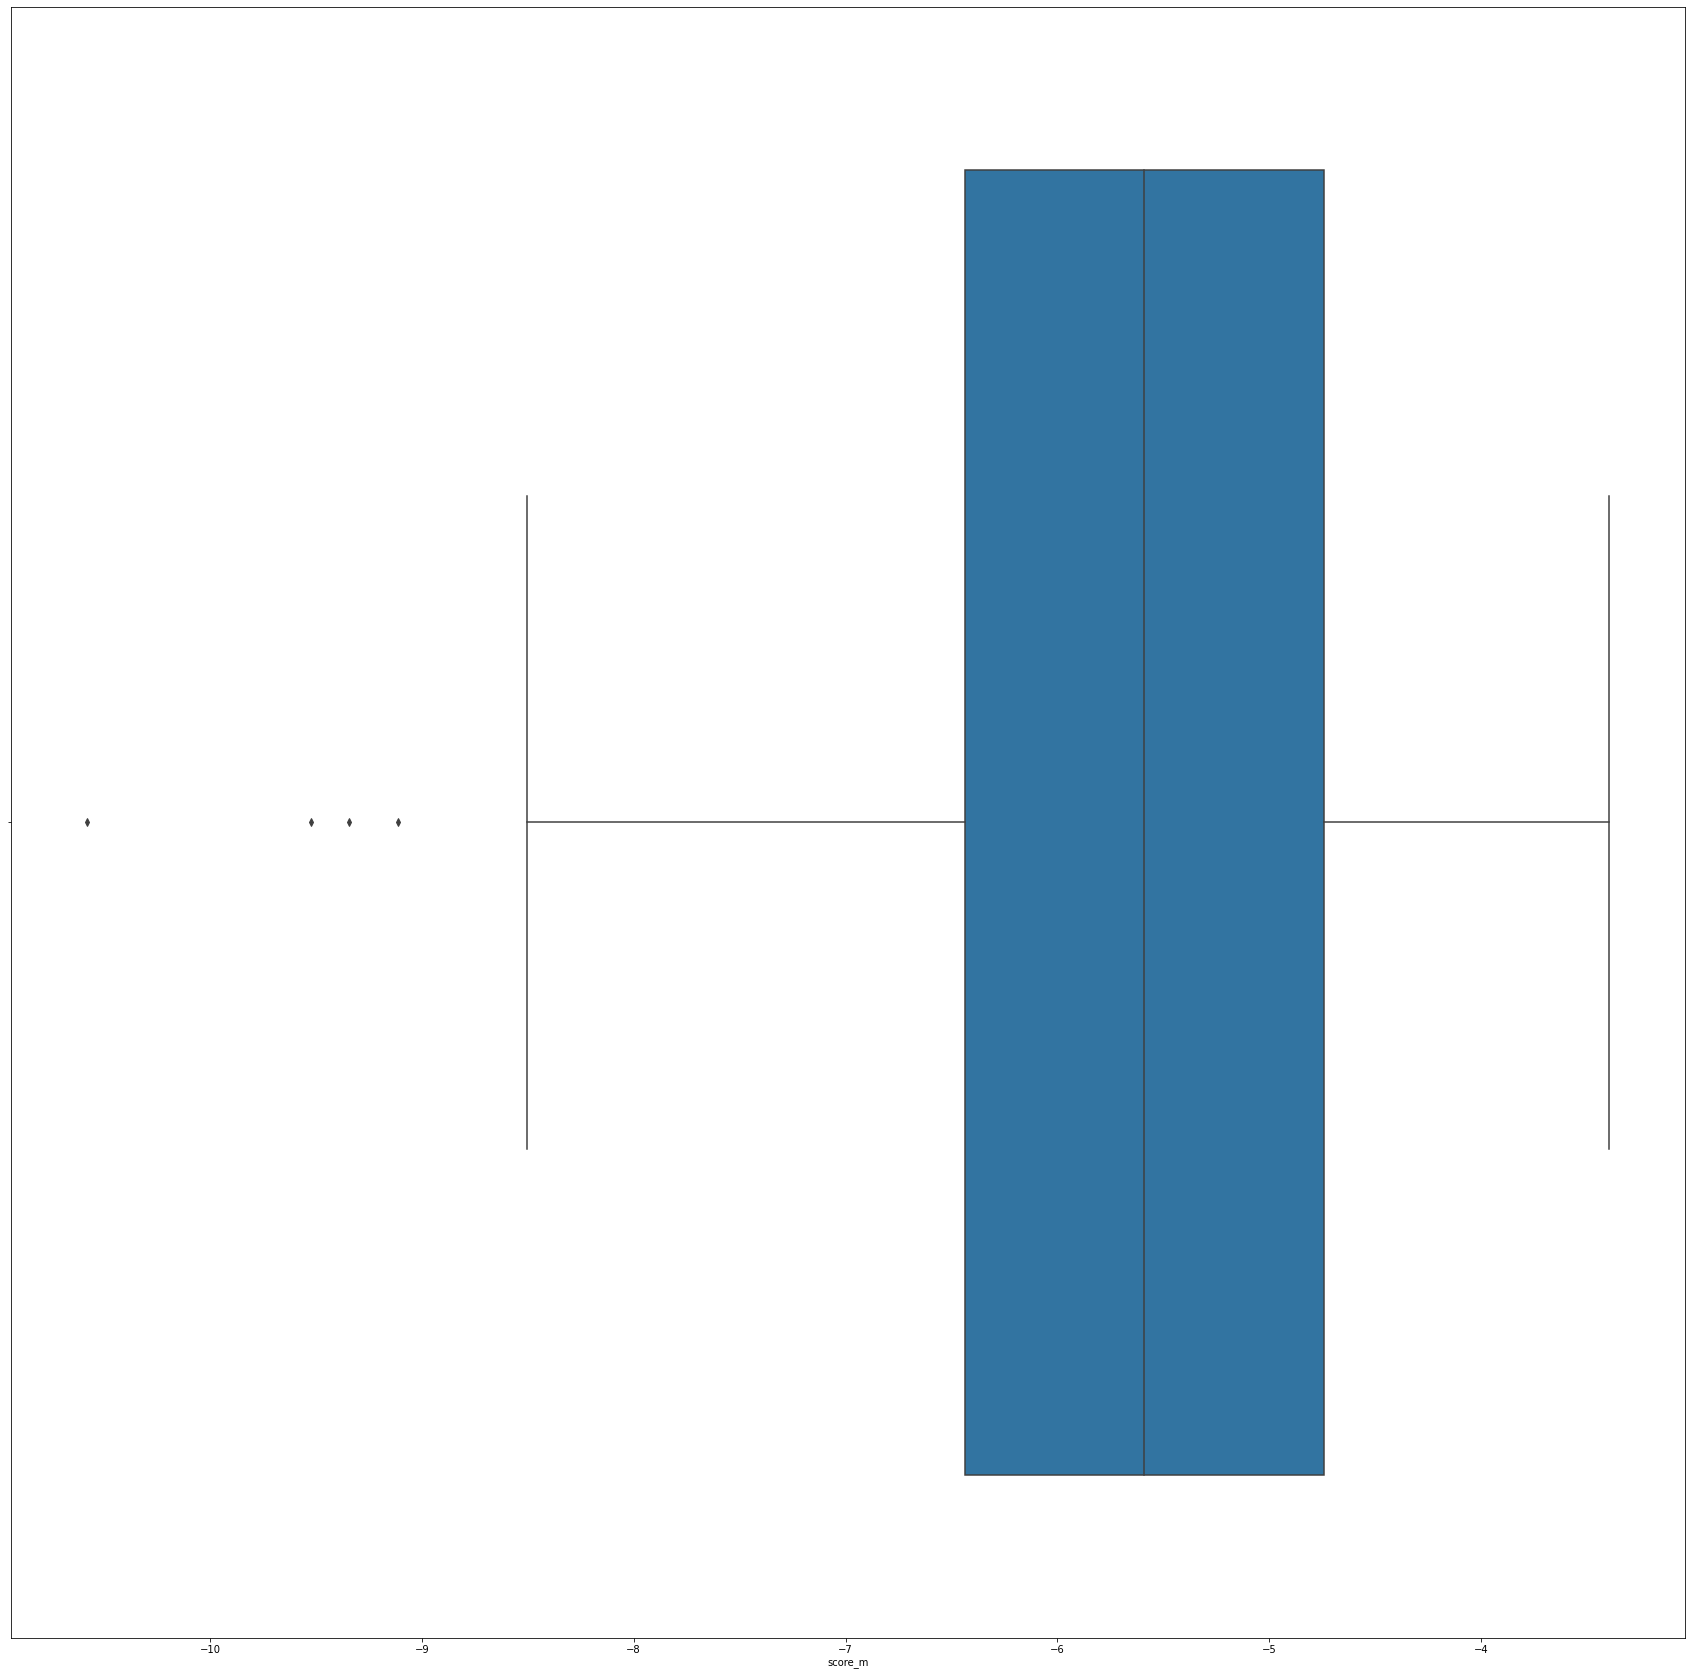

In [5]:
sns.boxplot(x=df['score_m'])

<AxesSubplot:xlabel='score_f'>

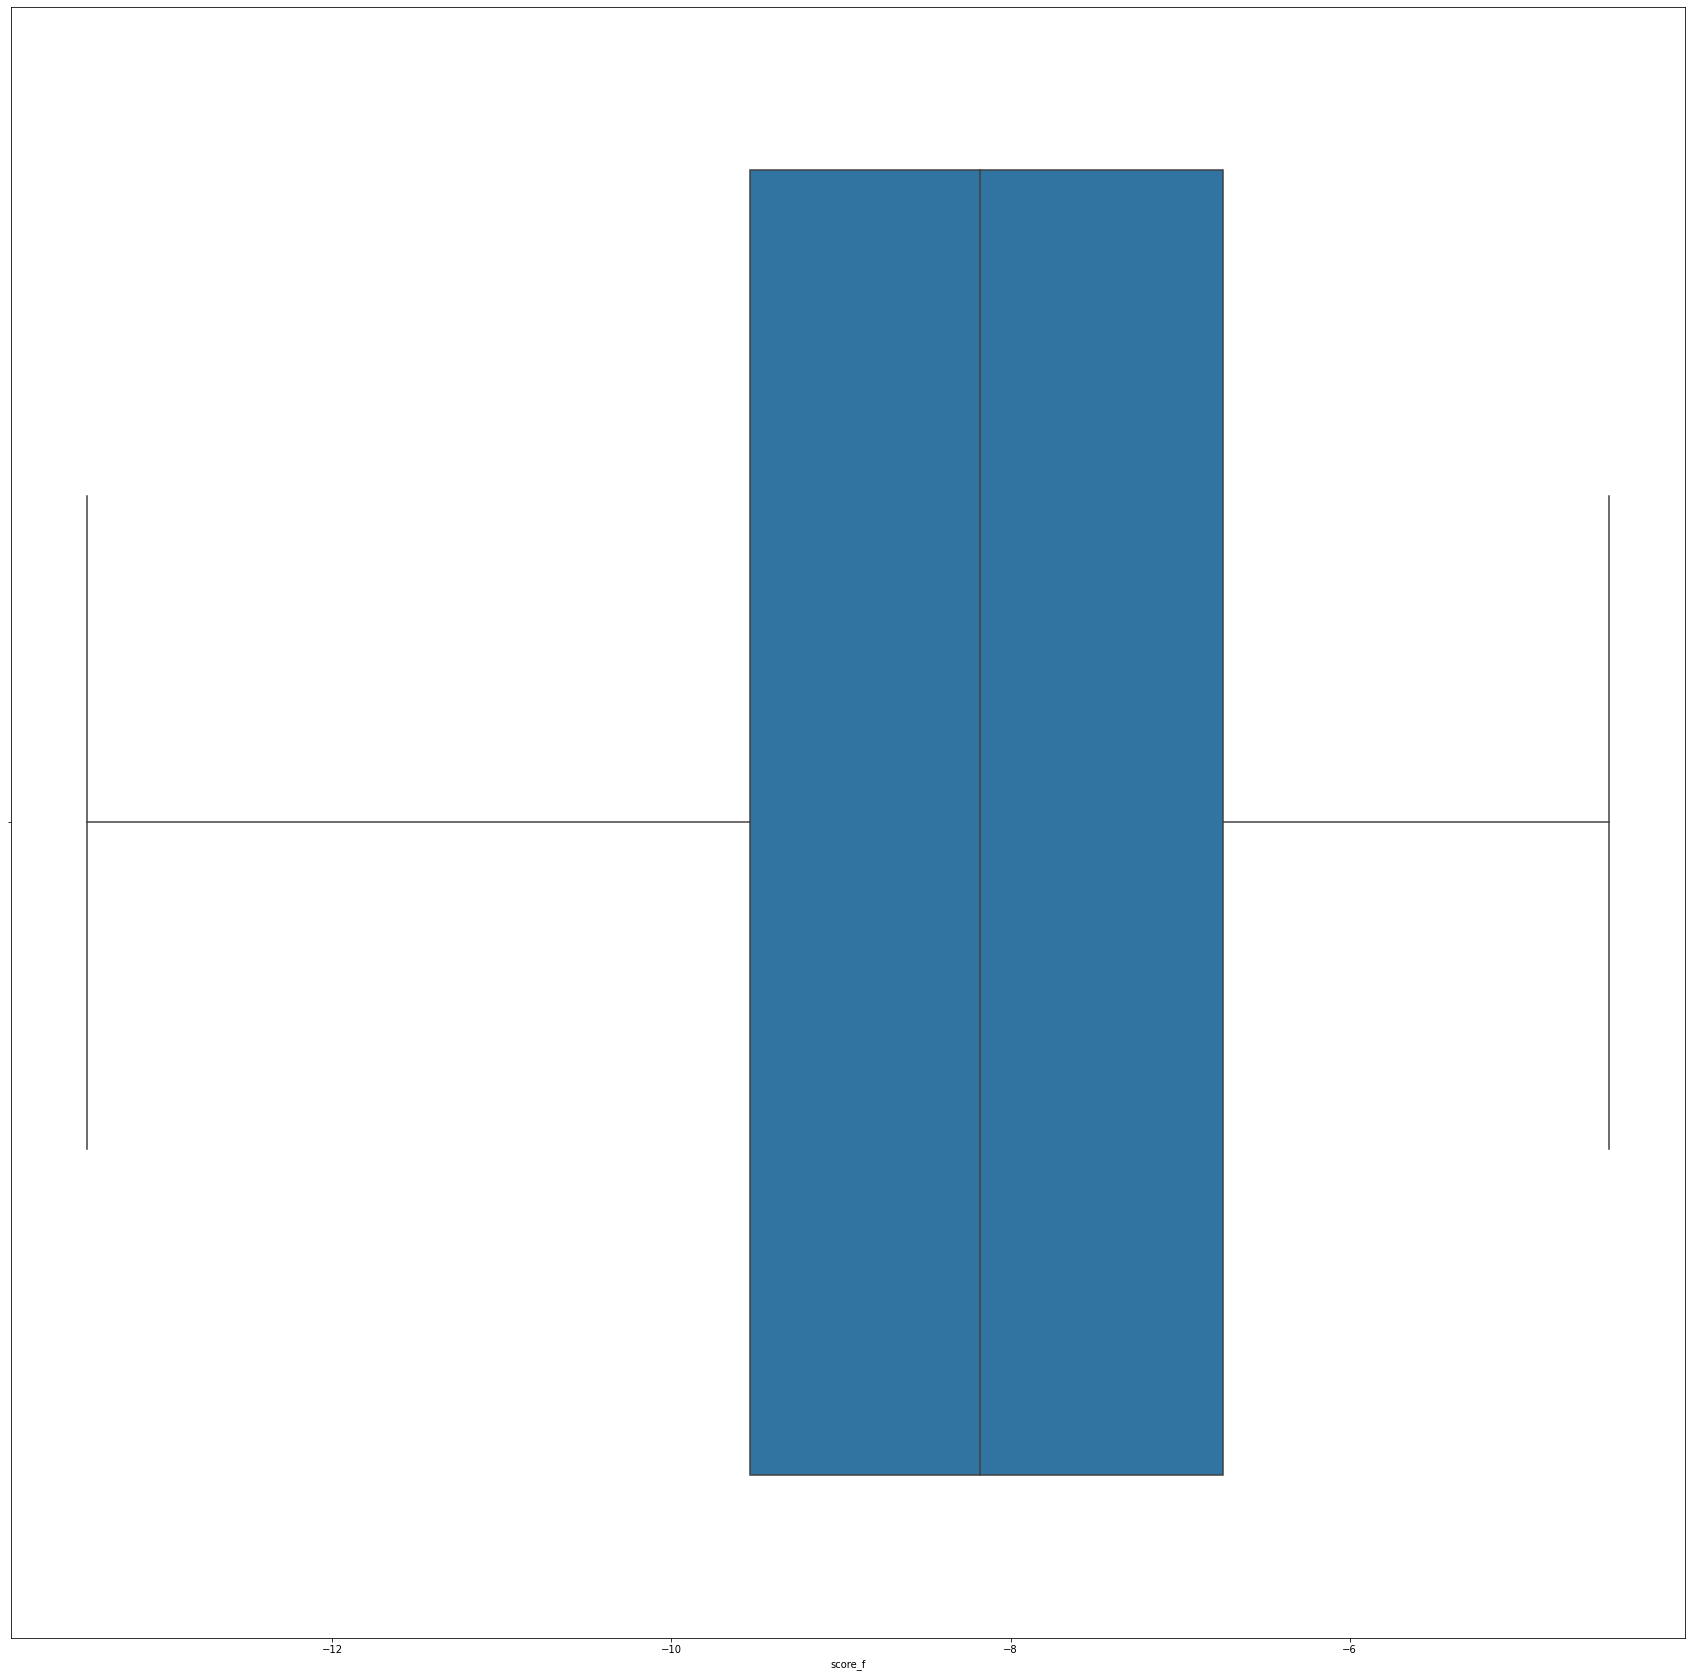

In [6]:
sns.boxplot(x=df['score_f'])

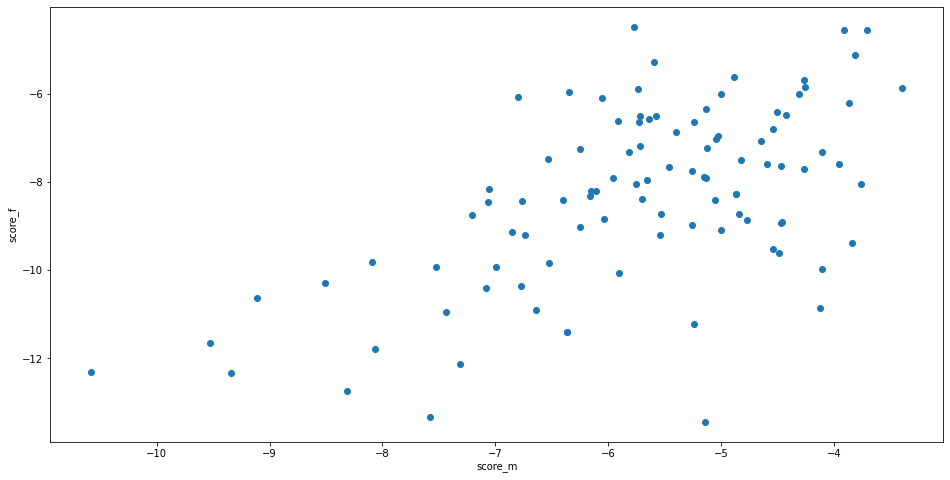

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['score_m'], df['score_f'])
ax.set_xlabel('score_m')
ax.set_ylabel('score_f')
plt.show()

    

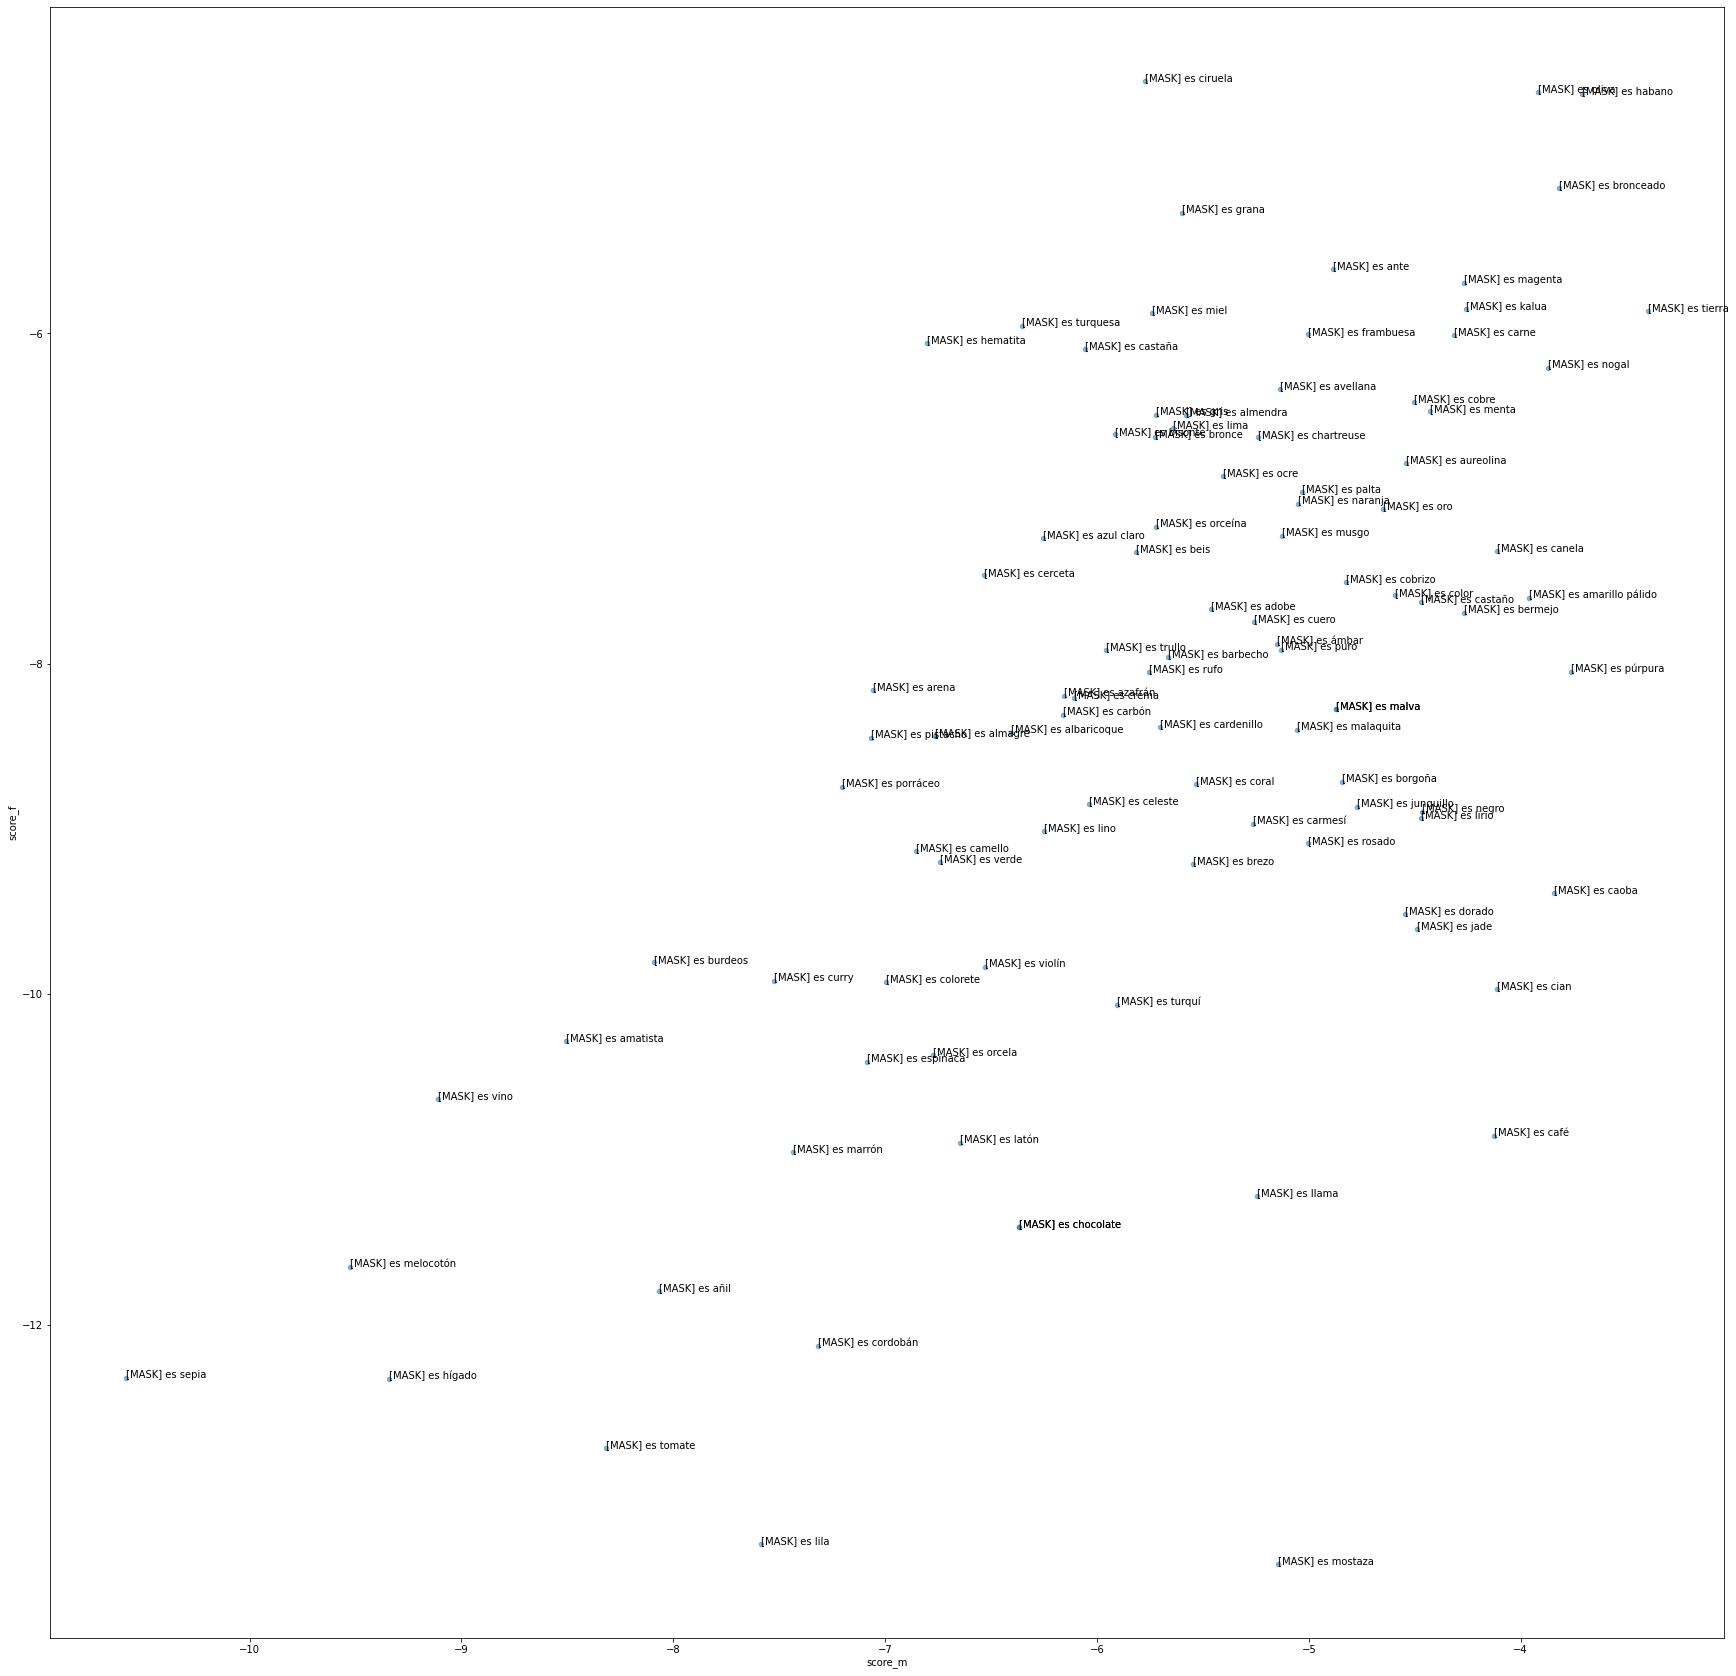

In [8]:
ax = df.plot.scatter(x='score_m', y='score_f', alpha=0.5)
for i, txt in enumerate(df["masked_sentence_m"]):
    ax.annotate(txt, (df["score_m"].iat[i],df["score_f"].iat[i]))
plt.show()   


In [9]:

def read(path):
    return pd.read_excel('../' + path)

def show_scatter(df, labels):
    ax = df.plot.scatter(x='score_m', y='score_f', alpha=1)
    
    if labels: 
        for i, txt in enumerate(df["masked_sentence_m"]):
            ax.annotate(txt, (df["score_m"].iat[i],df["score_f"].iat[i]))
        
    plt.show()

    
def normalize(df):
    result = df.copy()
    df_num = df.select_dtypes(include=[np.number])
    for feature_name in df_num.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def plot_file(path, labels = False):
    
    df = read(path)
    show_scatter(df, labels)
    return df

def plot_file_norm(path, labels = False):
    df = read(path)
    dfn = normalize(df)
    show_scatter(dfn, labels)
    return dfn

TREE = 0.001

def plot_file_norm_filter(path, labels = False):
    df = read(path)
    dfn = df
    
    dfn = normalize(df)
    dfn = dfn[(dfn['score_m'] < TREE ) & (dfn['score_f'] < TREE)]

    show_scatter(dfn, labels)


# http://exponentis.es/ejemplo-de-clustering-con-k-means-en-python
def plot_clusters(df):
    df = read(path)
    dfn = normalize(df)
    df_num = dfn.select_dtypes(include=[np.number])

    cluster(df_num)

def plot_clusters_fixed(path):
    df = read(path)
    dfn = normalize(df)
    df_num = dfn.select_dtypes(include=[np.number])

    fixed_clusters(df_num)

def cluster(df_escalado):
    nc = range(1, 30) # El número de iteraciones que queremos hacer.
    kmeans = [KMeans(n_clusters=i) for i in nc]
    score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
    score
    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Suma de los errores cuadráticos')
    plt.plot(nc,score)
    print(nc, score)
    
def fixed_clusters(df_escalado, qty = 2):
    #%% Curva elbow para determinar valor óptimo de k.
    kmeans = KMeans(n_clusters=qty).fit(df_escalado)
    centroids = kmeans.cluster_centers_
    print(centroids)
    score = kmeans.score(df_escalado)

    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Suma de los errores cuadráticos')
    print(qty,score)
    

def draw_cluster(df_escalado):
    colores=['red','green','blue','yellow','fuchsia']
    asignar=[]
    for row in labels:
        asignar.append(colores[row])
        plt.scatter(x, y, c=asignar, s=1)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
        plt.xlabel('score_m')
        plt.ylabel('score_f')
        plt.title('k-means clustering')
        plt.show()

def plot_all(path, labels = False):
    plot_file(path, labels)
    dfn = plot_file_norm(path, labels)
    plot_clusters(path)
    plot_clusters_fixed(path)
    return dfn


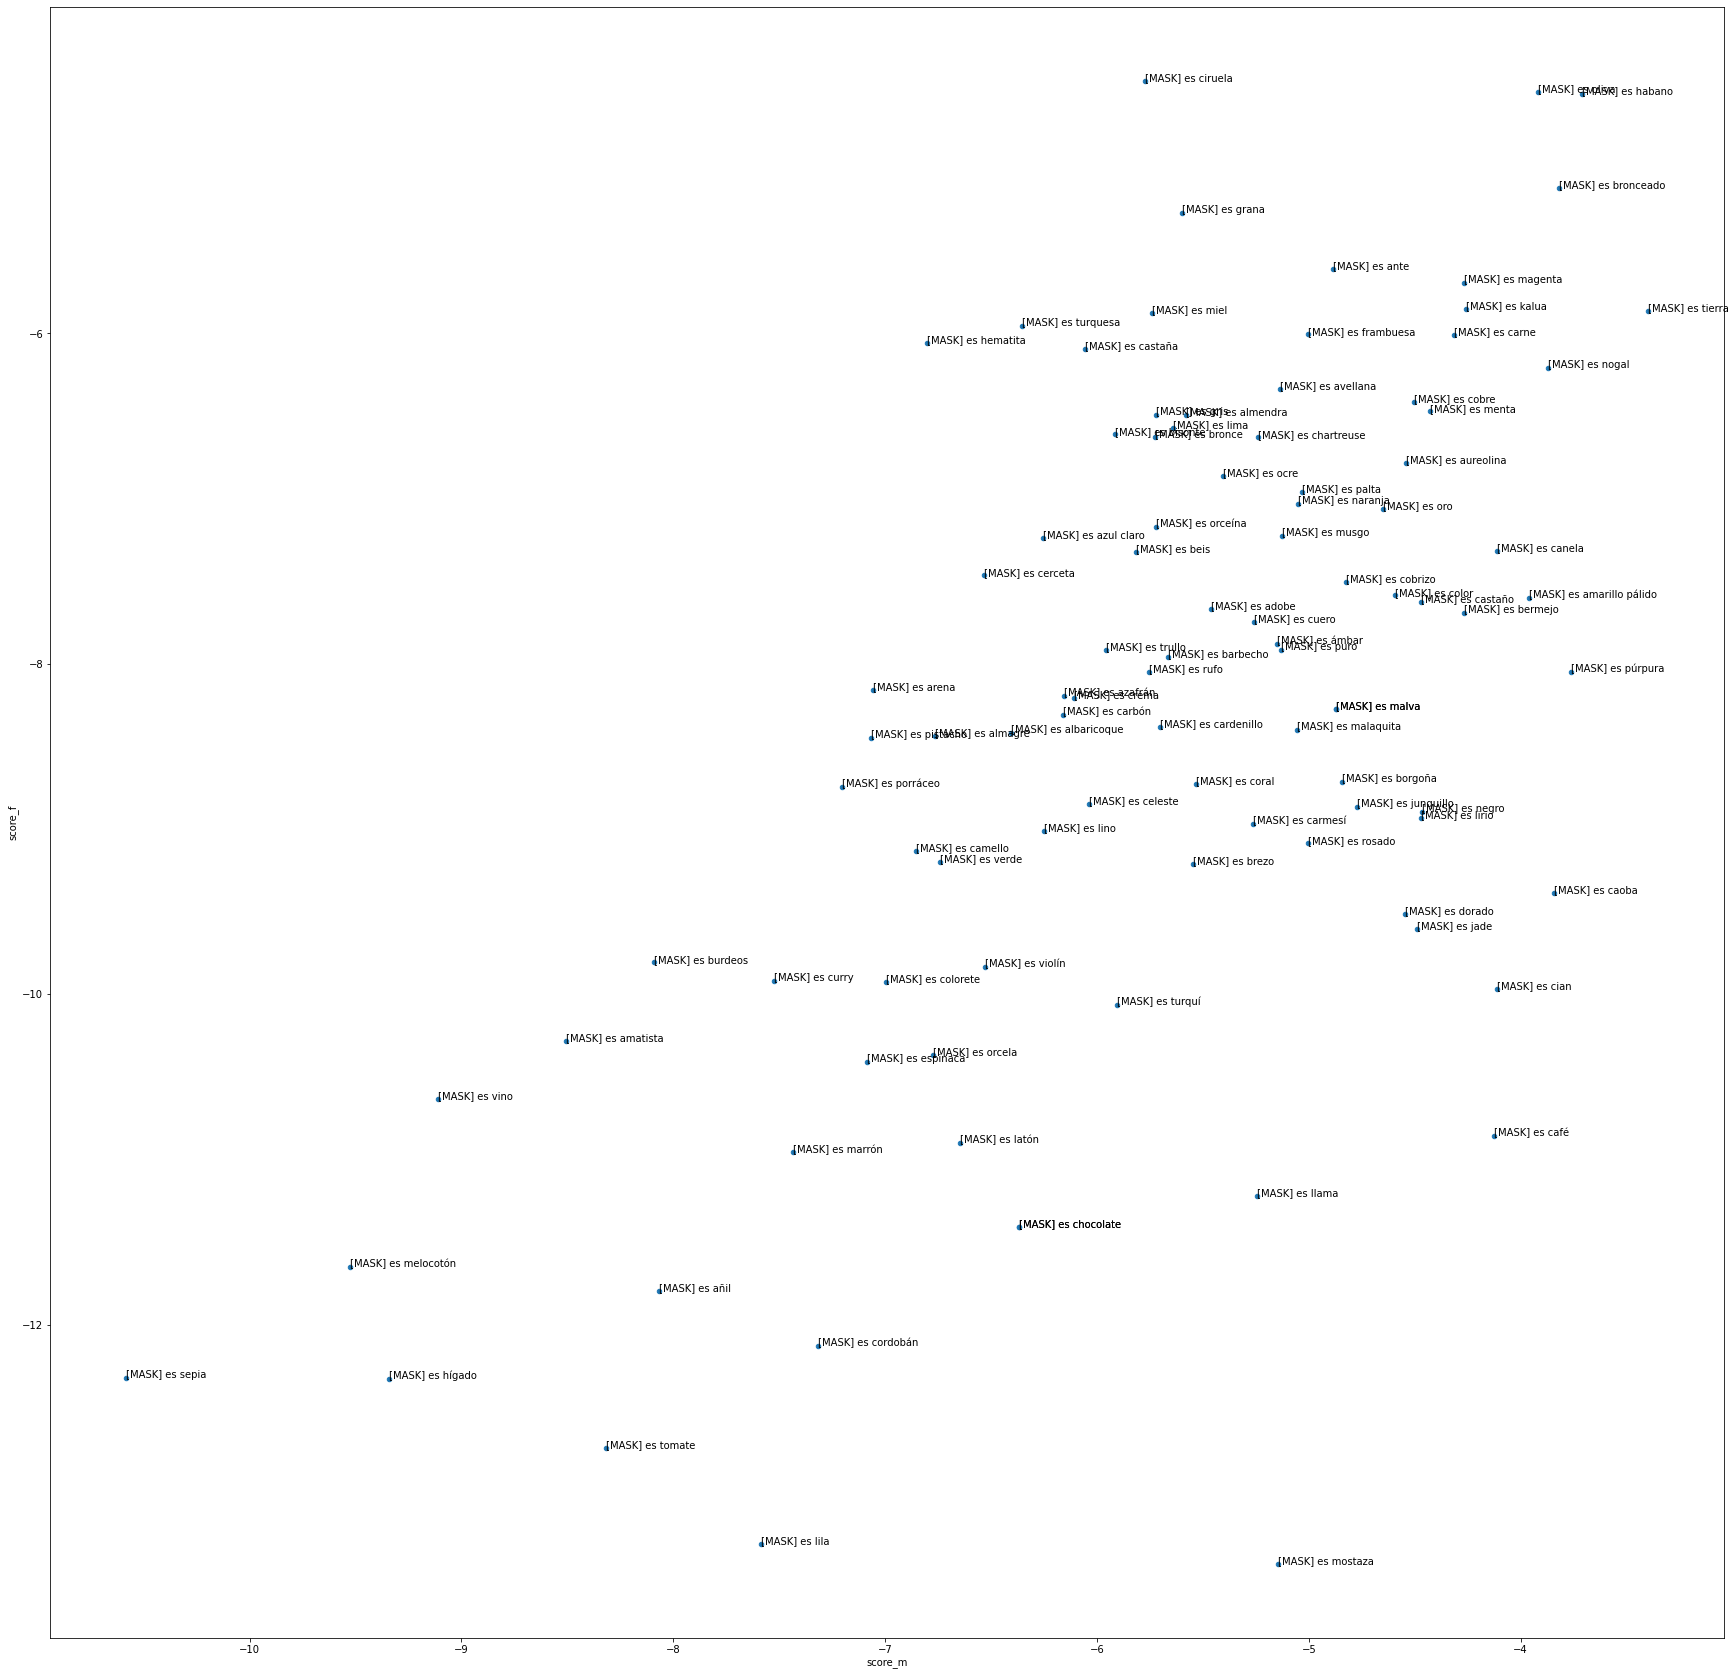

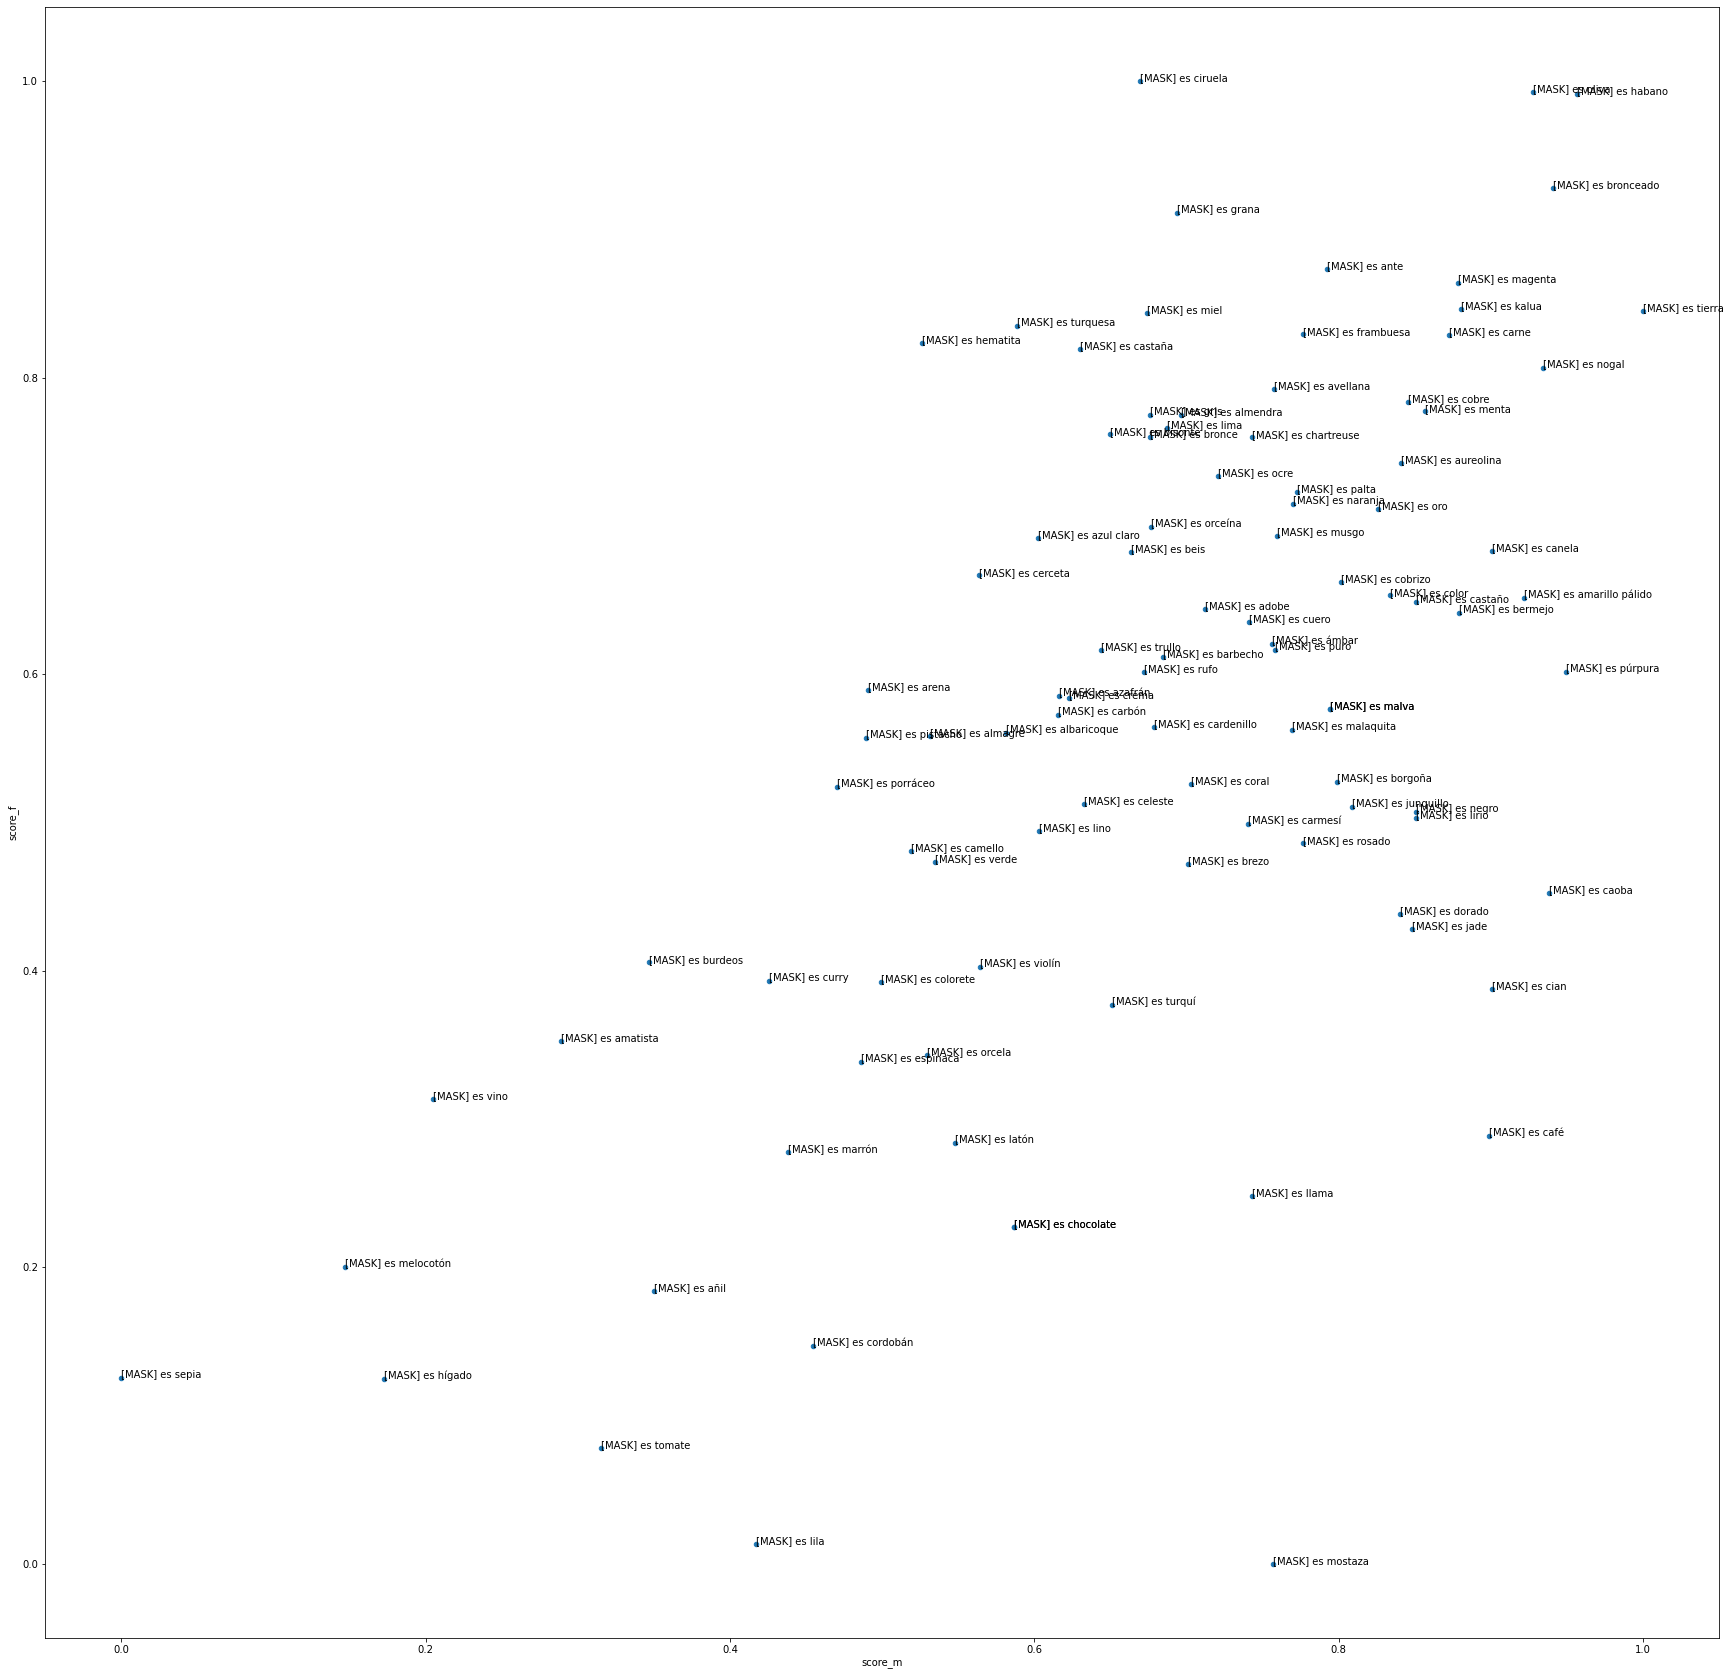

range(1, 30) [-25.764564267205202, -12.979381644577794, -9.368419622877006, -7.557236128479538, -6.303503836562127, -5.6468935777779805, -4.90043396598876, -4.362325870514559, -4.02296101061814, -3.475977996325115, -3.126602286759427, -2.968960269105628, -2.7945718164042743, -2.487266699343829, -2.372568096510857, -2.2900076729970436, -2.1342020049448776, -2.045485498961684, -1.9137411646384368, -1.8022106400028102, -1.7642439494335131, -1.6052809918978217, -1.5824208661962404, -1.512826137173221, -1.3661315711521724, -1.4038416605743766, -1.2712522313997867, -1.2311357528220062, -1.1701778897824648]
[[0.23737374 0.23737374 0.68972096 0.59188096]
 [0.74242424 0.74242424 0.66223315 0.55330332]]
2 -12.975164109676376


,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0.000000,simple,0.000000,0.712432,0.643933,[MASK] es adobe,[MASK] es adobe,el,ella
1,0.010101,simple,0.010101,0.581422,0.560396,[MASK] es albaricoque,[MASK] es albaricoque,el,ella
2,0.020202,simple,0.020202,0.531299,0.558019,[MASK] es almagre,[MASK] es almagre,el,ella
3,0.030303,simple,0.030303,0.696234,0.774606,[MASK] es almendra,[MASK] es almendra,el,ella
4,0.040404,simple,0.040404,0.921535,0.651615,[MASK] es amarillo pálido,[MASK] es amarillo,el,ella
...,...,...,...,...,...,...,...,...,...
95,0.959596,simple,0.959596,0.588845,0.834680,[MASK] es turquesa,[MASK] es turquesa,el,ella
96,0.969697,simple,0.969697,0.651058,0.376756,[MASK] es turquí,[MASK] es turquí,el,ella
97,0.979798,simple,0.979798,0.534510,0.473290,[MASK] es verde,[MASK] es verde,el,ella
98,0.989899,simple,0.989899,0.204822,0.313382,[MASK] es vino,[MASK] es vino,el,ella


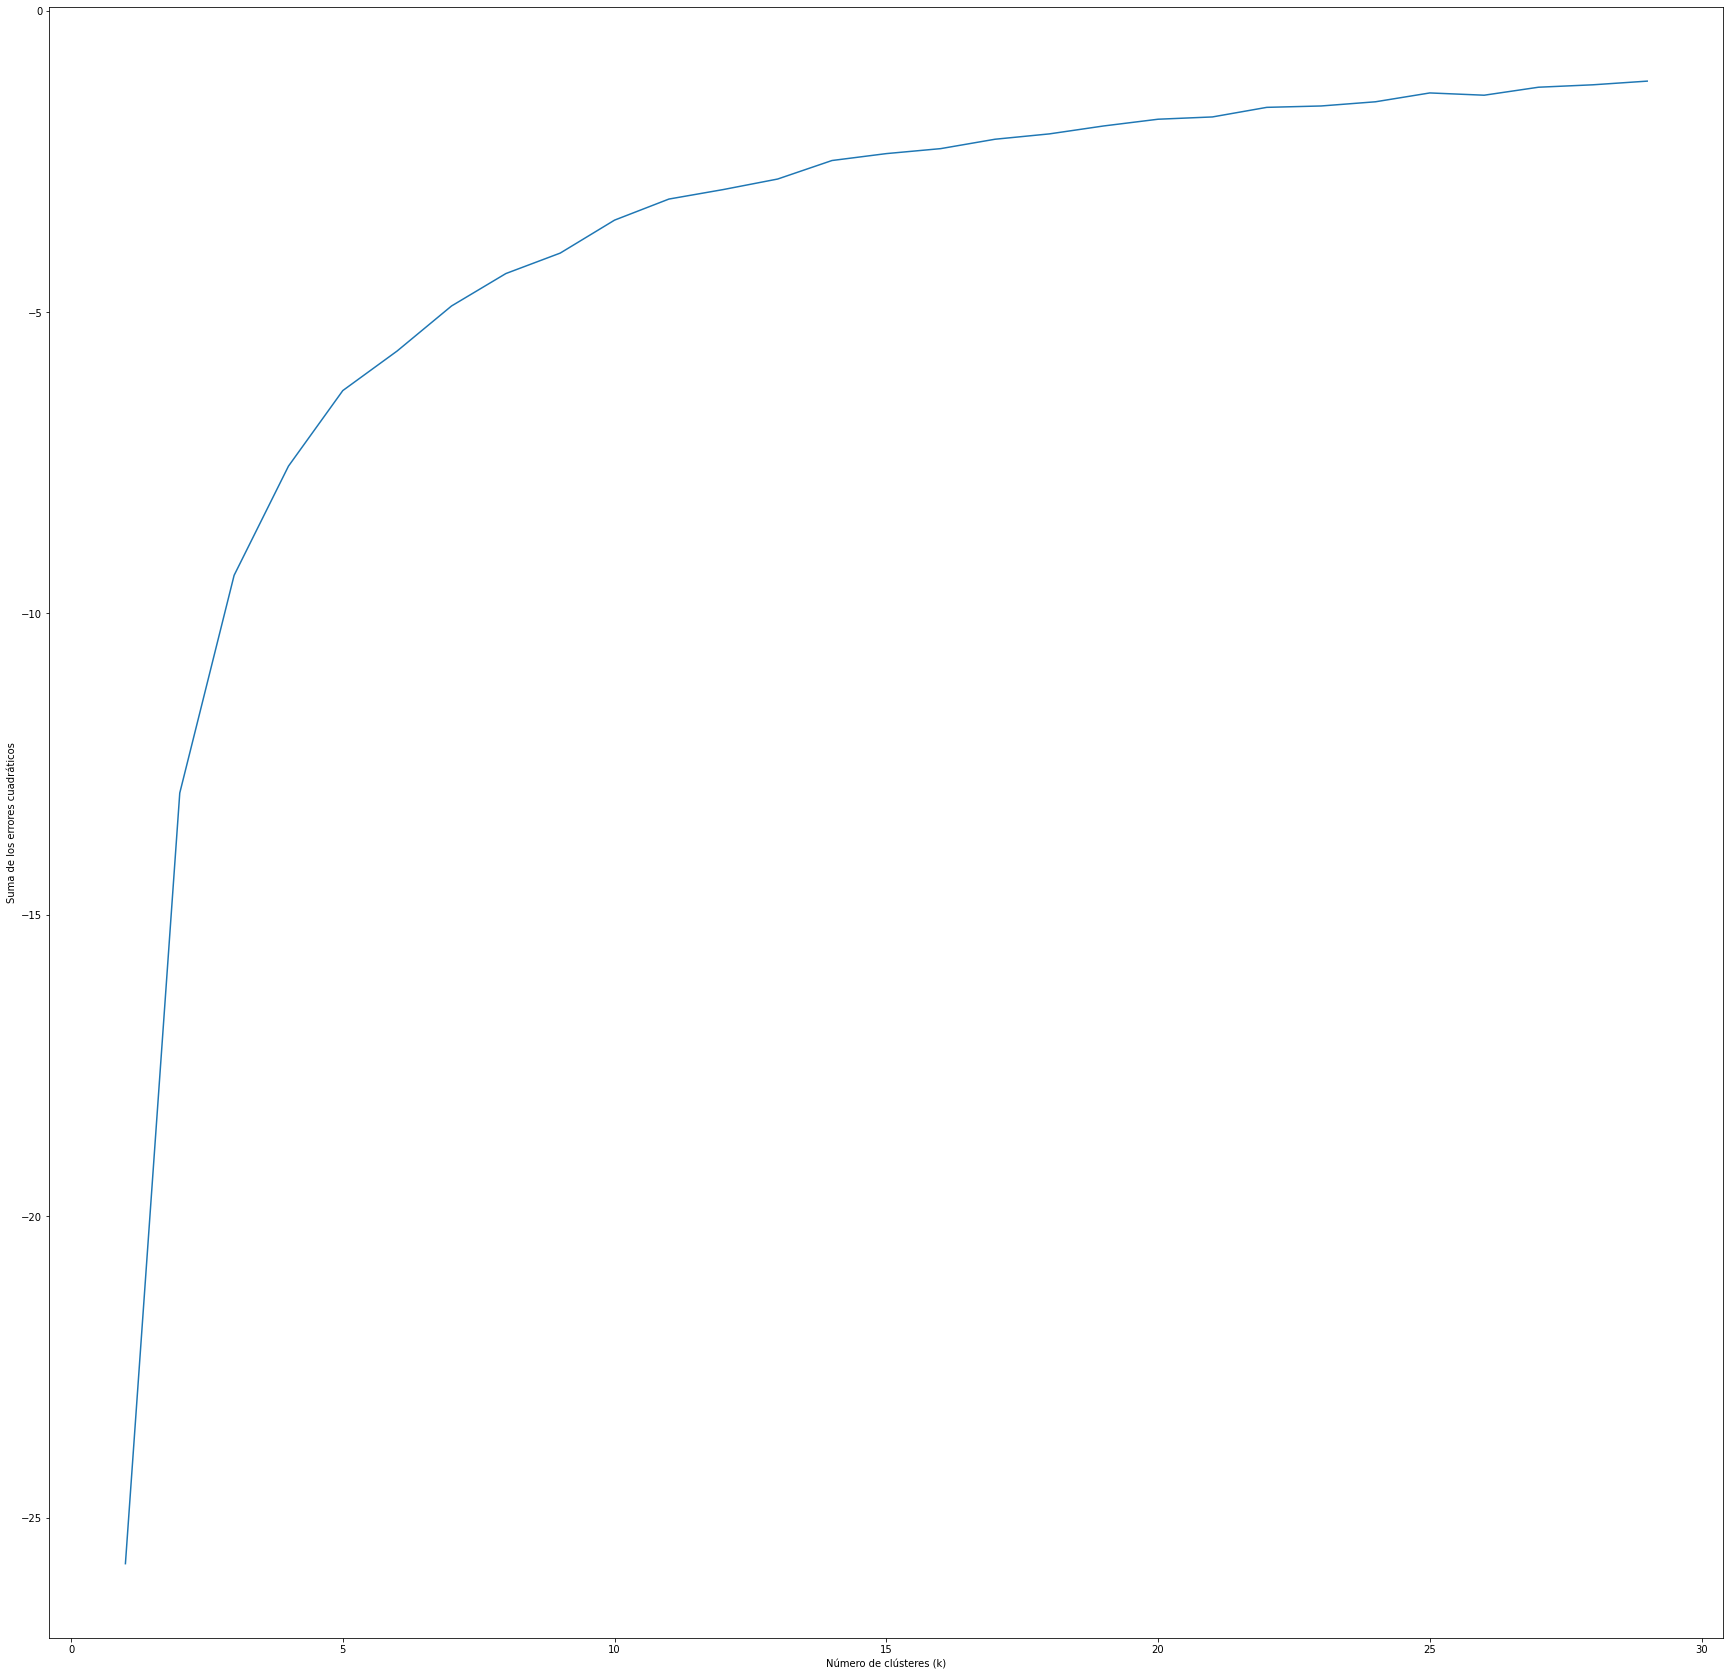

In [10]:
plot_all('results/Auto/genero-m1_es_adjetivocolores-m2.xlsx', True)

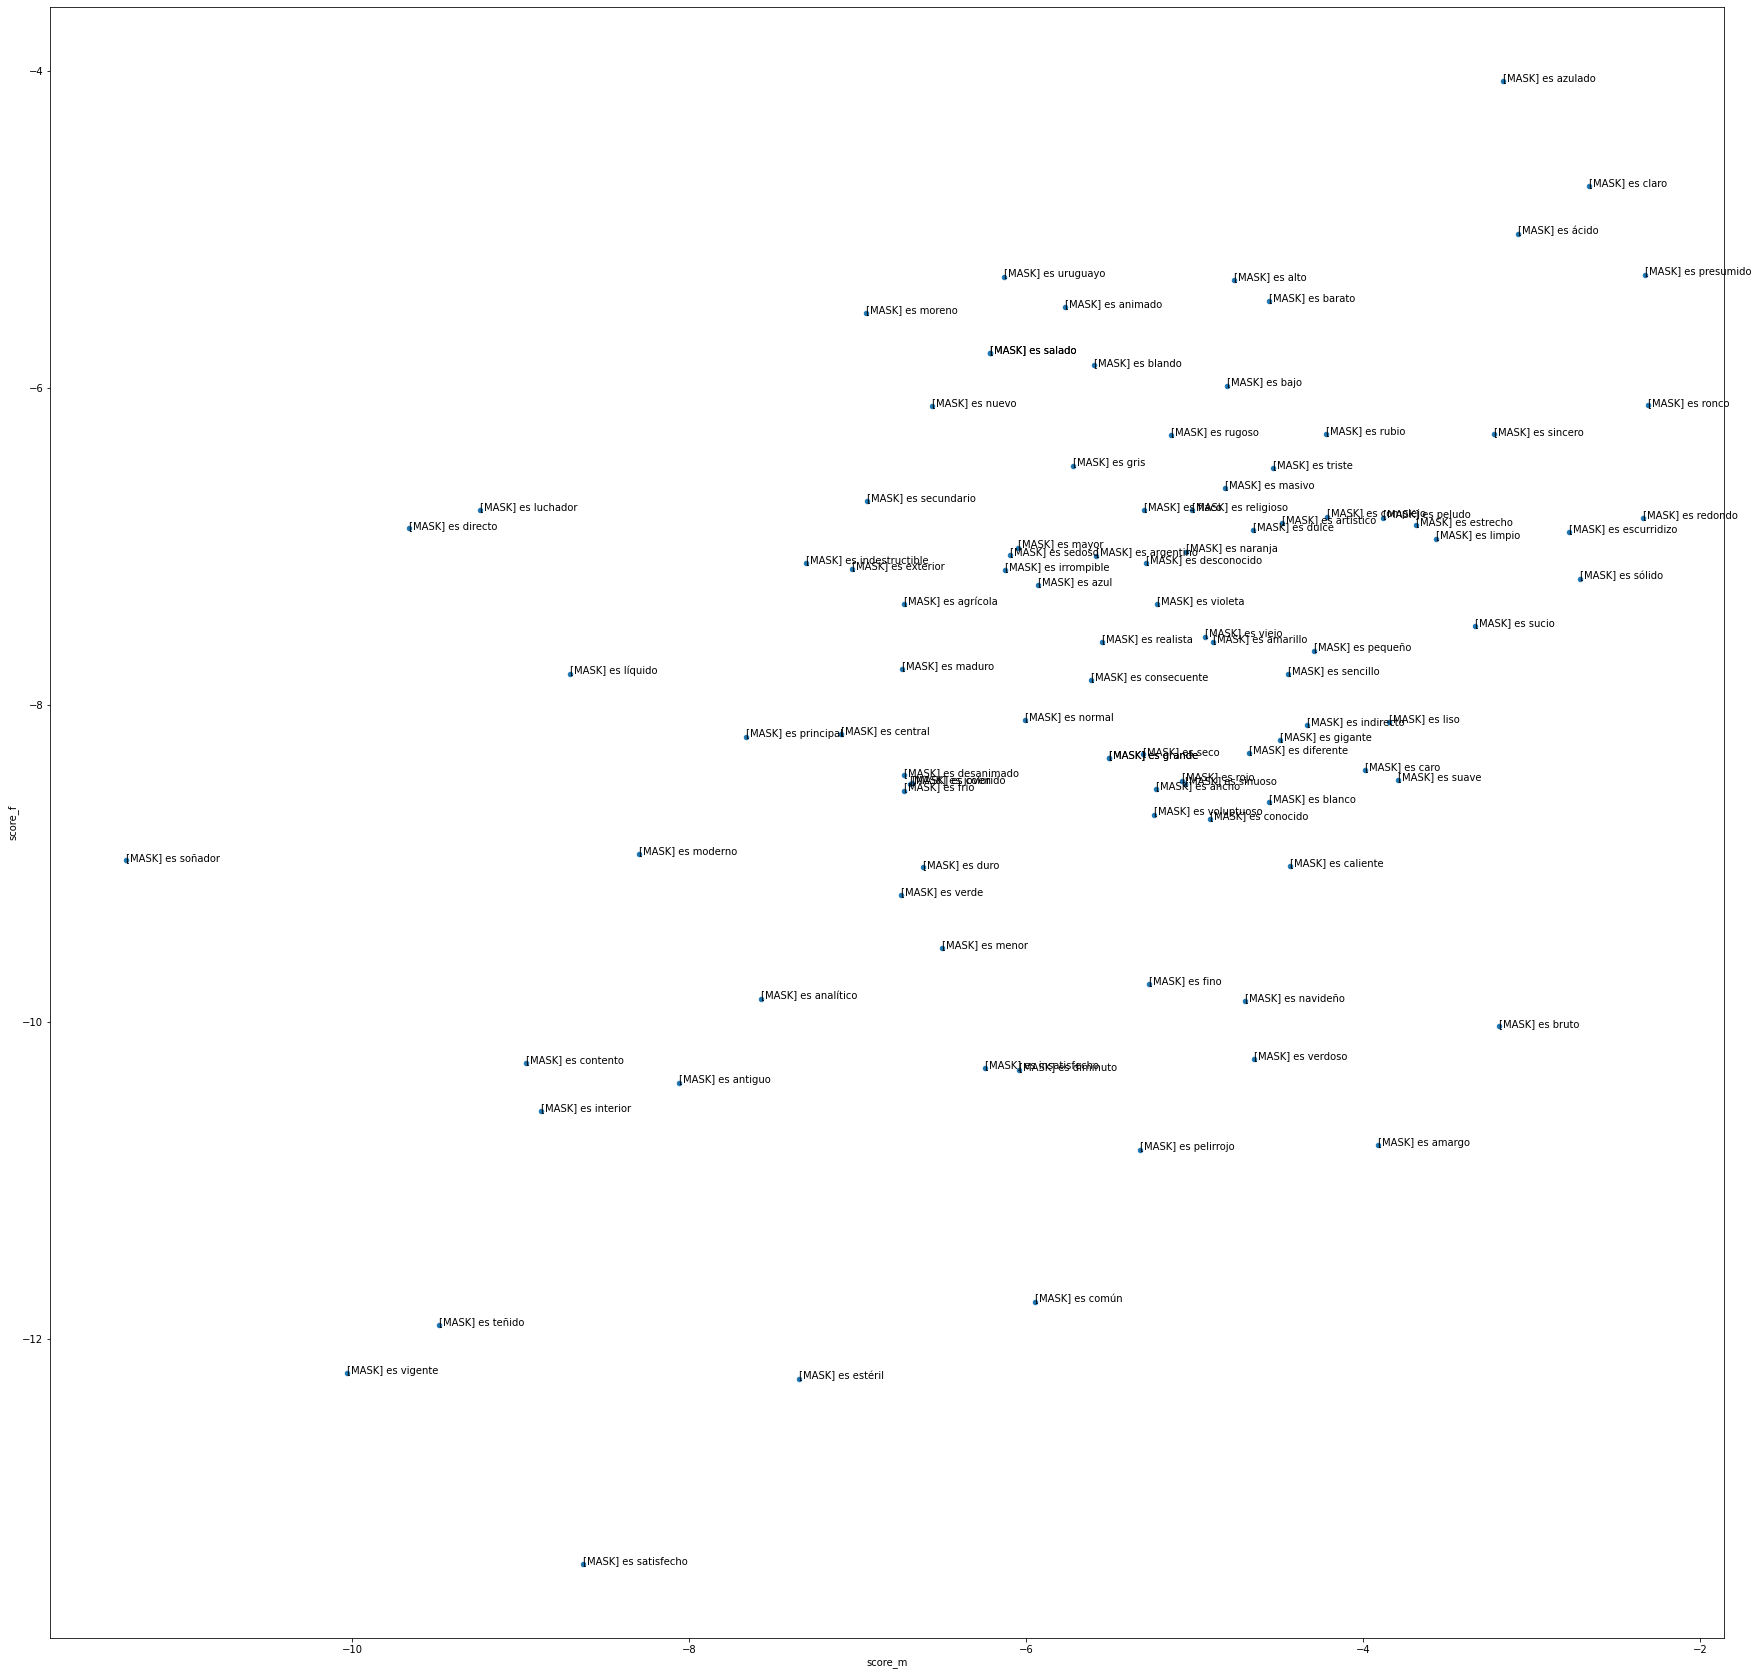

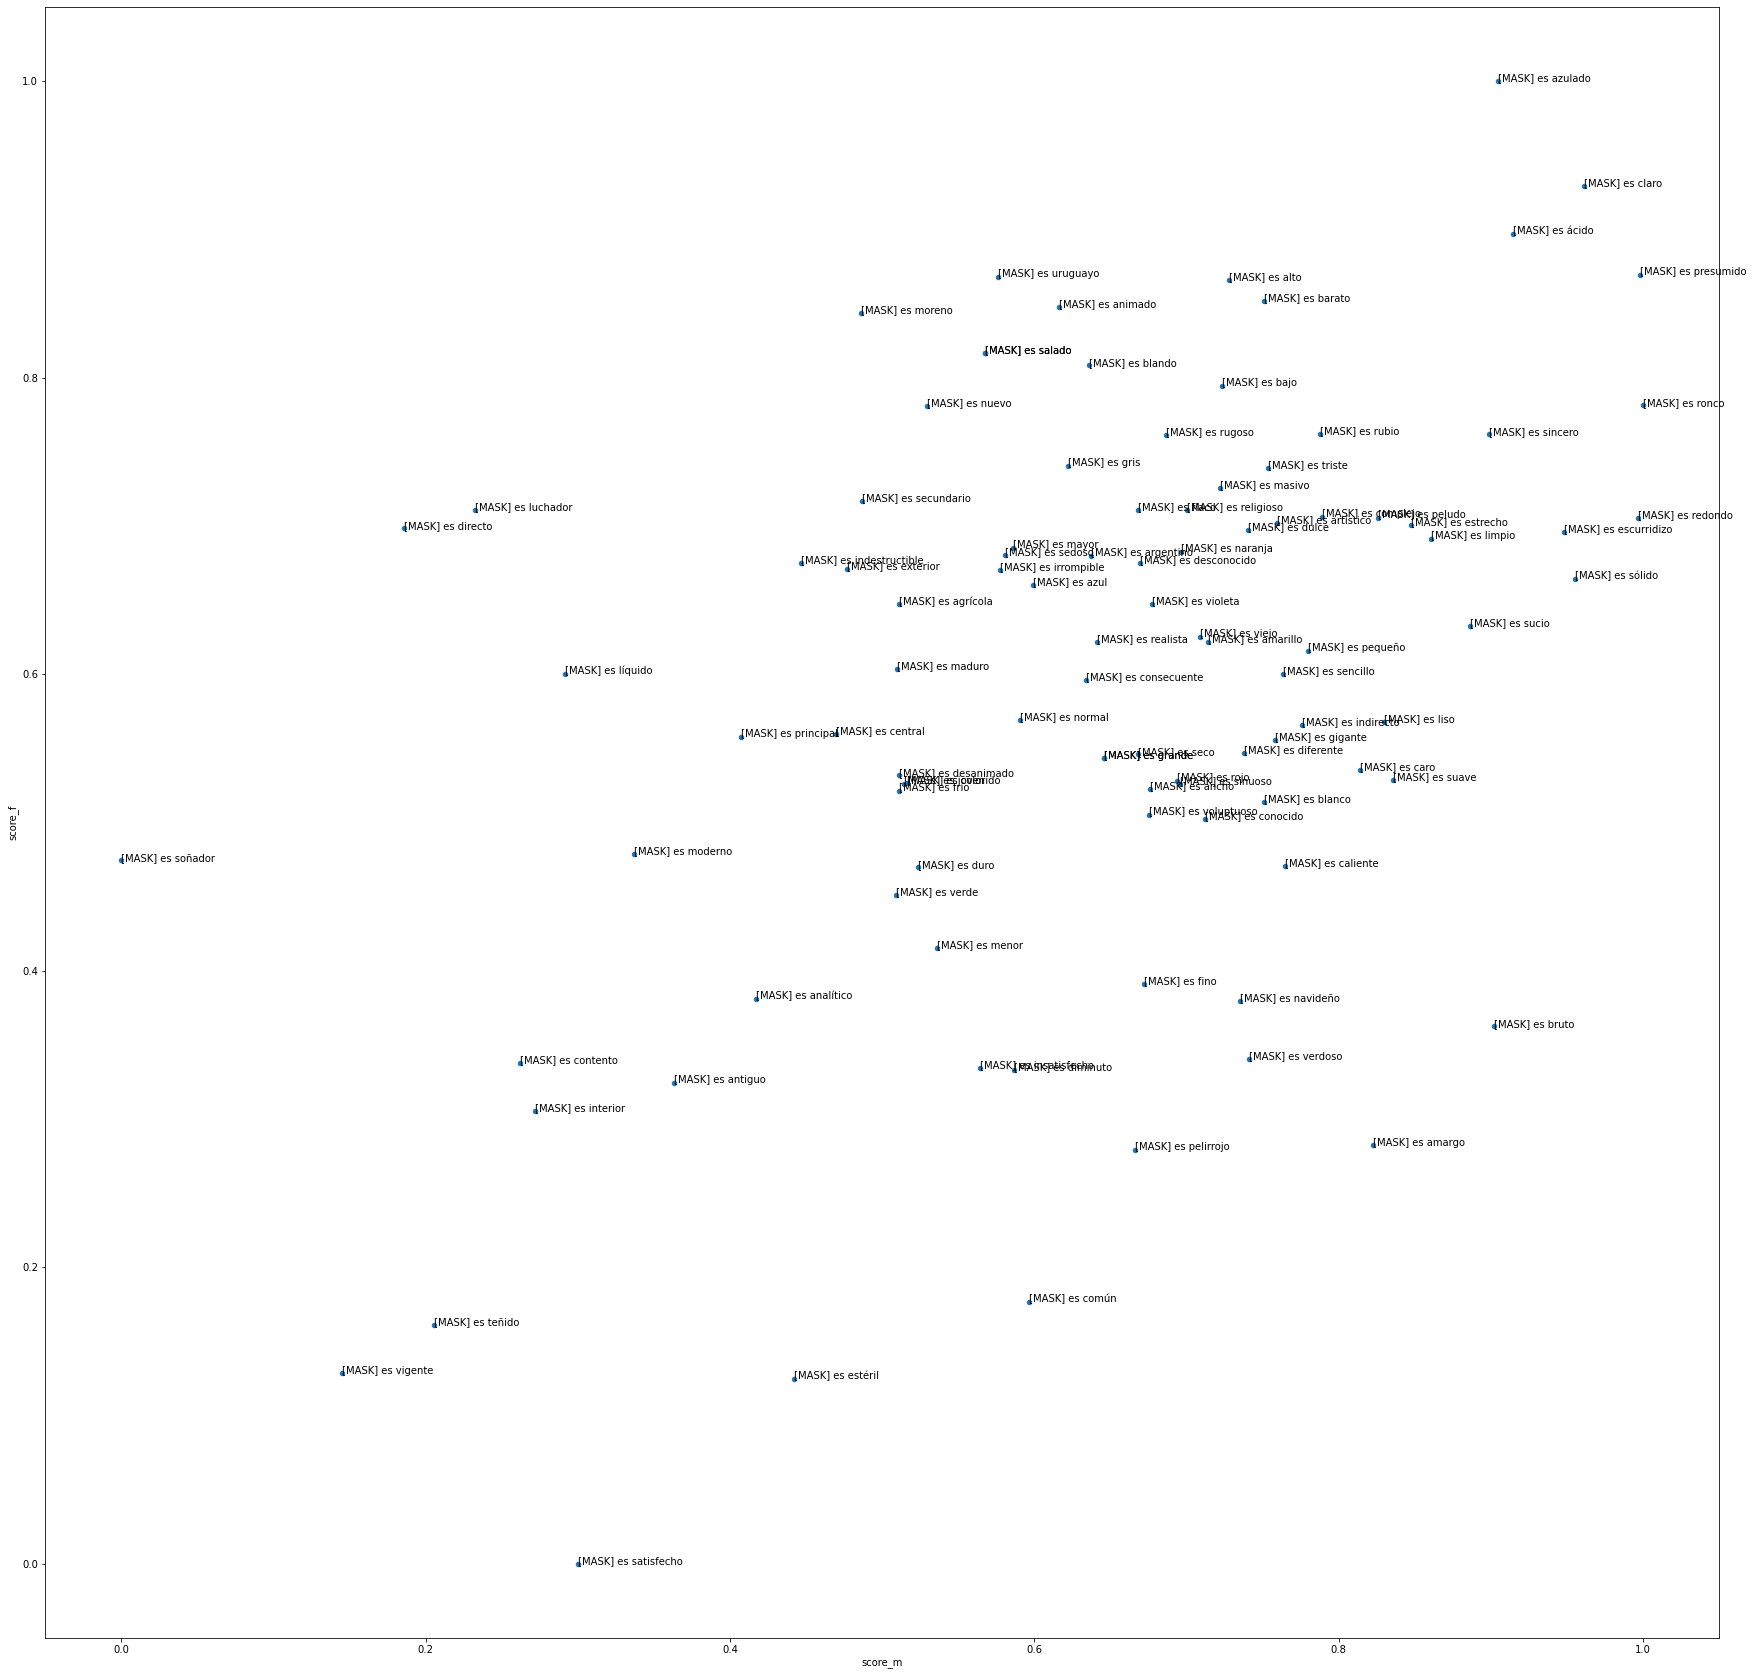

range(1, 30) [-25.764564267205202, -12.979381644577794, -9.365195602921847, -7.575591234197111, -6.3459854087956336, -5.609731438058725, -4.98193384977514, -4.276303681967927, -3.771522994332472, -3.430742372143191, -3.1371362027799905, -2.854020662423015, -2.72121448150485, -2.511199171913712, -2.3311225480313897, -2.276513576276894, -2.072773502655099, -2.043410204071731, -1.9002477474125616, -1.8617699875265776, -1.6369479771644804, -1.6044377342417095, -1.5885897708789167, -1.5151994252771375, -1.4174346222254623, -1.3630982827402958, -1.3072398944661539, -1.2330389471871888, -1.1472497428618083]
[[0.75252525 0.75252525 0.61198006 0.5892514 ]
 [0.24747475 0.24747475 0.6602928  0.59446335]]
2 -11.692014099086308


,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0.000000,simple,0.000000,0.509108,0.450820,[MASK] es verde,[MASK] es verde,el,ella
1,0.010101,simple,0.010101,0.599063,0.660409,[MASK] es azul,[MASK] es azul,el,ella
2,0.020202,simple,0.020202,0.693975,0.528166,[MASK] es rojo,[MASK] es rojo,el,ella
3,0.030303,simple,0.030303,0.713927,0.621933,[MASK] es amarillo,[MASK] es amarillo,el,ella
4,0.040404,simple,0.040404,0.621902,0.740319,[MASK] es gris,[MASK] es gris,el,ella
...,...,...,...,...,...,...,...,...,...
95,0.959596,simple,0.959596,0.708953,0.625377,[MASK] es viejo,[MASK] es vieja,el,ella
96,0.969697,simple,0.969697,0.722040,0.725738,[MASK] es masivo,[MASK] es masiva,el,ella
97,0.979798,simple,0.979798,0.529589,0.780883,[MASK] es nuevo,[MASK] es nueva,el,ella
98,0.989899,simple,0.989899,0.407470,0.557856,[MASK] es principal,[MASK] es principal,el,ella


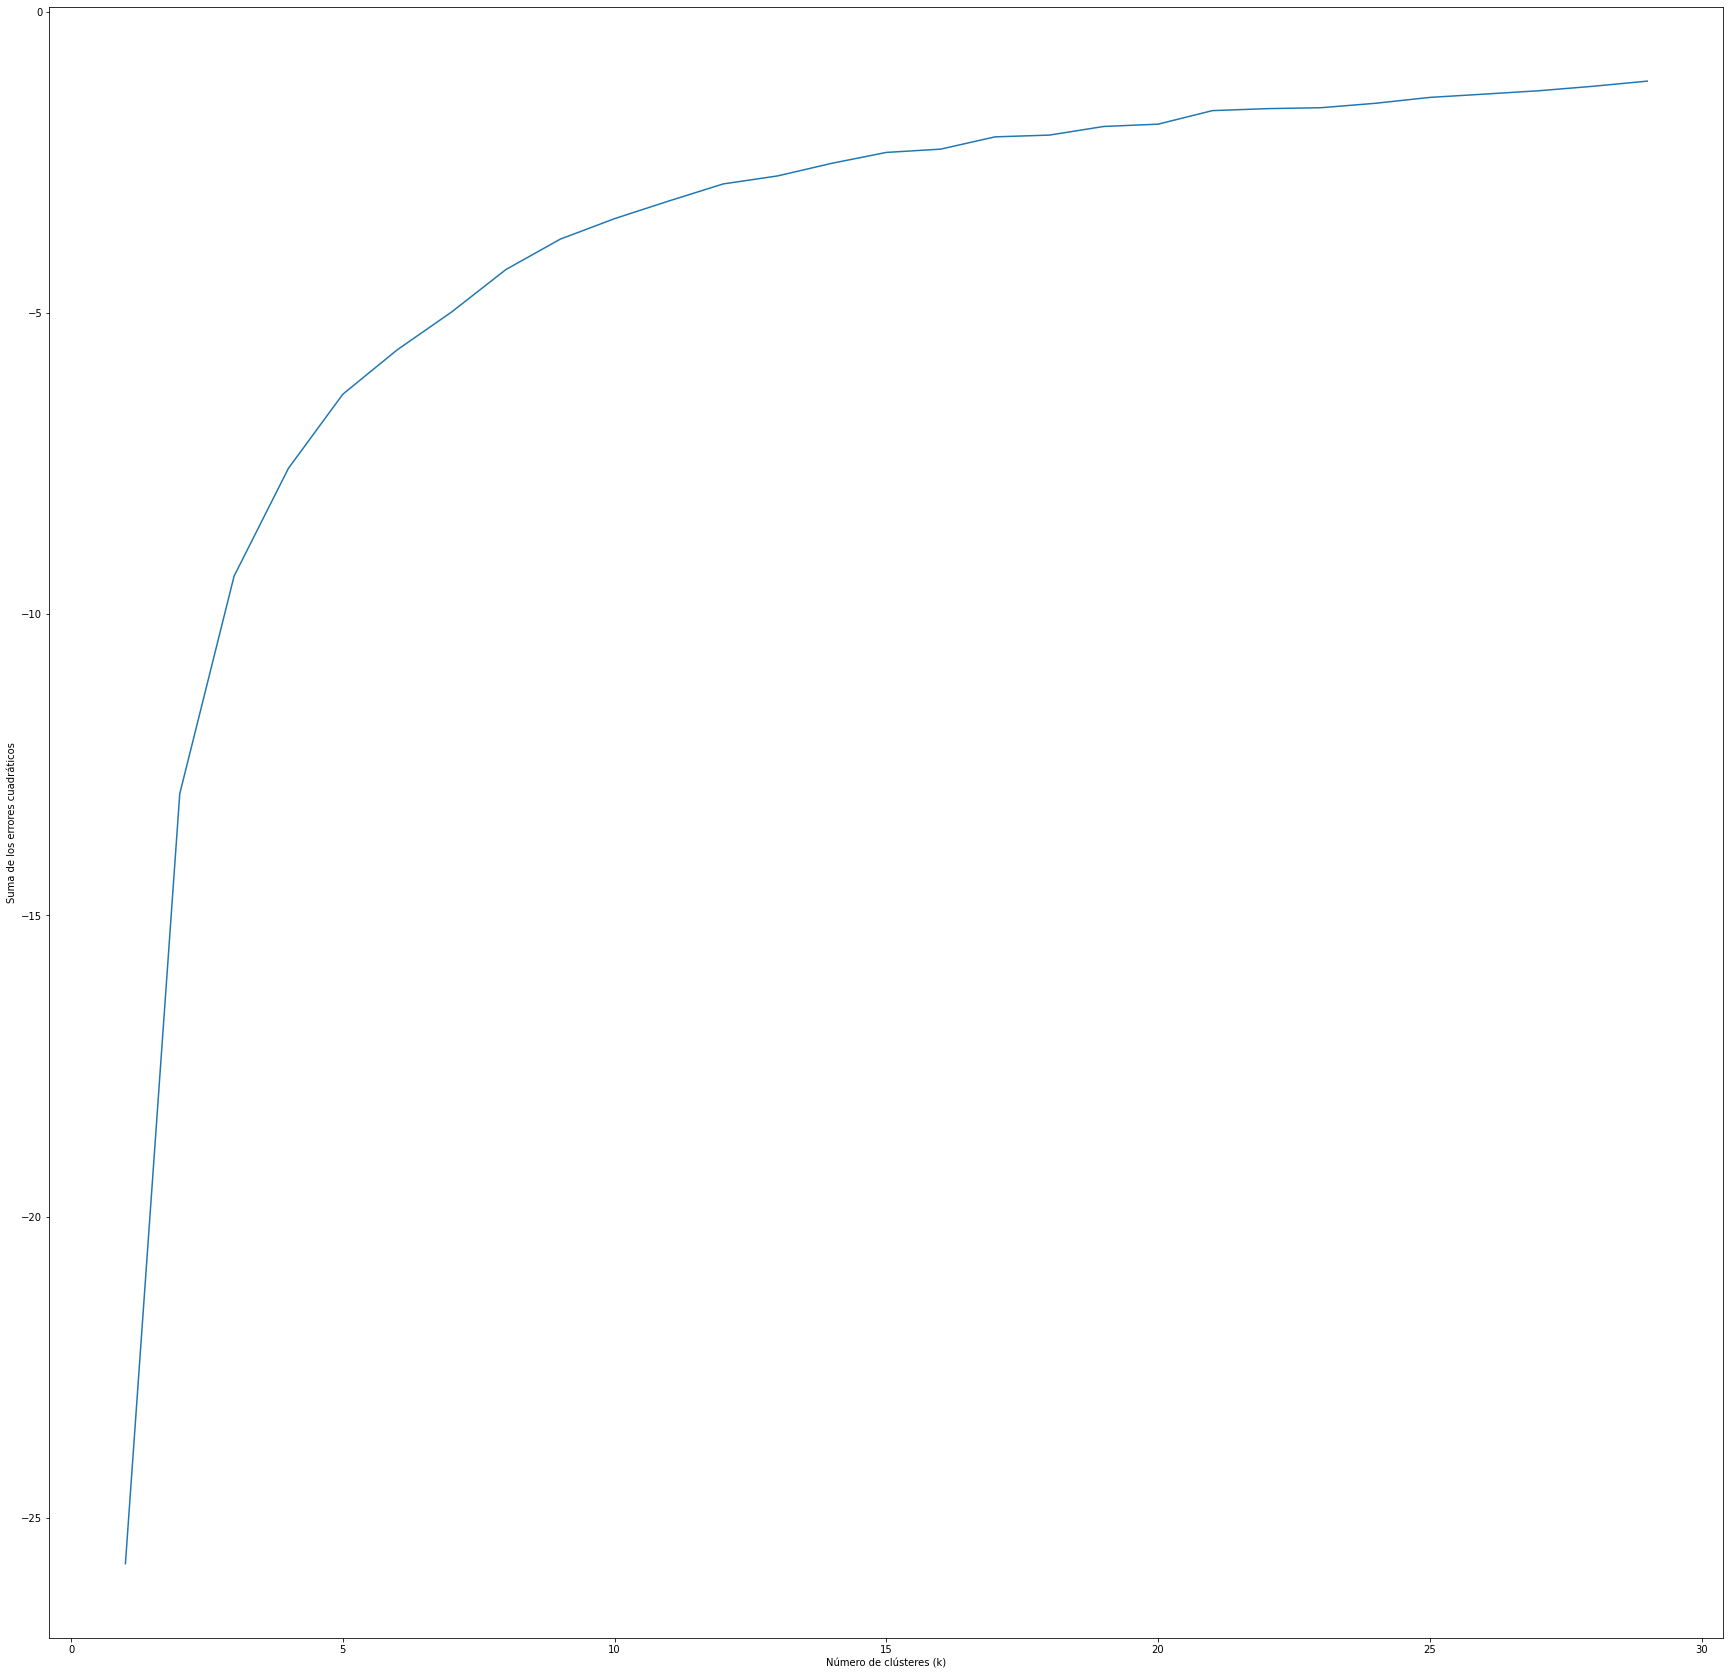

In [11]:
plot_all('results/Auto/genero-m1_es_adjetivootros-m2.xlsx', True)

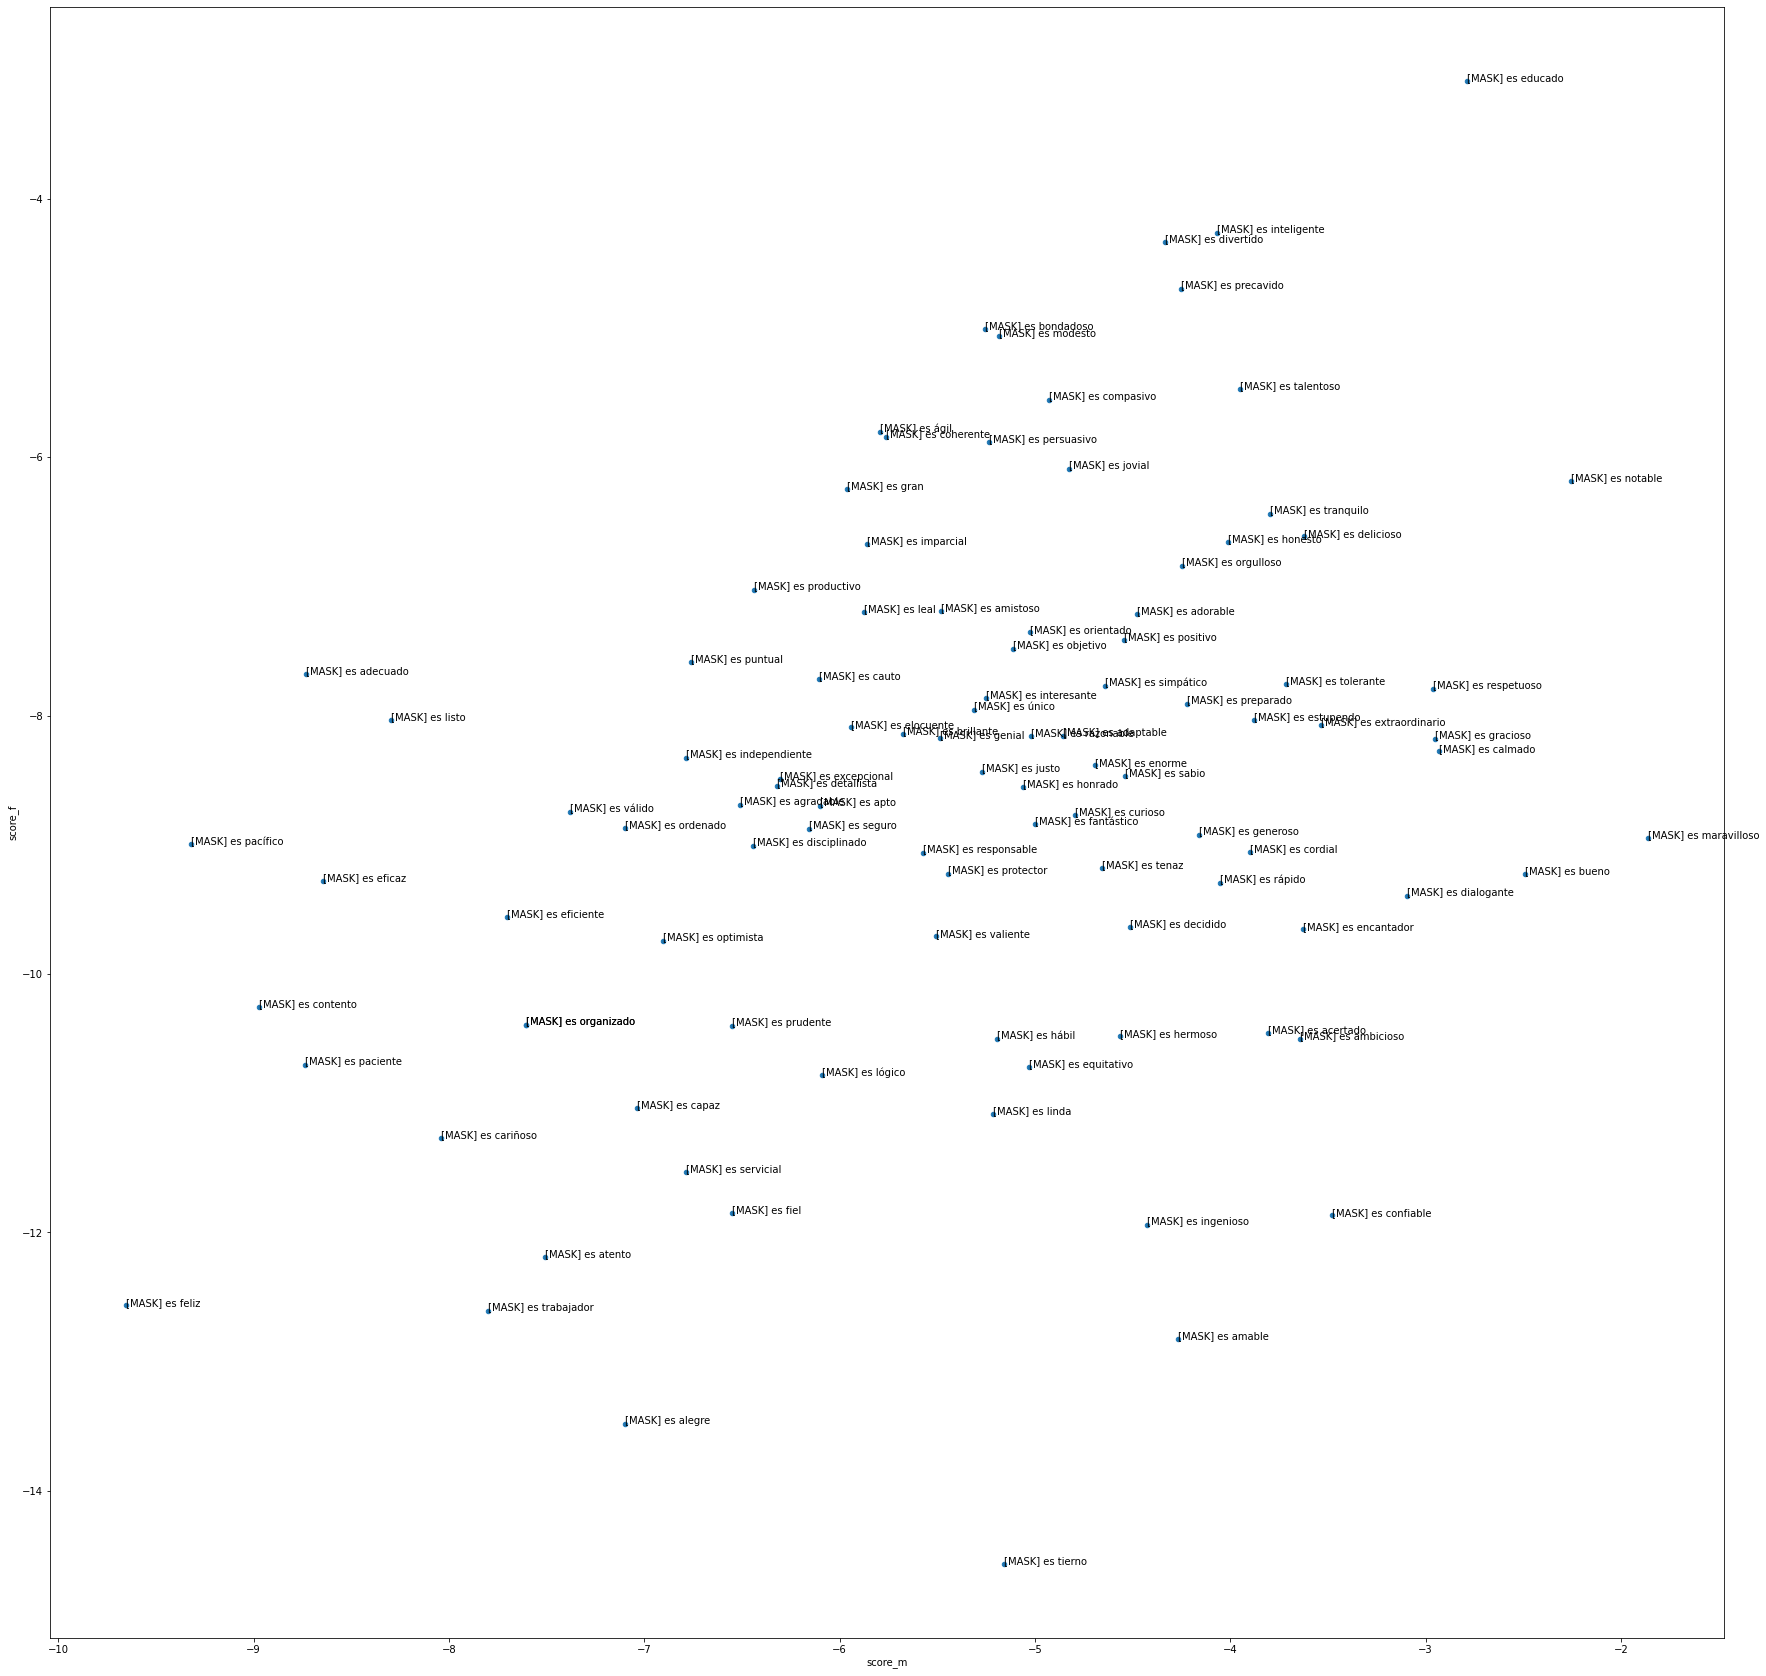

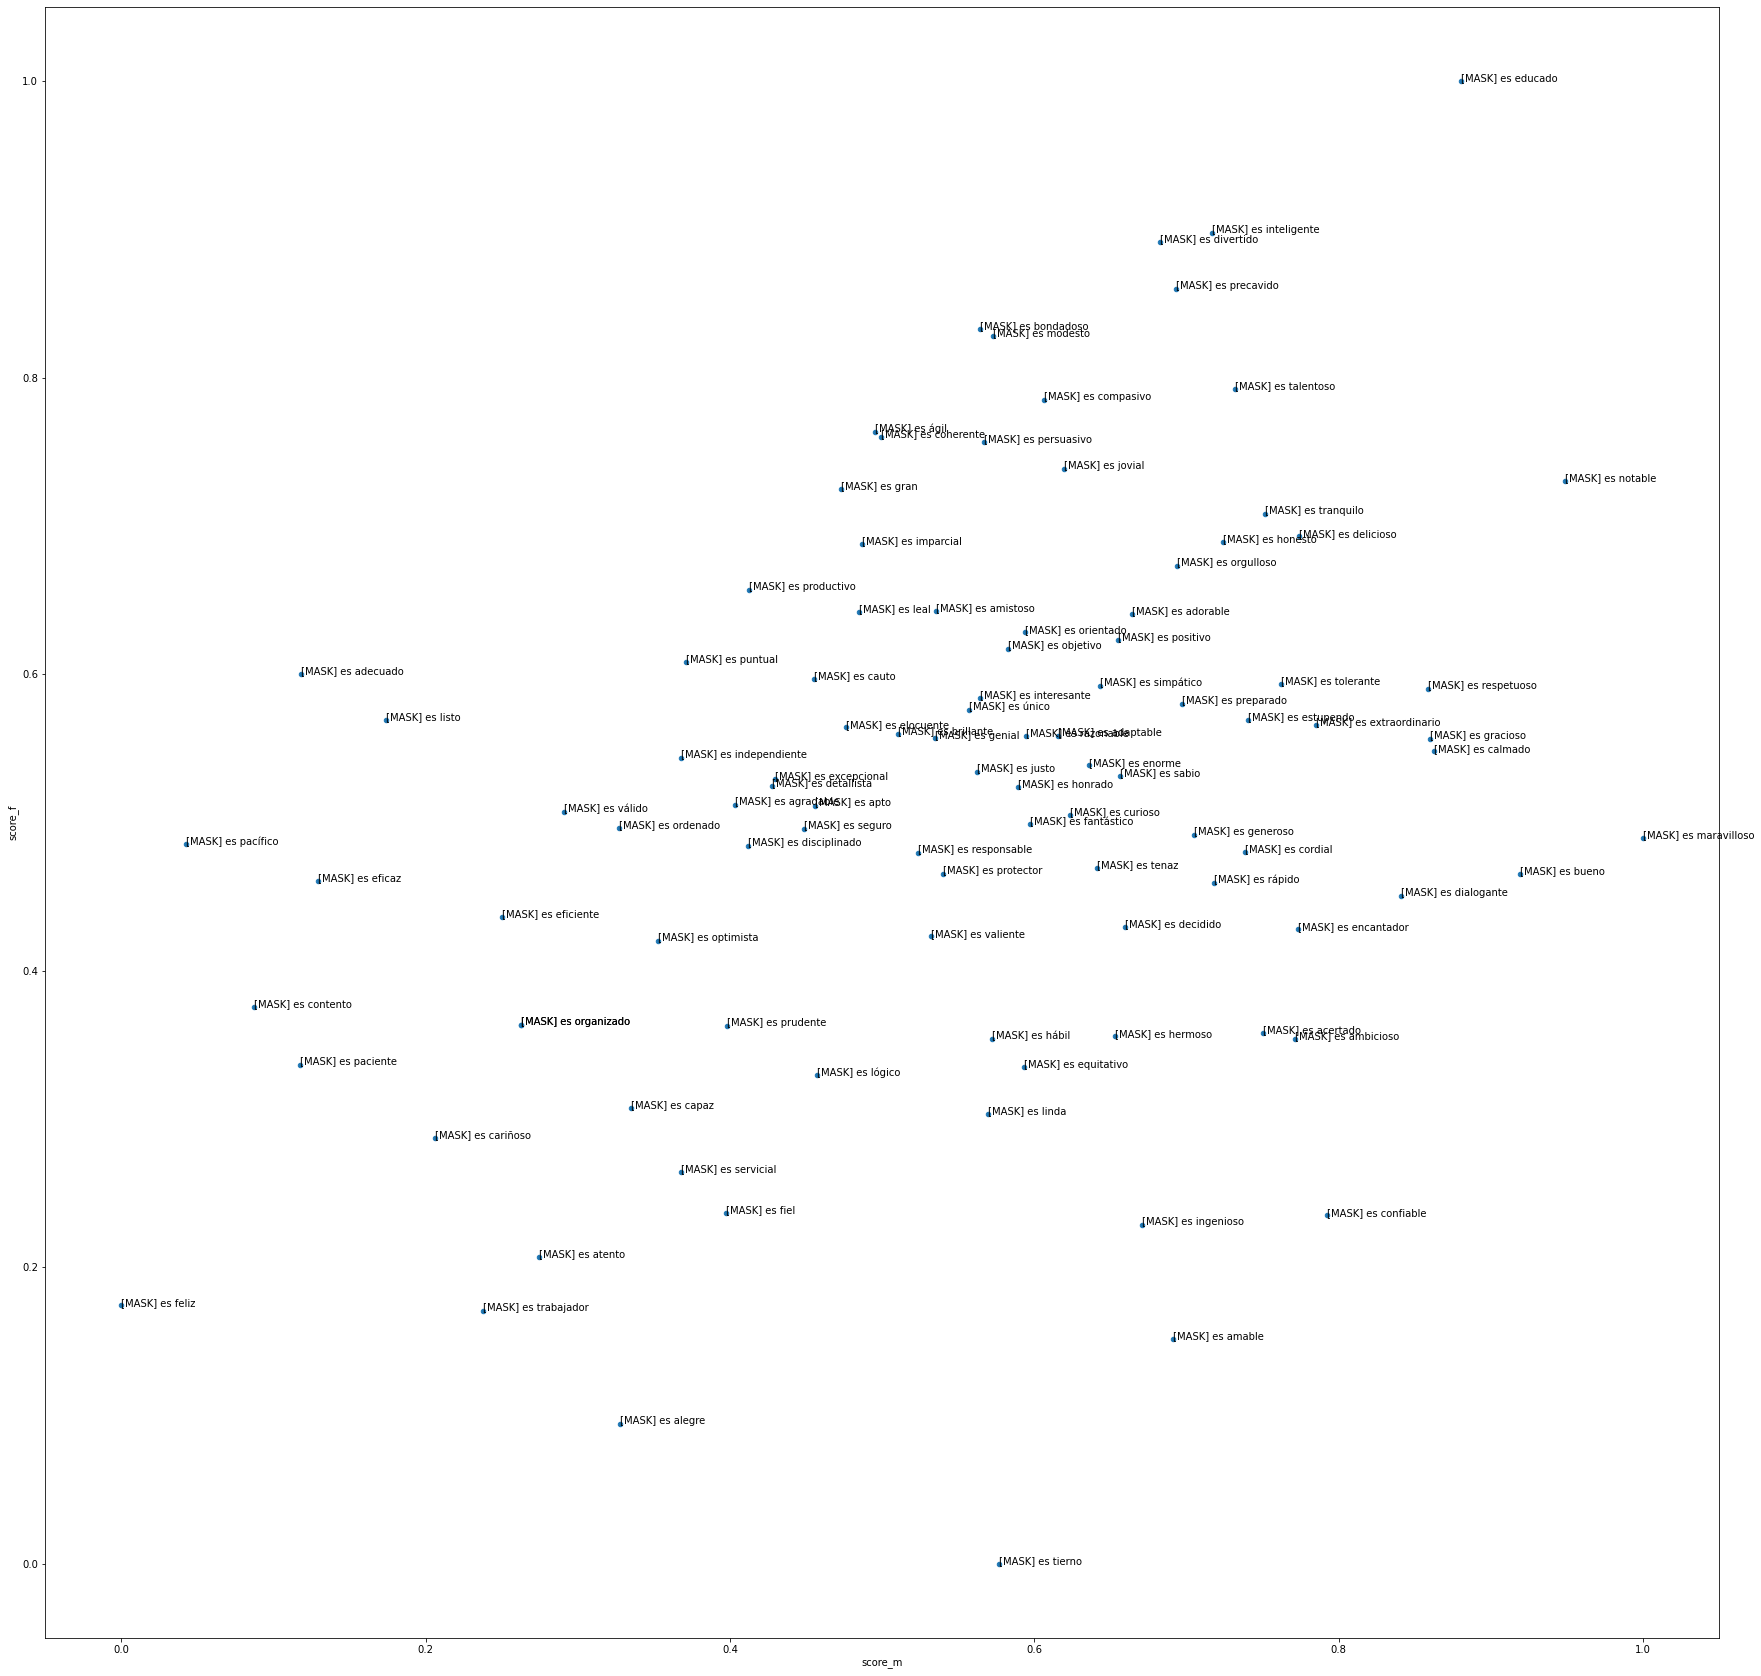

range(1, 30) [-25.764564267205202, -12.979381644577794, -9.368419622877006, -7.563662729647355, -6.334075383954013, -5.646373290761321, -4.889122596819035, -4.366569250528625, -3.8132404812642515, -3.4701240719667714, -3.1417415862912565, -2.9319719733633476, -2.7142581791125515, -2.5699328626830384, -2.3644885127244804, -2.2690185342619333, -2.110961592469654, -2.0452685335345127, -1.8728401708527502, -1.77887368745989, -1.6917609218095717, -1.625481379278199, -1.5255405969303382, -1.4815162293196467, -1.4328633138099933, -1.3158776777403738, -1.2945922165539046, -1.229431566986217, -1.1624820408544956]
[[0.24747475 0.24747475 0.56191059 0.50342037]
 [0.75252525 0.75252525 0.52921823 0.53263408]]
2 -11.91686027591195


,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0.000000,simple,0.000000,0.750403,0.357870,[MASK] es acertado,[MASK] es acertada,el,ella
1,0.010101,simple,0.010101,0.615805,0.558459,[MASK] es adaptable,[MASK] es adaptable,el,ella
2,0.020202,simple,0.020202,0.118126,0.600313,[MASK] es adecuado,[MASK] es adecuada,el,ella
3,0.030303,simple,0.030303,0.495077,0.763245,[MASK] es ágil,[MASK] es ágil,el,ella
4,0.040404,simple,0.040404,0.403109,0.511669,[MASK] es agradable,[MASK] es agradable,el,ella
...,...,...,...,...,...,...,...,...,...
95,0.959596,simple,0.959596,0.566861,0.756307,[MASK] es persuasivo,[MASK] es persuasiva,el,ella
96,0.969697,simple,0.969697,0.573177,0.828191,[MASK] es modesto,[MASK] es modesta,el,ella
97,0.979798,simple,0.979798,0.576787,0.000000,[MASK] es tierno,[MASK] es tierna,el,ella
98,0.989899,simple,0.989899,0.859826,0.556120,[MASK] es gracioso,[MASK] es graciosa,el,ella


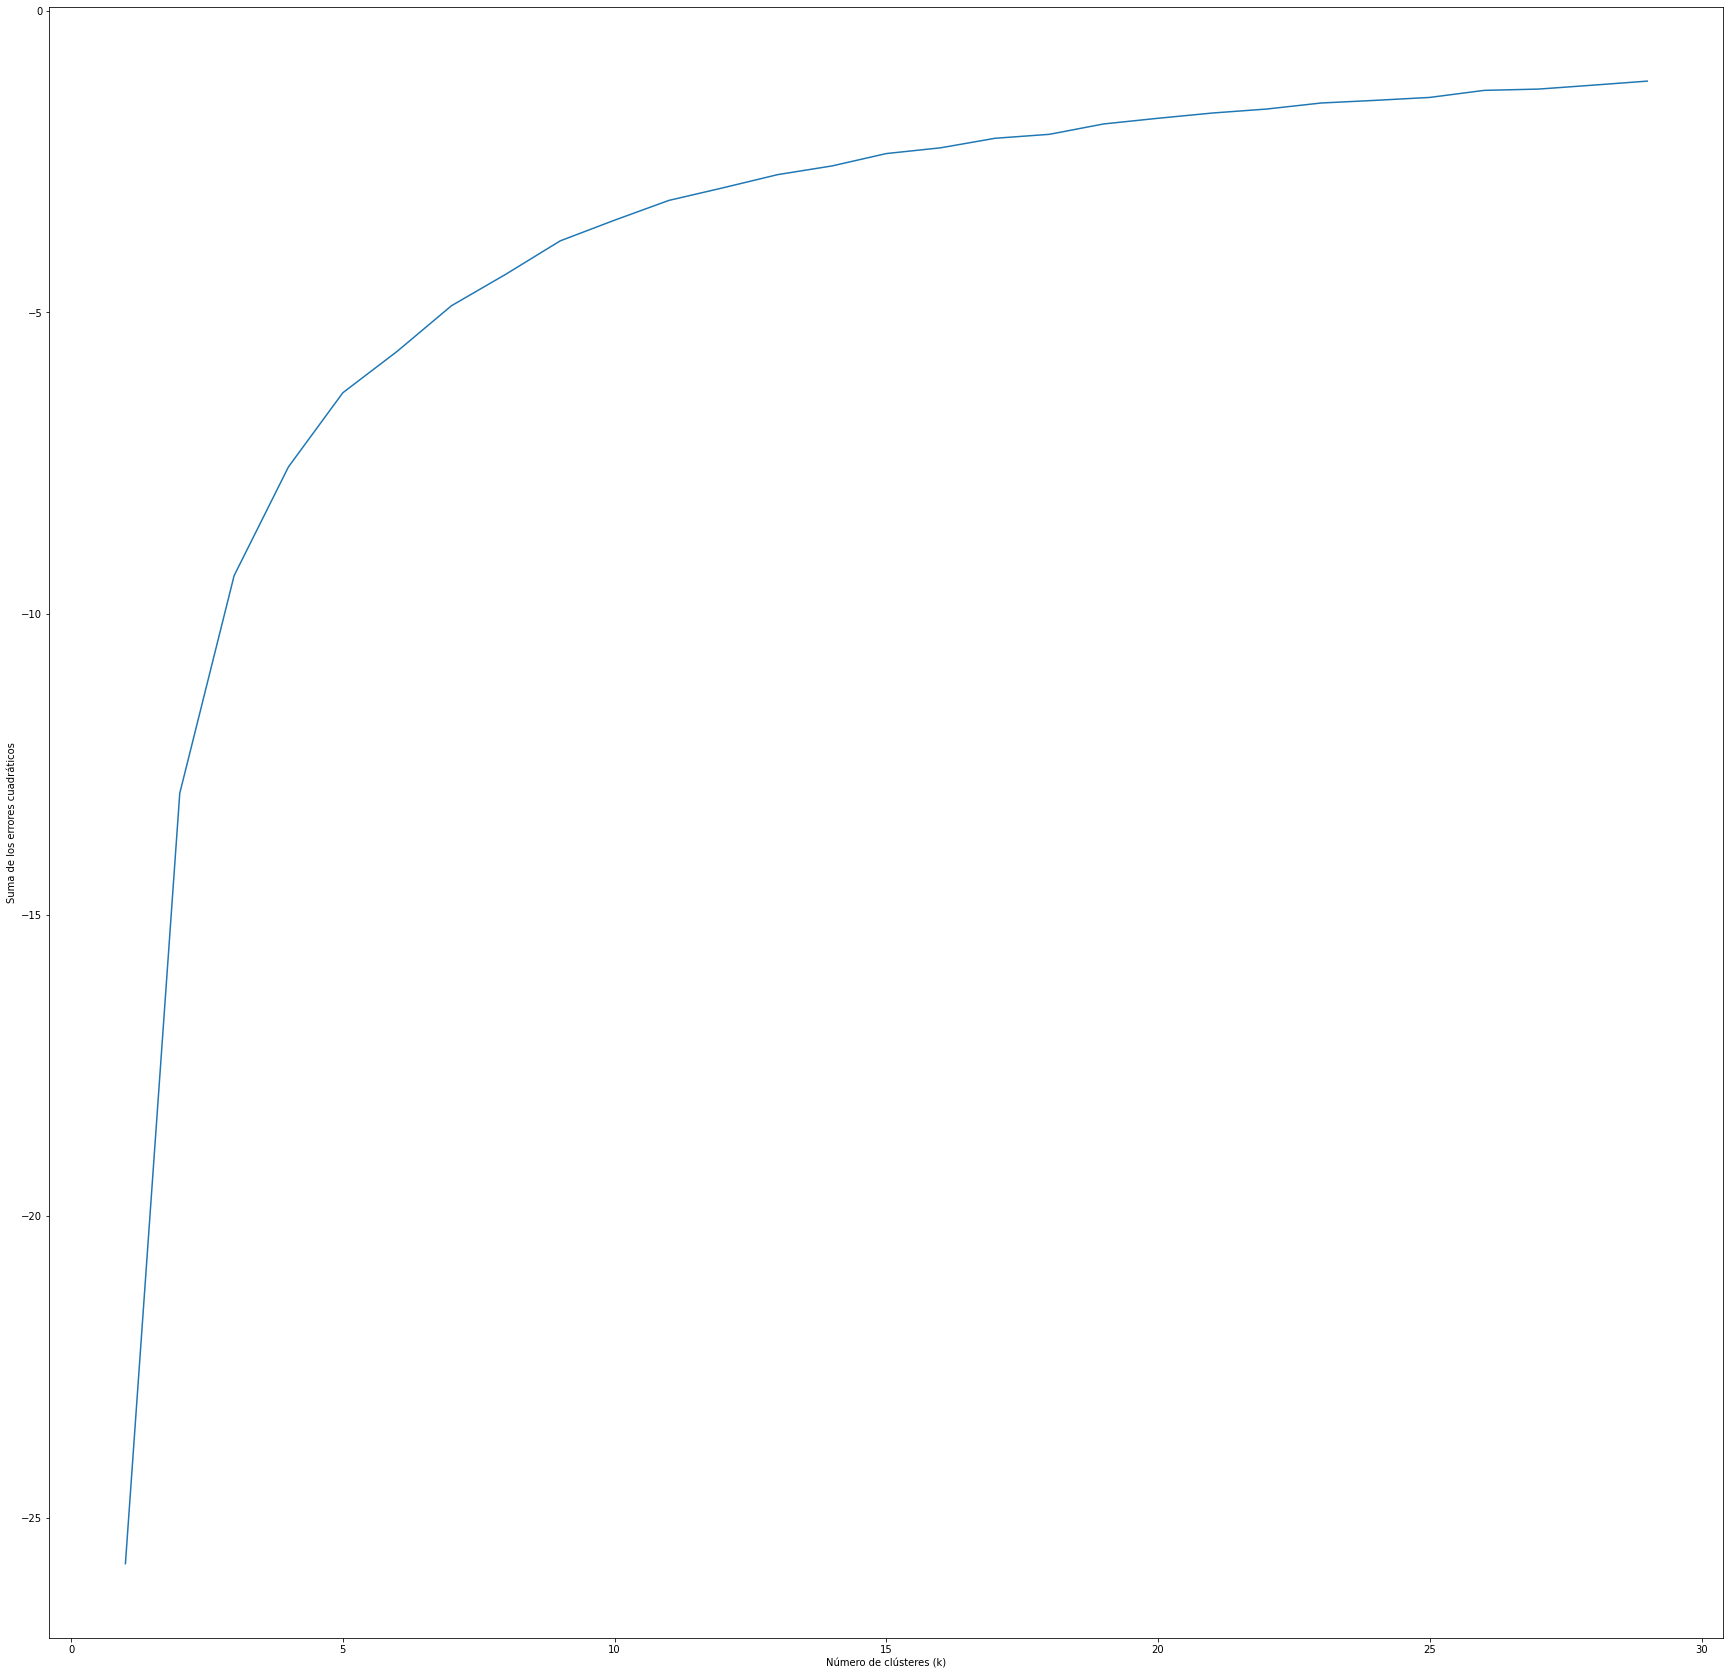

In [12]:
plot_all('results/Auto/genero-m1_es_adjetivopositivo-m2.xlsx', True)


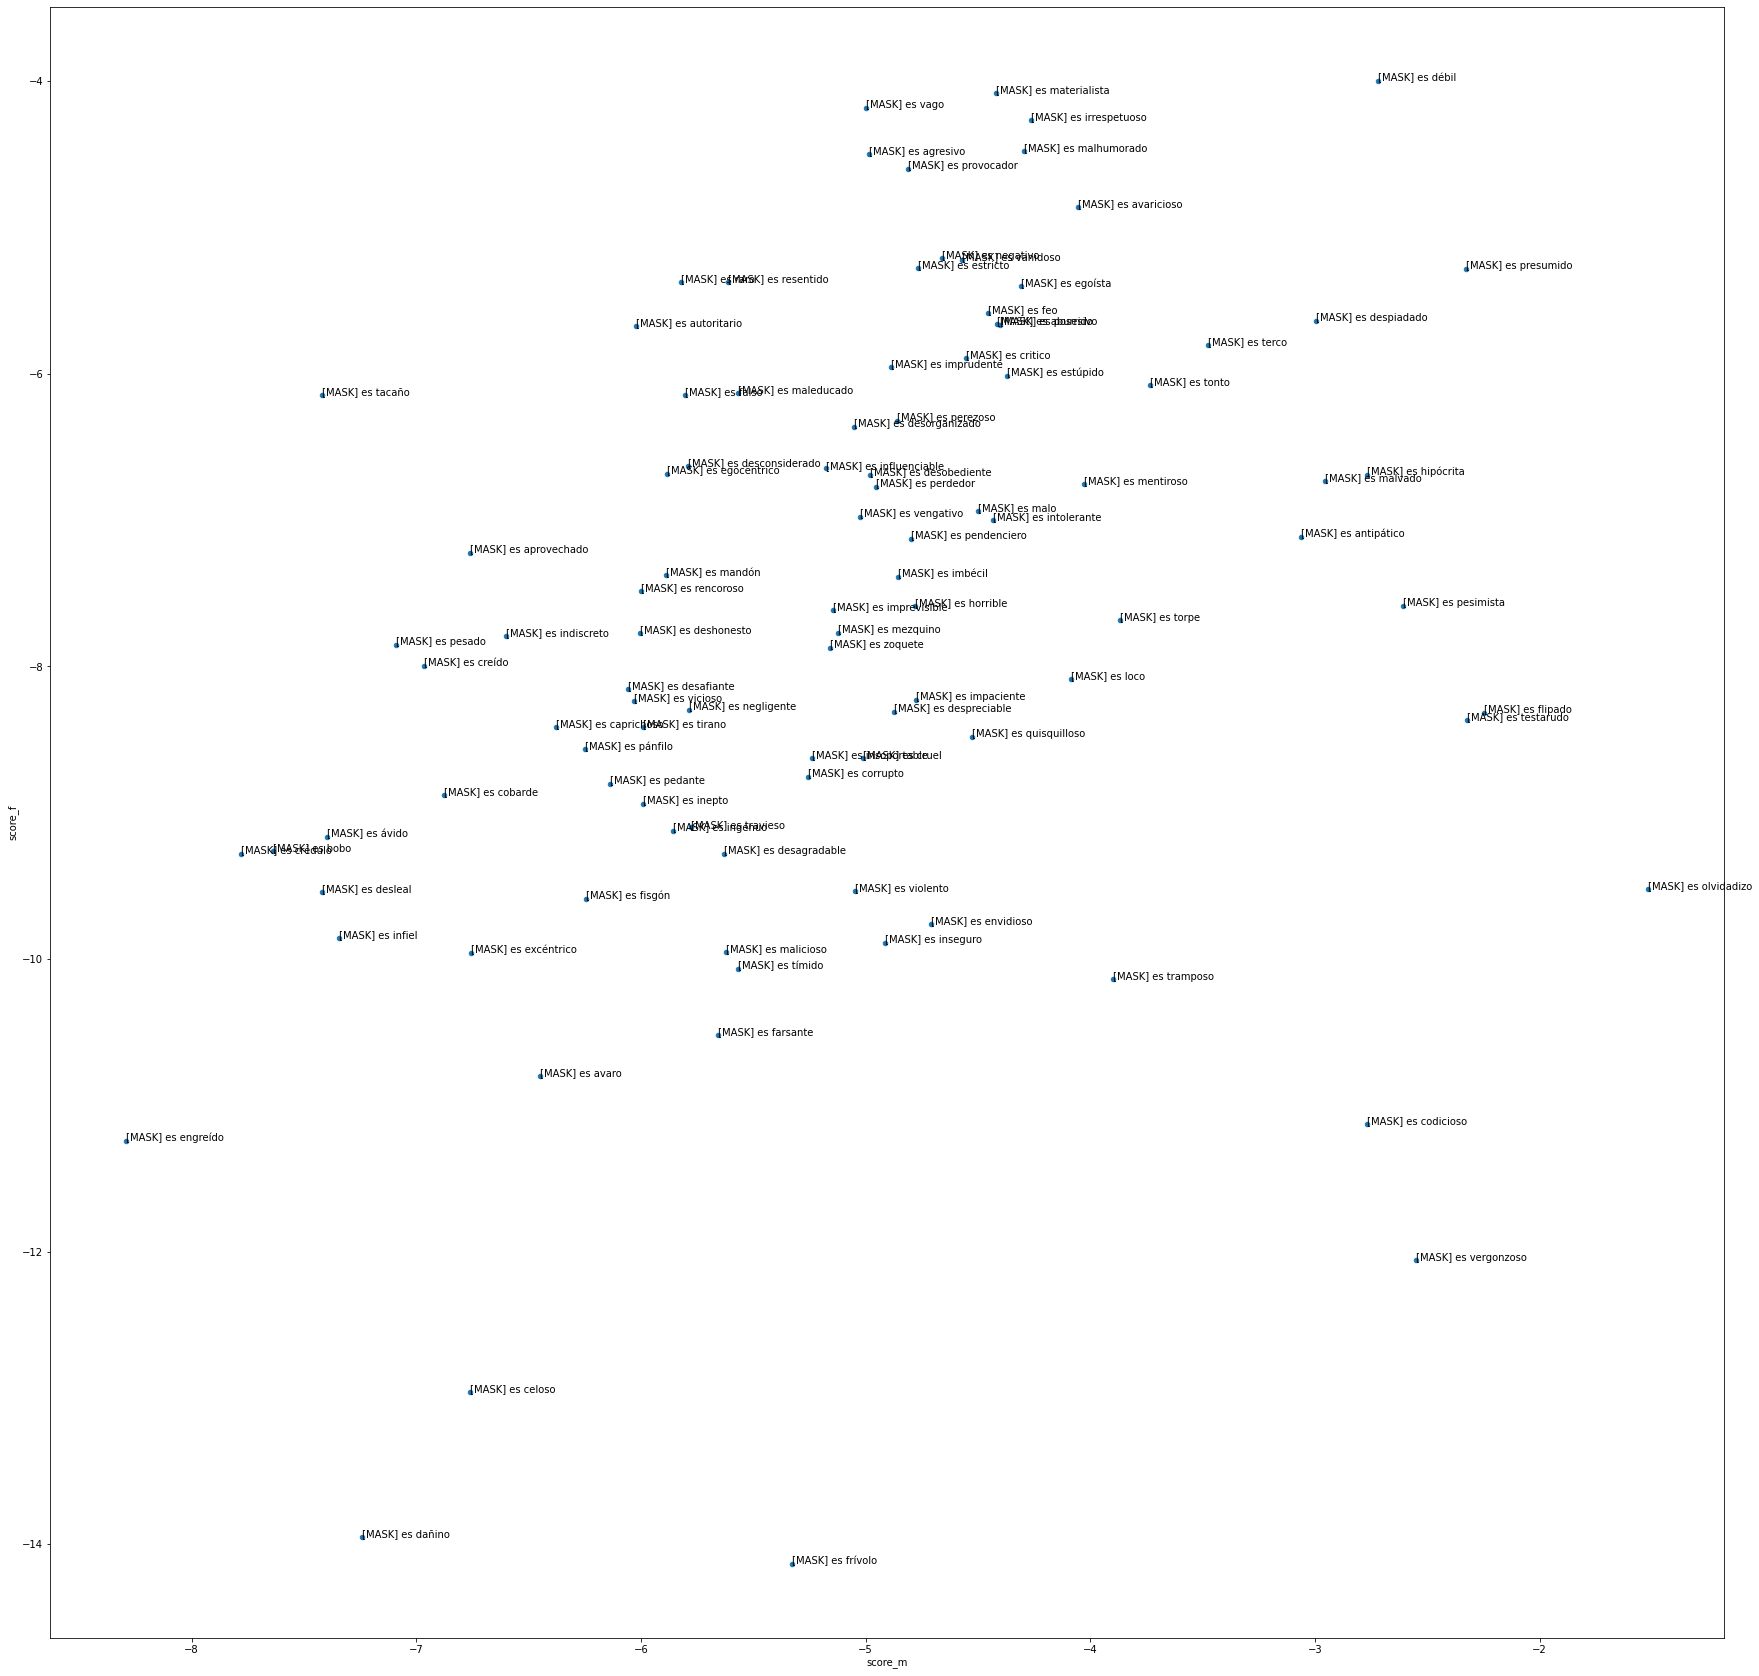

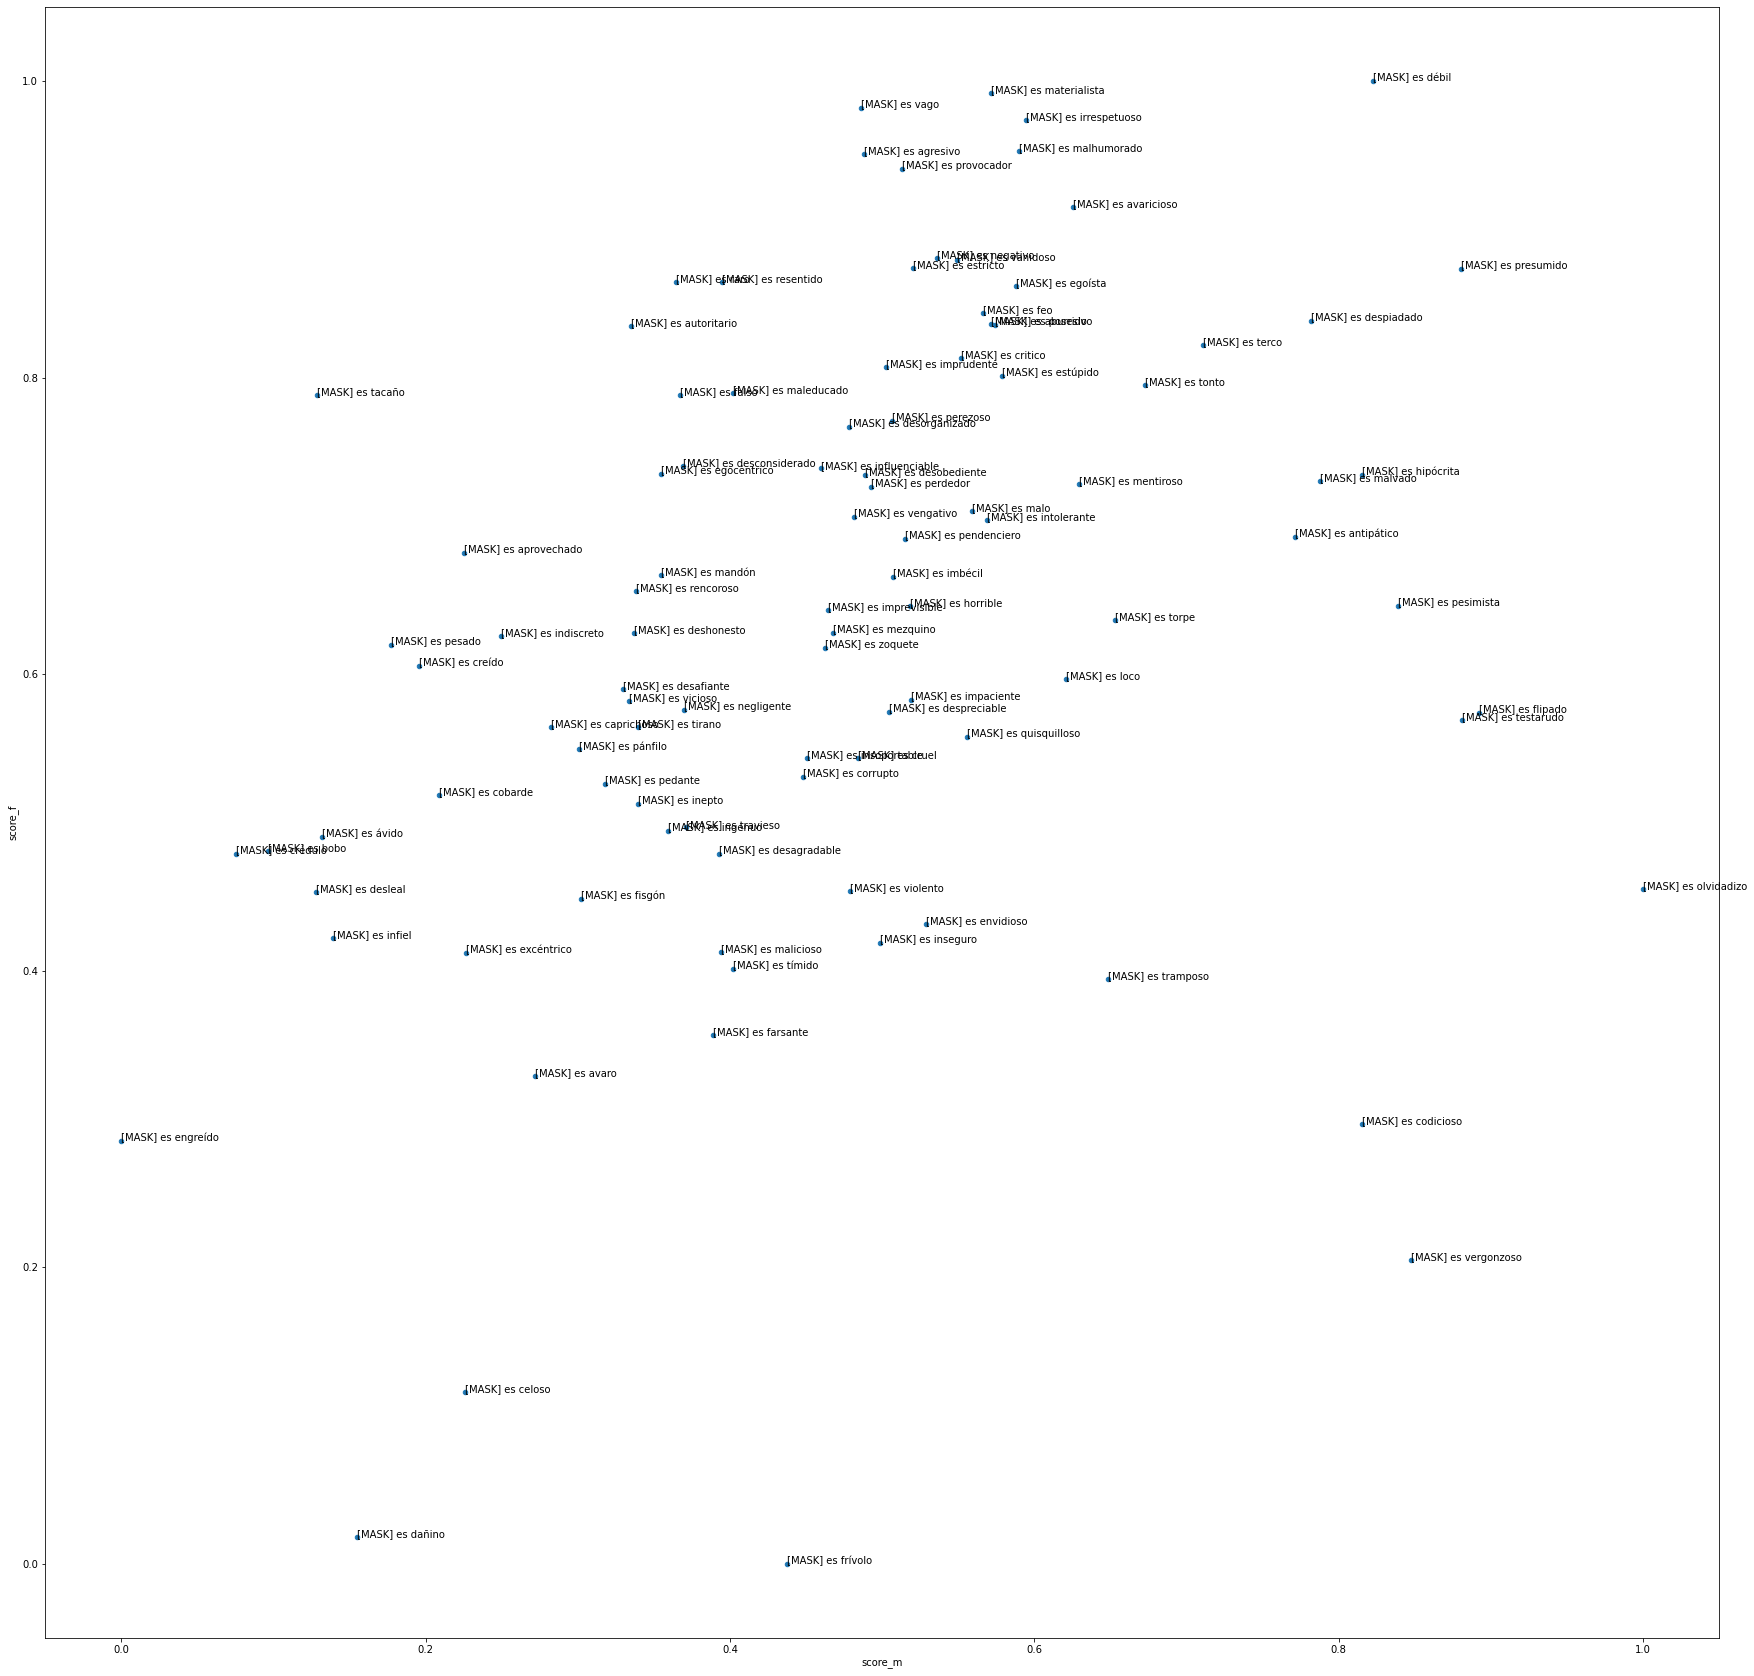

range(1, 30) [-25.764564267205202, -12.975164109676376, -9.365374061304731, -7.563091580635266, -6.312062241518286, -5.6137491151486945, -4.9881338902939545, -4.323816441270227, -3.7770206114388603, -3.4372694033569333, -3.1387185460351565, -2.937640499855977, -2.713974201276968, -2.5024720320159917, -2.3608688431804667, -2.2685299169681823, -2.1950815289611345, -2.0517125088667023, -1.937766339318, -1.8405061817635535, -1.7178624743952433, -1.640450740165761, -1.5827827771521956, -1.5188682471761201, -1.372323350779364, -1.3611628555898694, -1.304030407766776, -1.2260333478453023, -1.1840793767612865]
[[0.75736961 0.75736961 0.52989673 0.67521517]
 [0.25272331 0.25272331 0.40916633 0.59744203]]
2 -12.01918062106022


,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0.000000,simple,0.000000,0.571847,0.836104,[MASK] es aburrido,[MASK] es aburrida,el,ella
1,0.010101,simple,0.010101,0.488047,0.950574,[MASK] es agresivo,[MASK] es agresiva,el,ella
2,0.020202,simple,0.020202,0.771612,0.692783,[MASK] es antipático,[MASK] es antipática,el,ella
3,0.030303,simple,0.030303,0.225520,0.681820,[MASK] es aprovechado,[MASK] es aprovechada,el,ella
4,0.040404,simple,0.040404,0.335045,0.834652,[MASK] es autoritario,[MASK] es autoritaria,el,ella
...,...,...,...,...,...,...,...,...,...
95,0.959596,simple,0.959596,0.847653,0.204551,[MASK] es vergonzoso,[MASK] es vergozosa,el,ella
96,0.969697,simple,0.969697,0.333816,0.581990,[MASK] es vicioso,[MASK] es viciosa,el,ella
97,0.979798,simple,0.979798,0.479068,0.453733,[MASK] es violento,[MASK] es violenta,el,ella
98,0.989899,simple,0.989899,0.462293,0.617883,[MASK] es zoquete,[MASK] es zoquete,el,ella


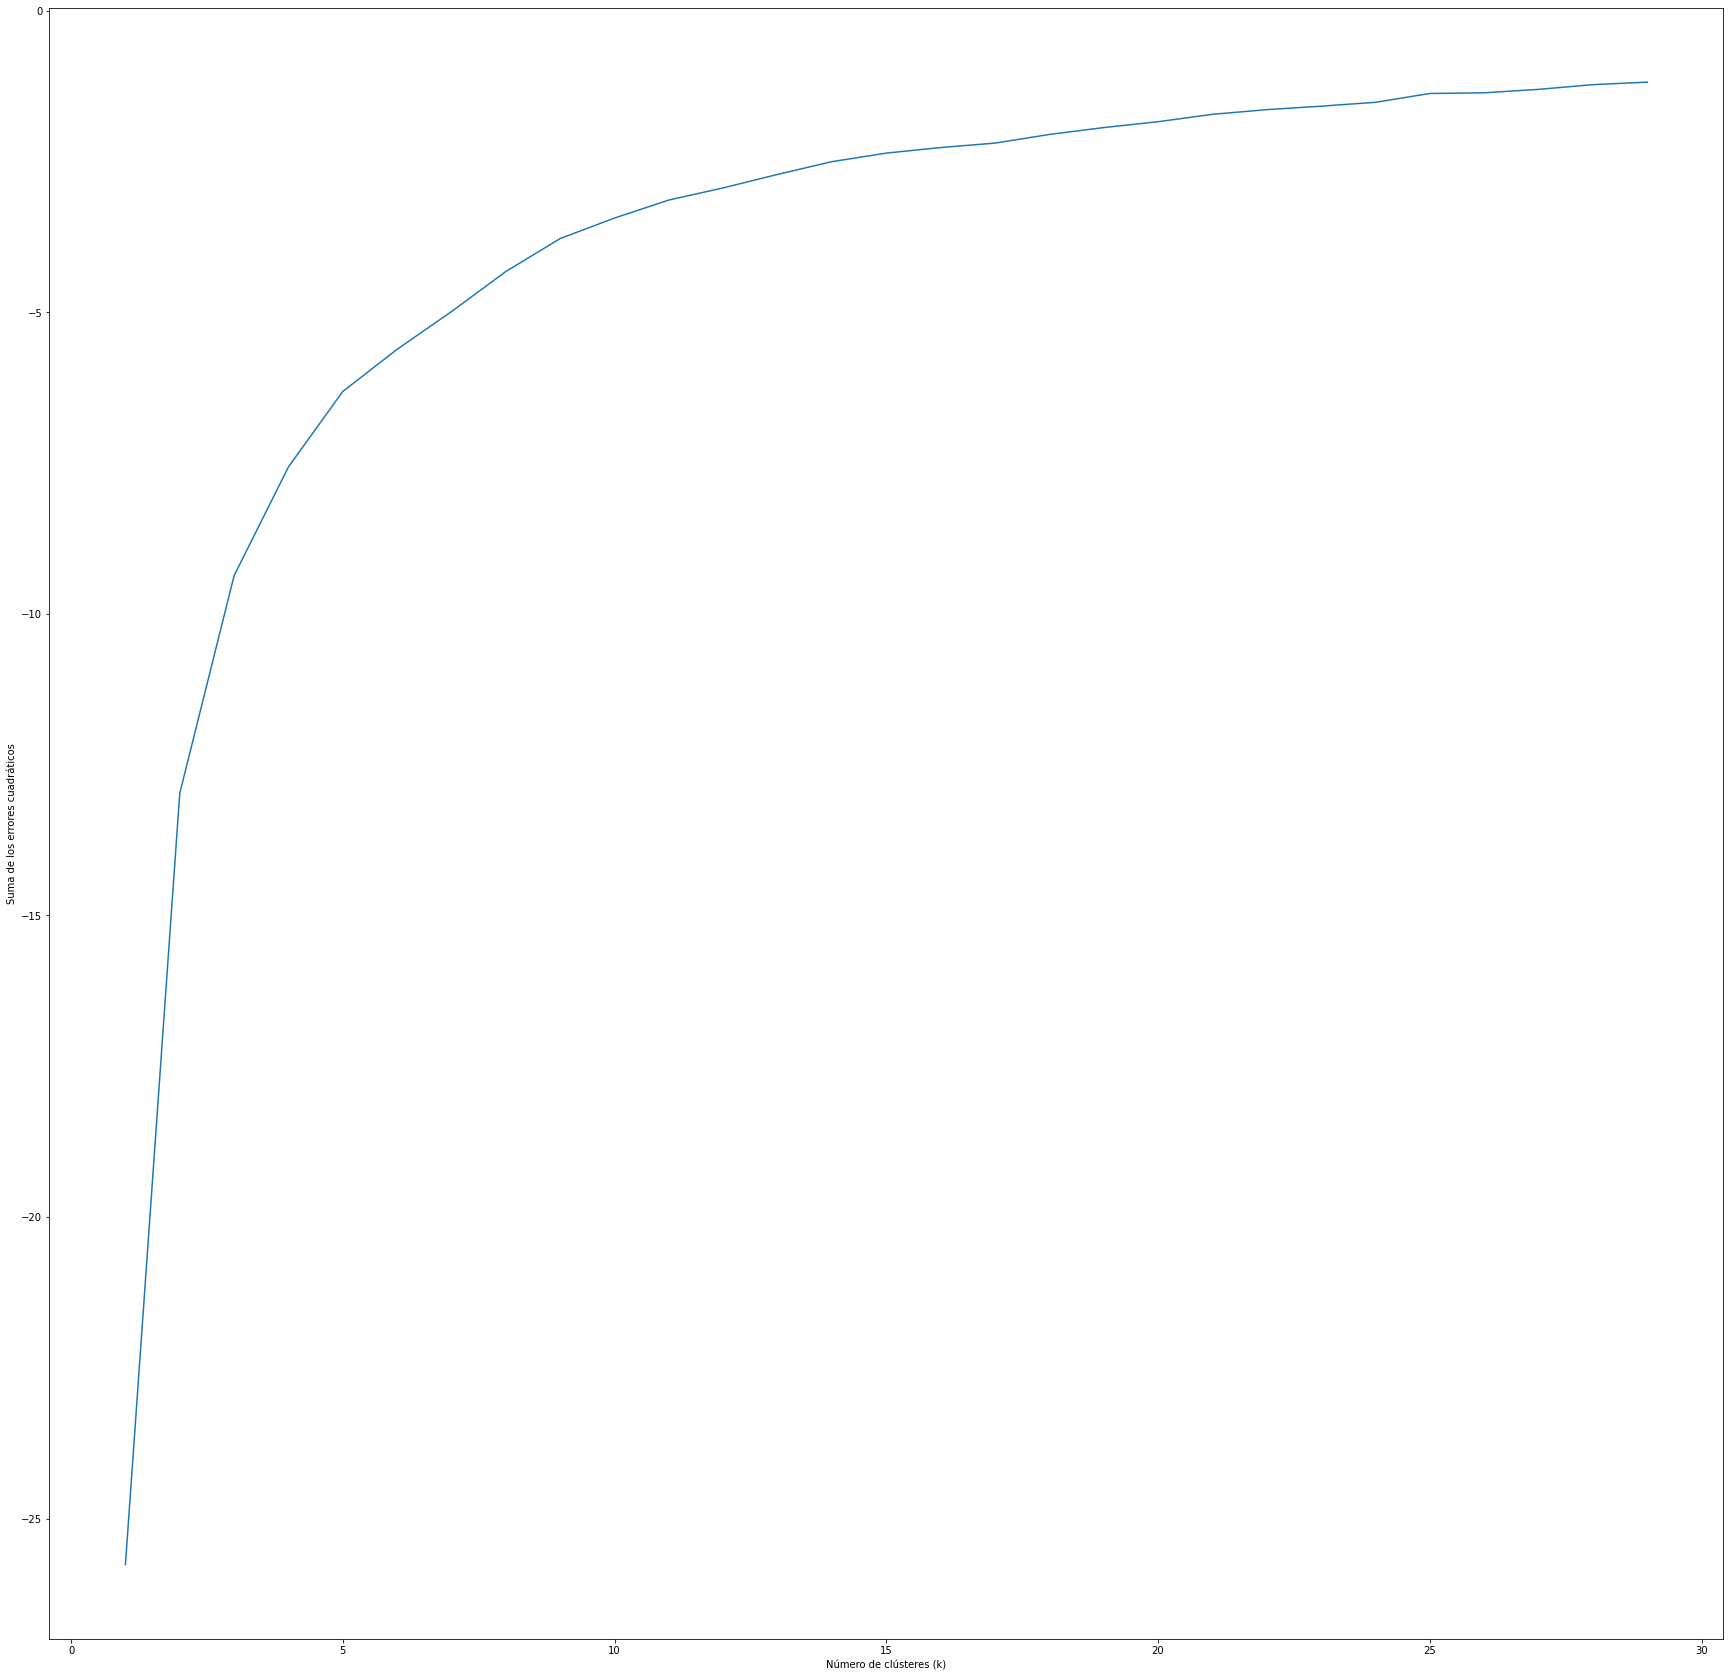

In [13]:
plot_all('results/Auto/genero-m1_es_adjetivonegativo-m2.xlsx', True)


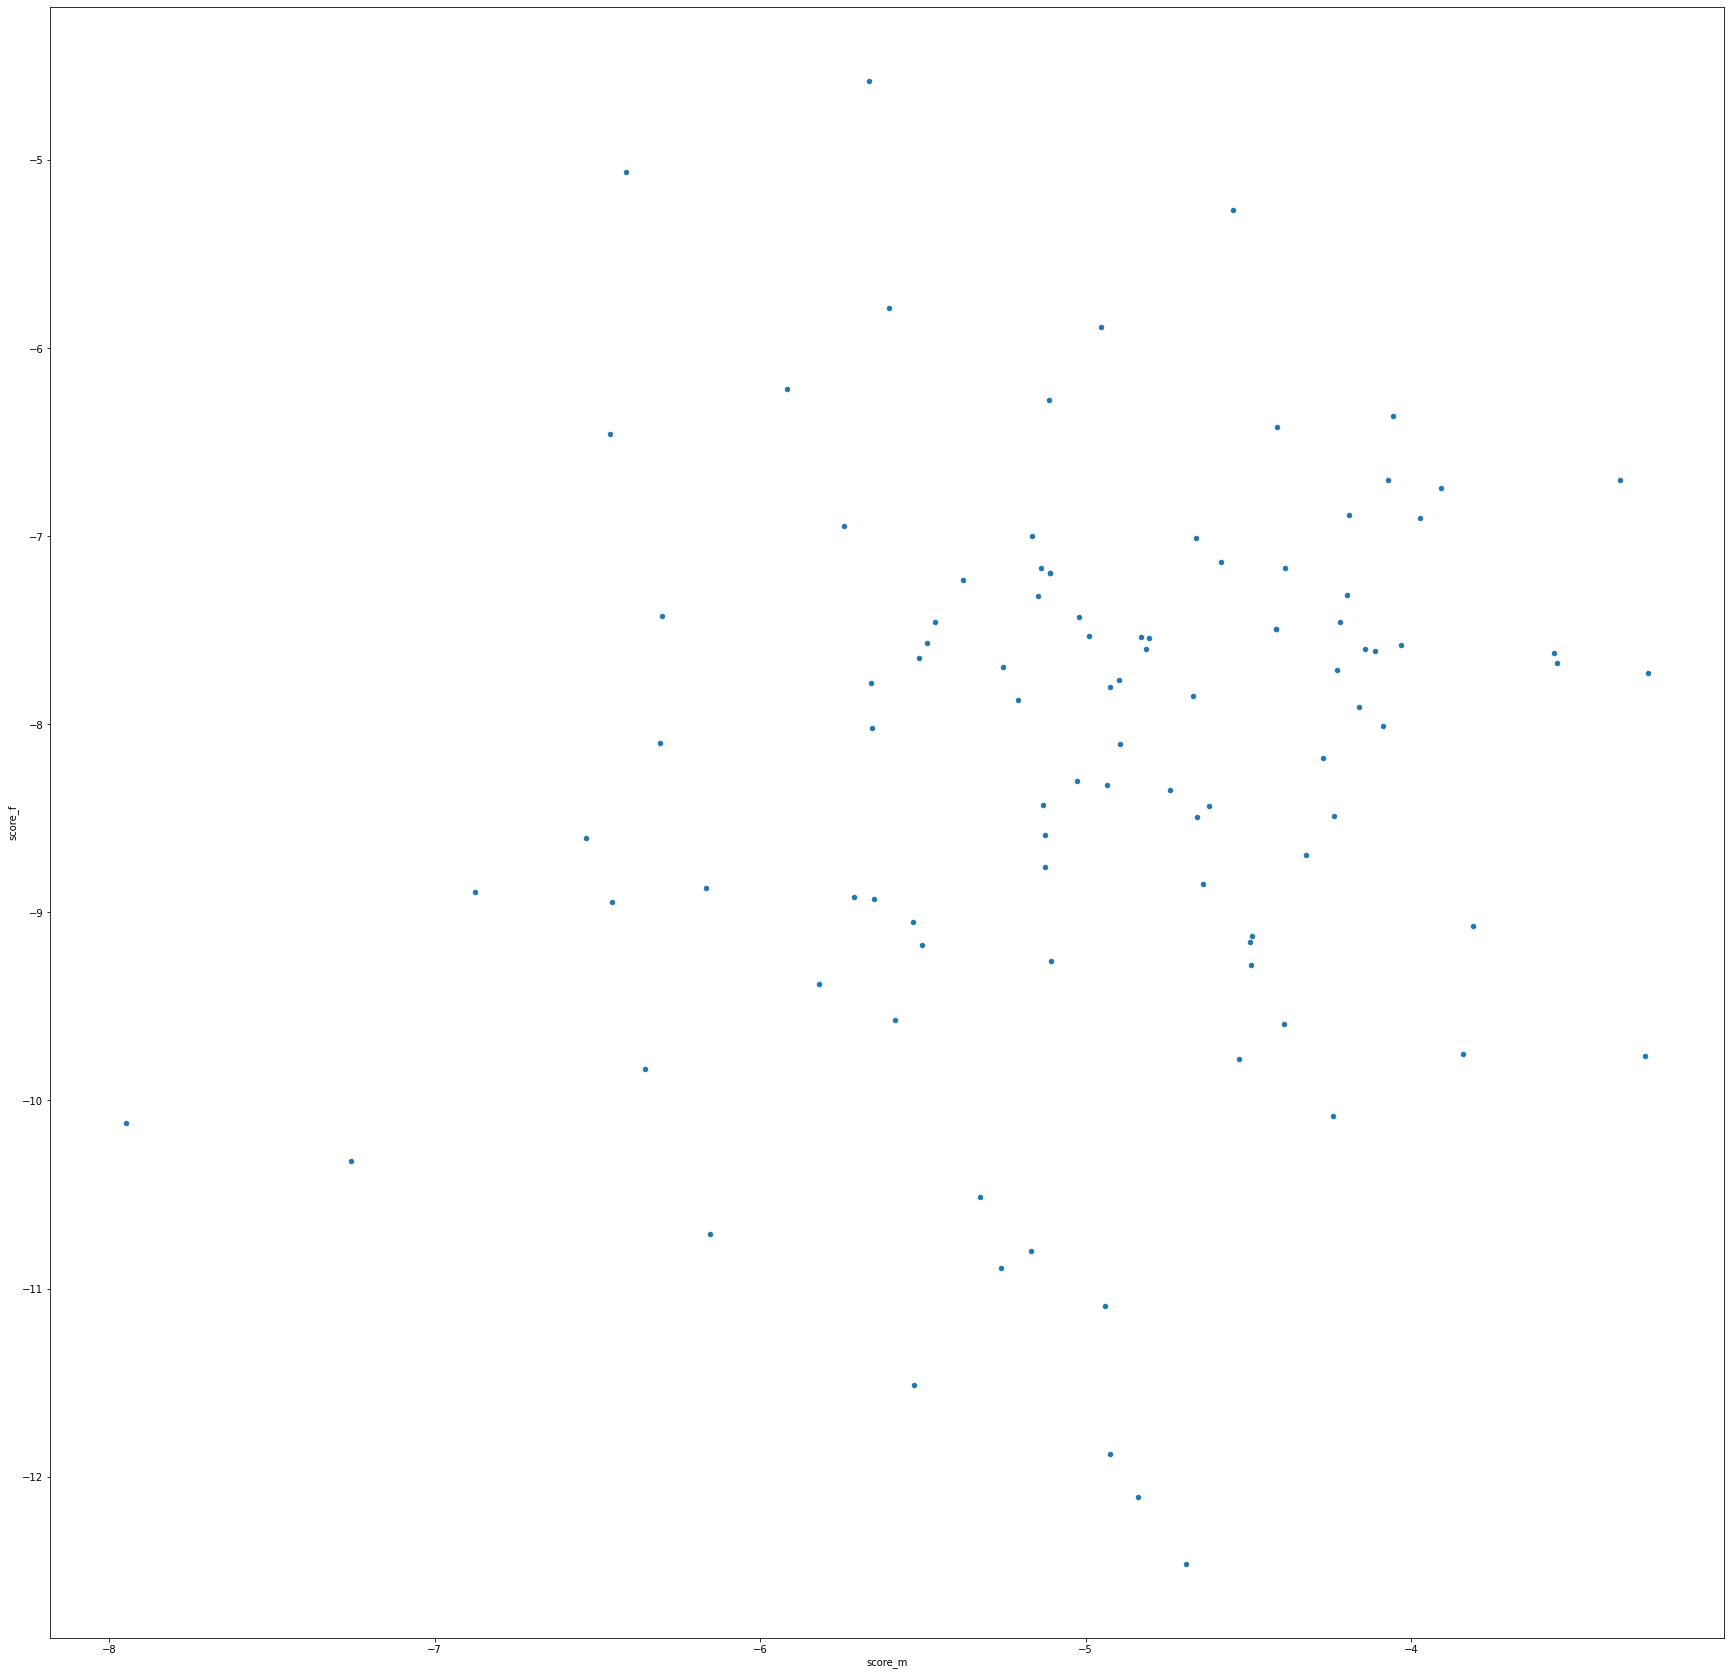

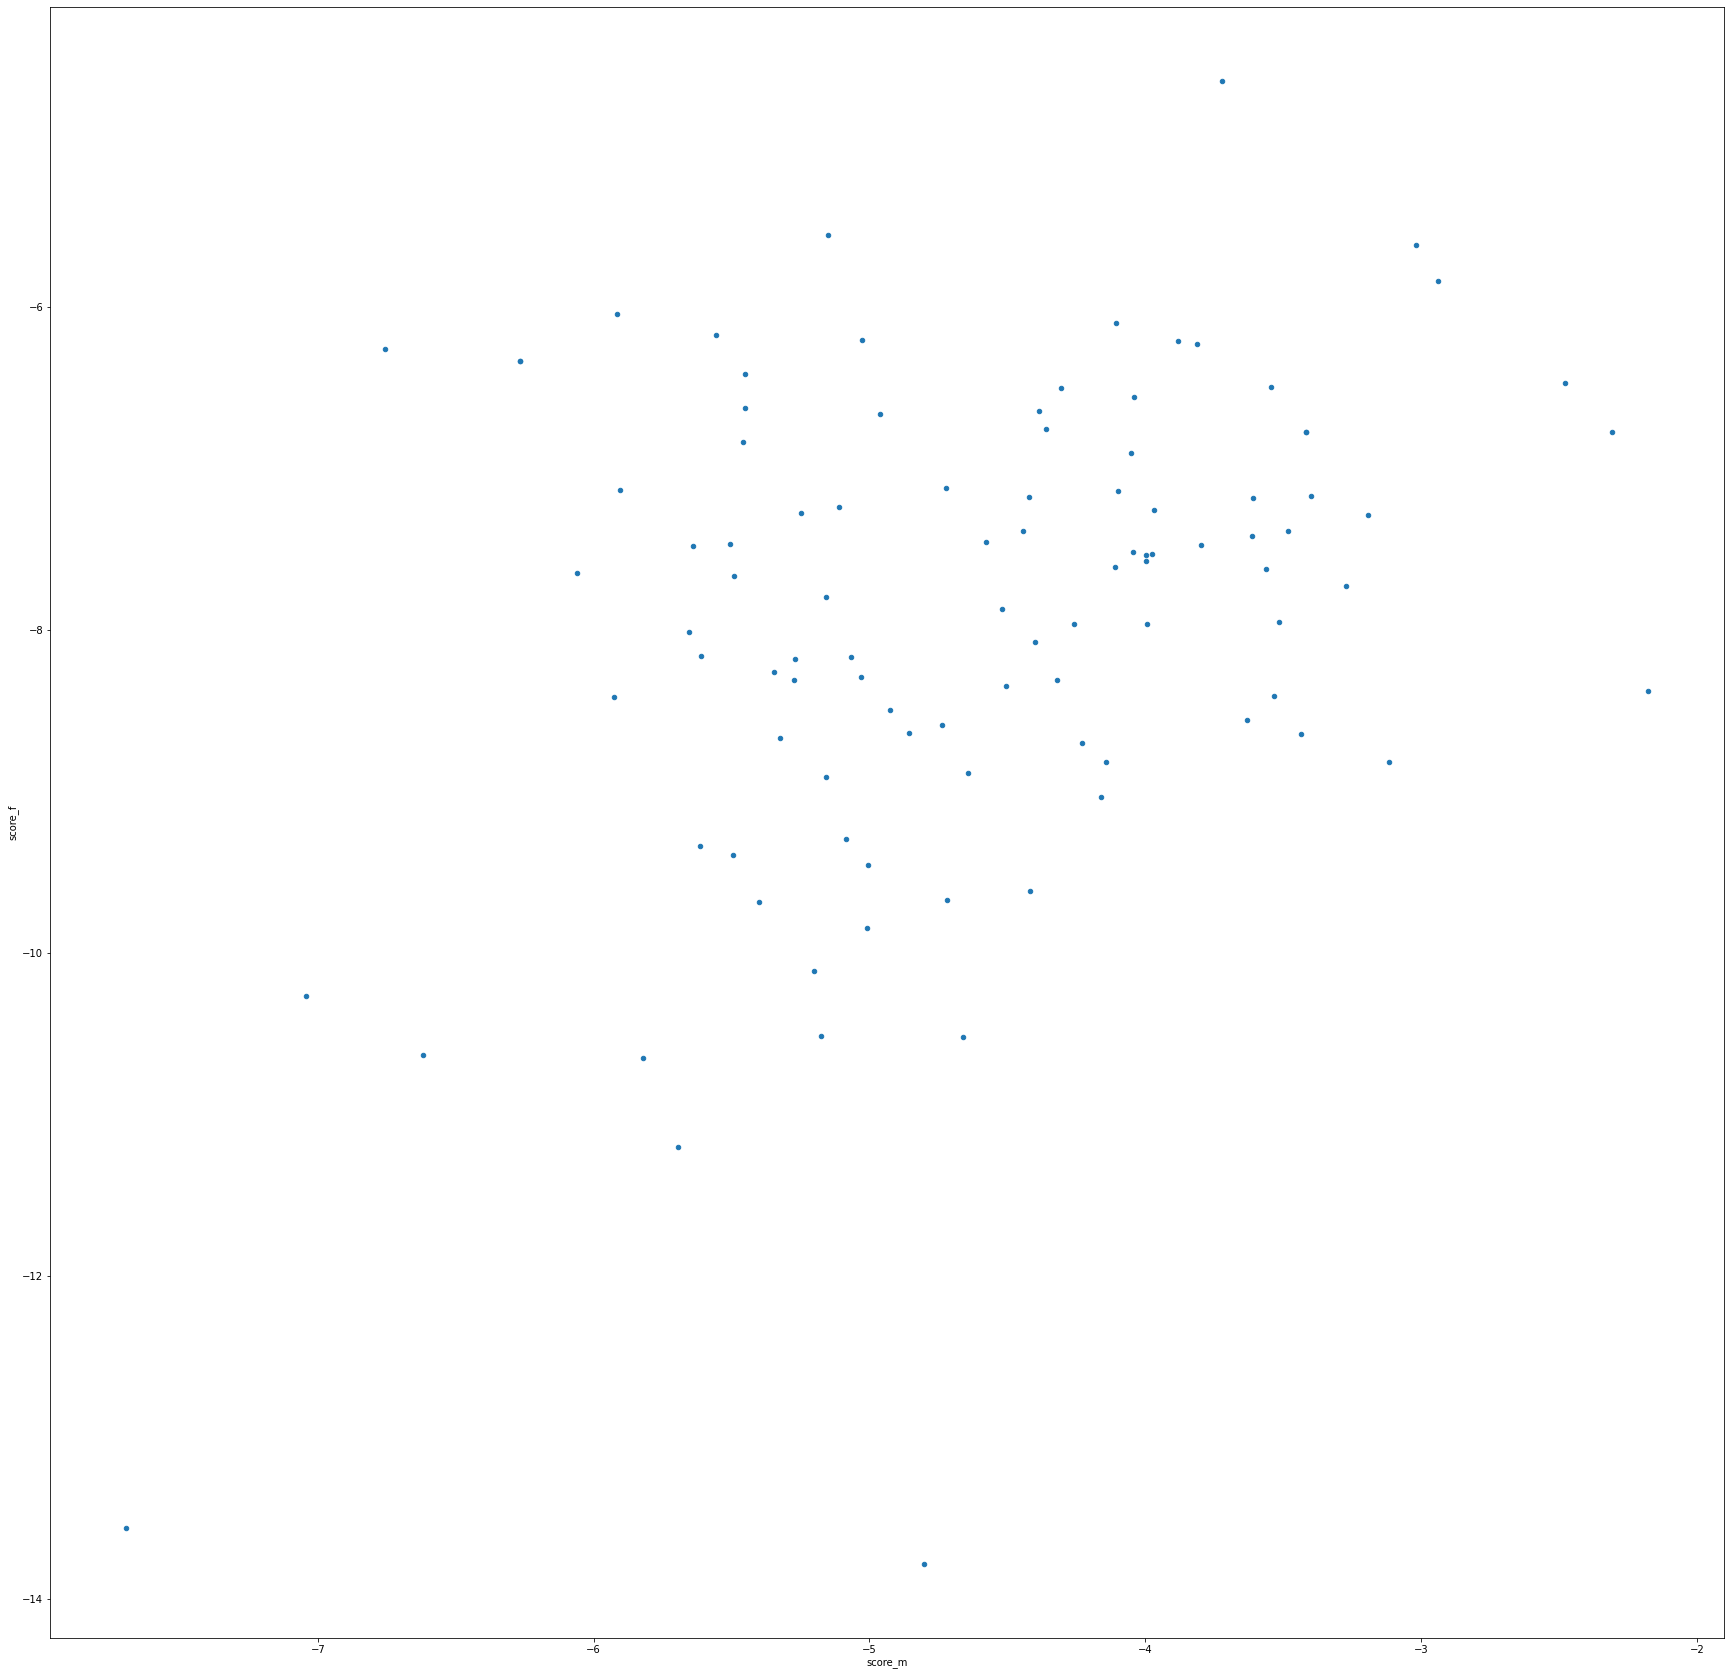

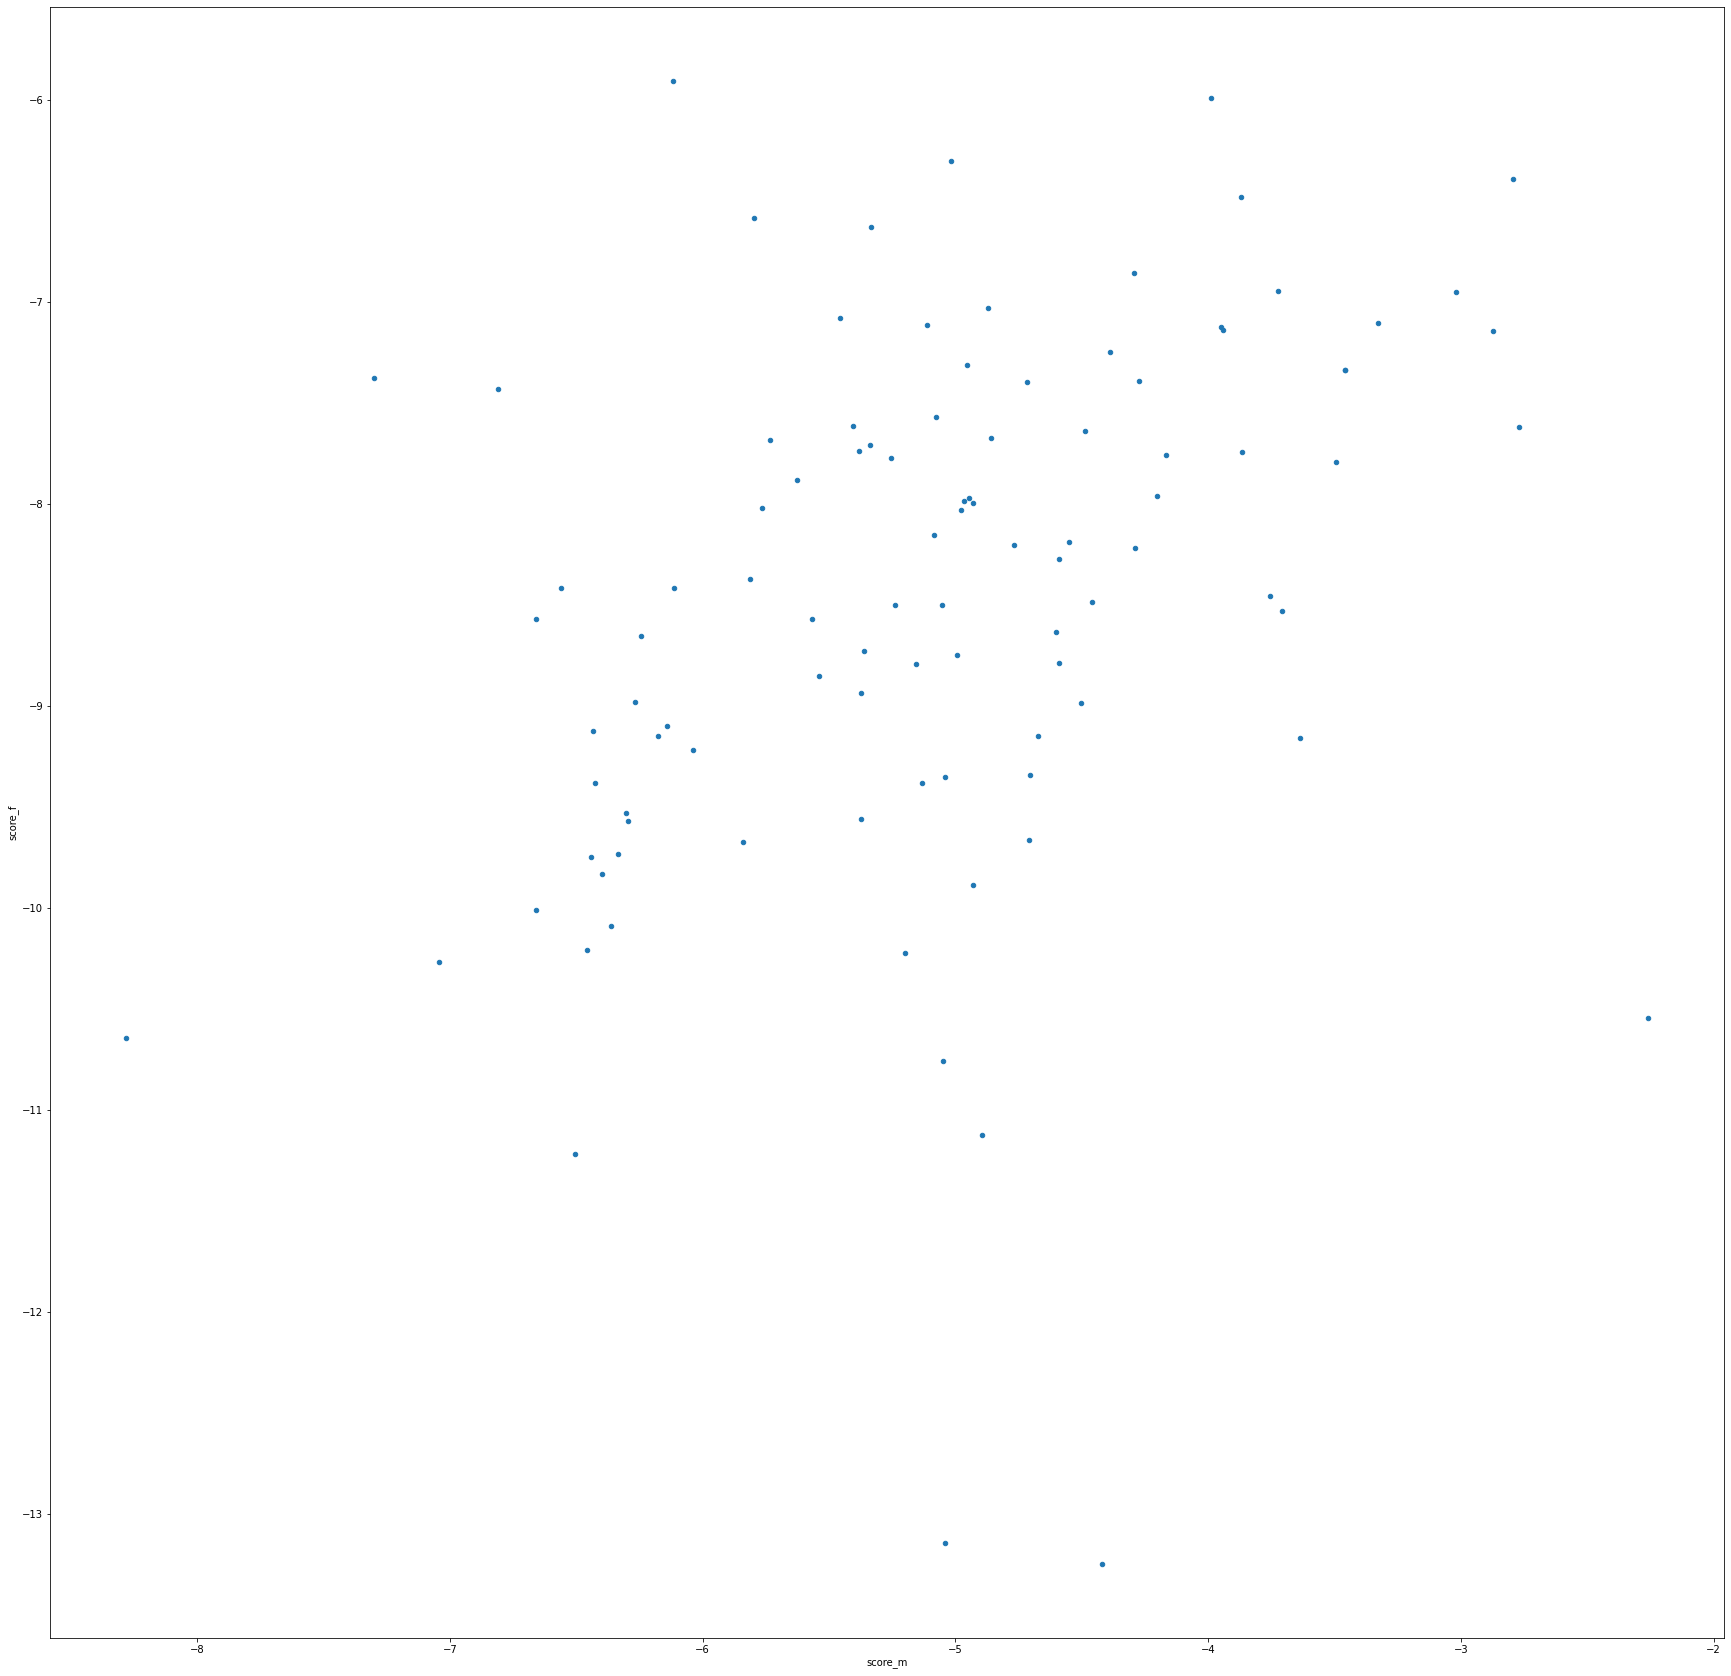

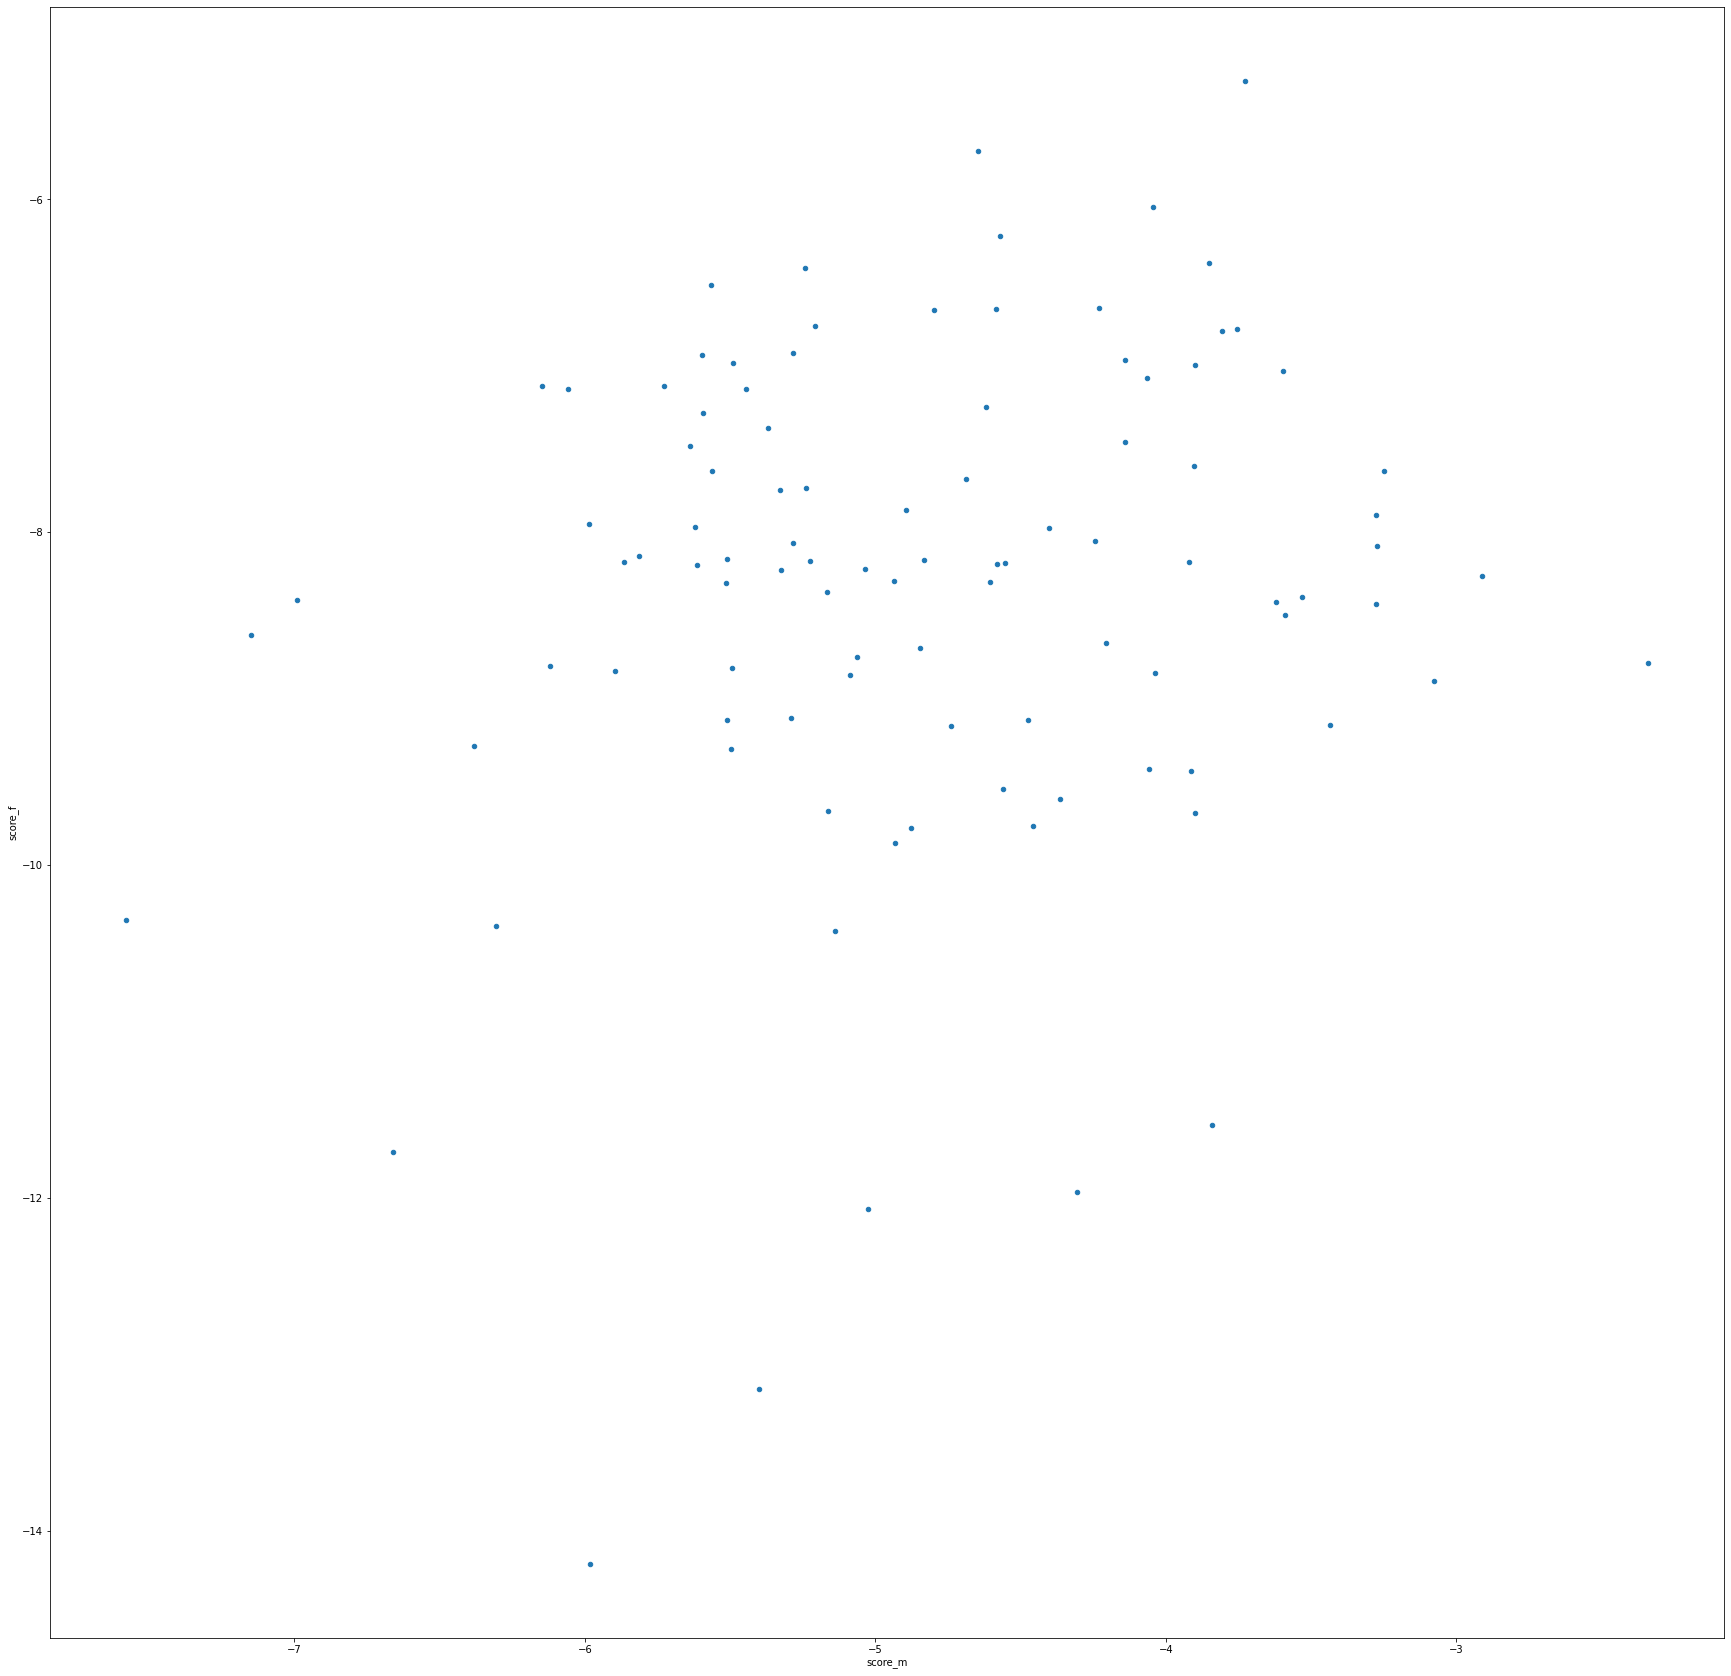

,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0,simple,1,-3.727048,-5.289605,[MASK] me parece muy aburrido,[MASK] me parece muy aburrida,el,ella
1,1,simple,2,-4.063340,-7.076112,[MASK] me parece muy agresivo,[MASK] me parece muy agresiva,el,ella
2,2,simple,3,-4.207183,-8.665222,[MASK] me parece muy antipático,[MASK] me parece muy antipática,el,ella
3,3,simple,4,-5.290009,-9.119690,[MASK] me parece muy aprovechado,[MASK] me parece muy aprovechada,el,ella
4,4,simple,5,-5.238946,-7.735723,[MASK] me parece muy autoritario,[MASK] me parece muy autoritaria,el,ella
...,...,...,...,...,...,...,...,...,...
95,95,simple,96,-5.729258,-7.123303,[MASK] me parece muy vergonzoso,[MASK] me parece muy vergozosa,el,ella
96,96,simple,97,-5.494917,-8.817638,[MASK] me parece muy vicioso,[MASK] me parece muy viciosa,el,ella
97,97,simple,98,-3.530753,-8.392366,[MASK] me parece muy violento,[MASK] me parece muy violenta,el,ella
98,98,simple,99,-5.324697,-8.225191,[MASK] me parece muy zoquete,[MASK] me parece muy zoquete,el,ella


In [14]:
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivocolores-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivootros-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivopositivo-m2.xlsx')
plot_file('results/Auto/genero-m1_me_parece_muy_adjetivonegativo-m2.xlsx')

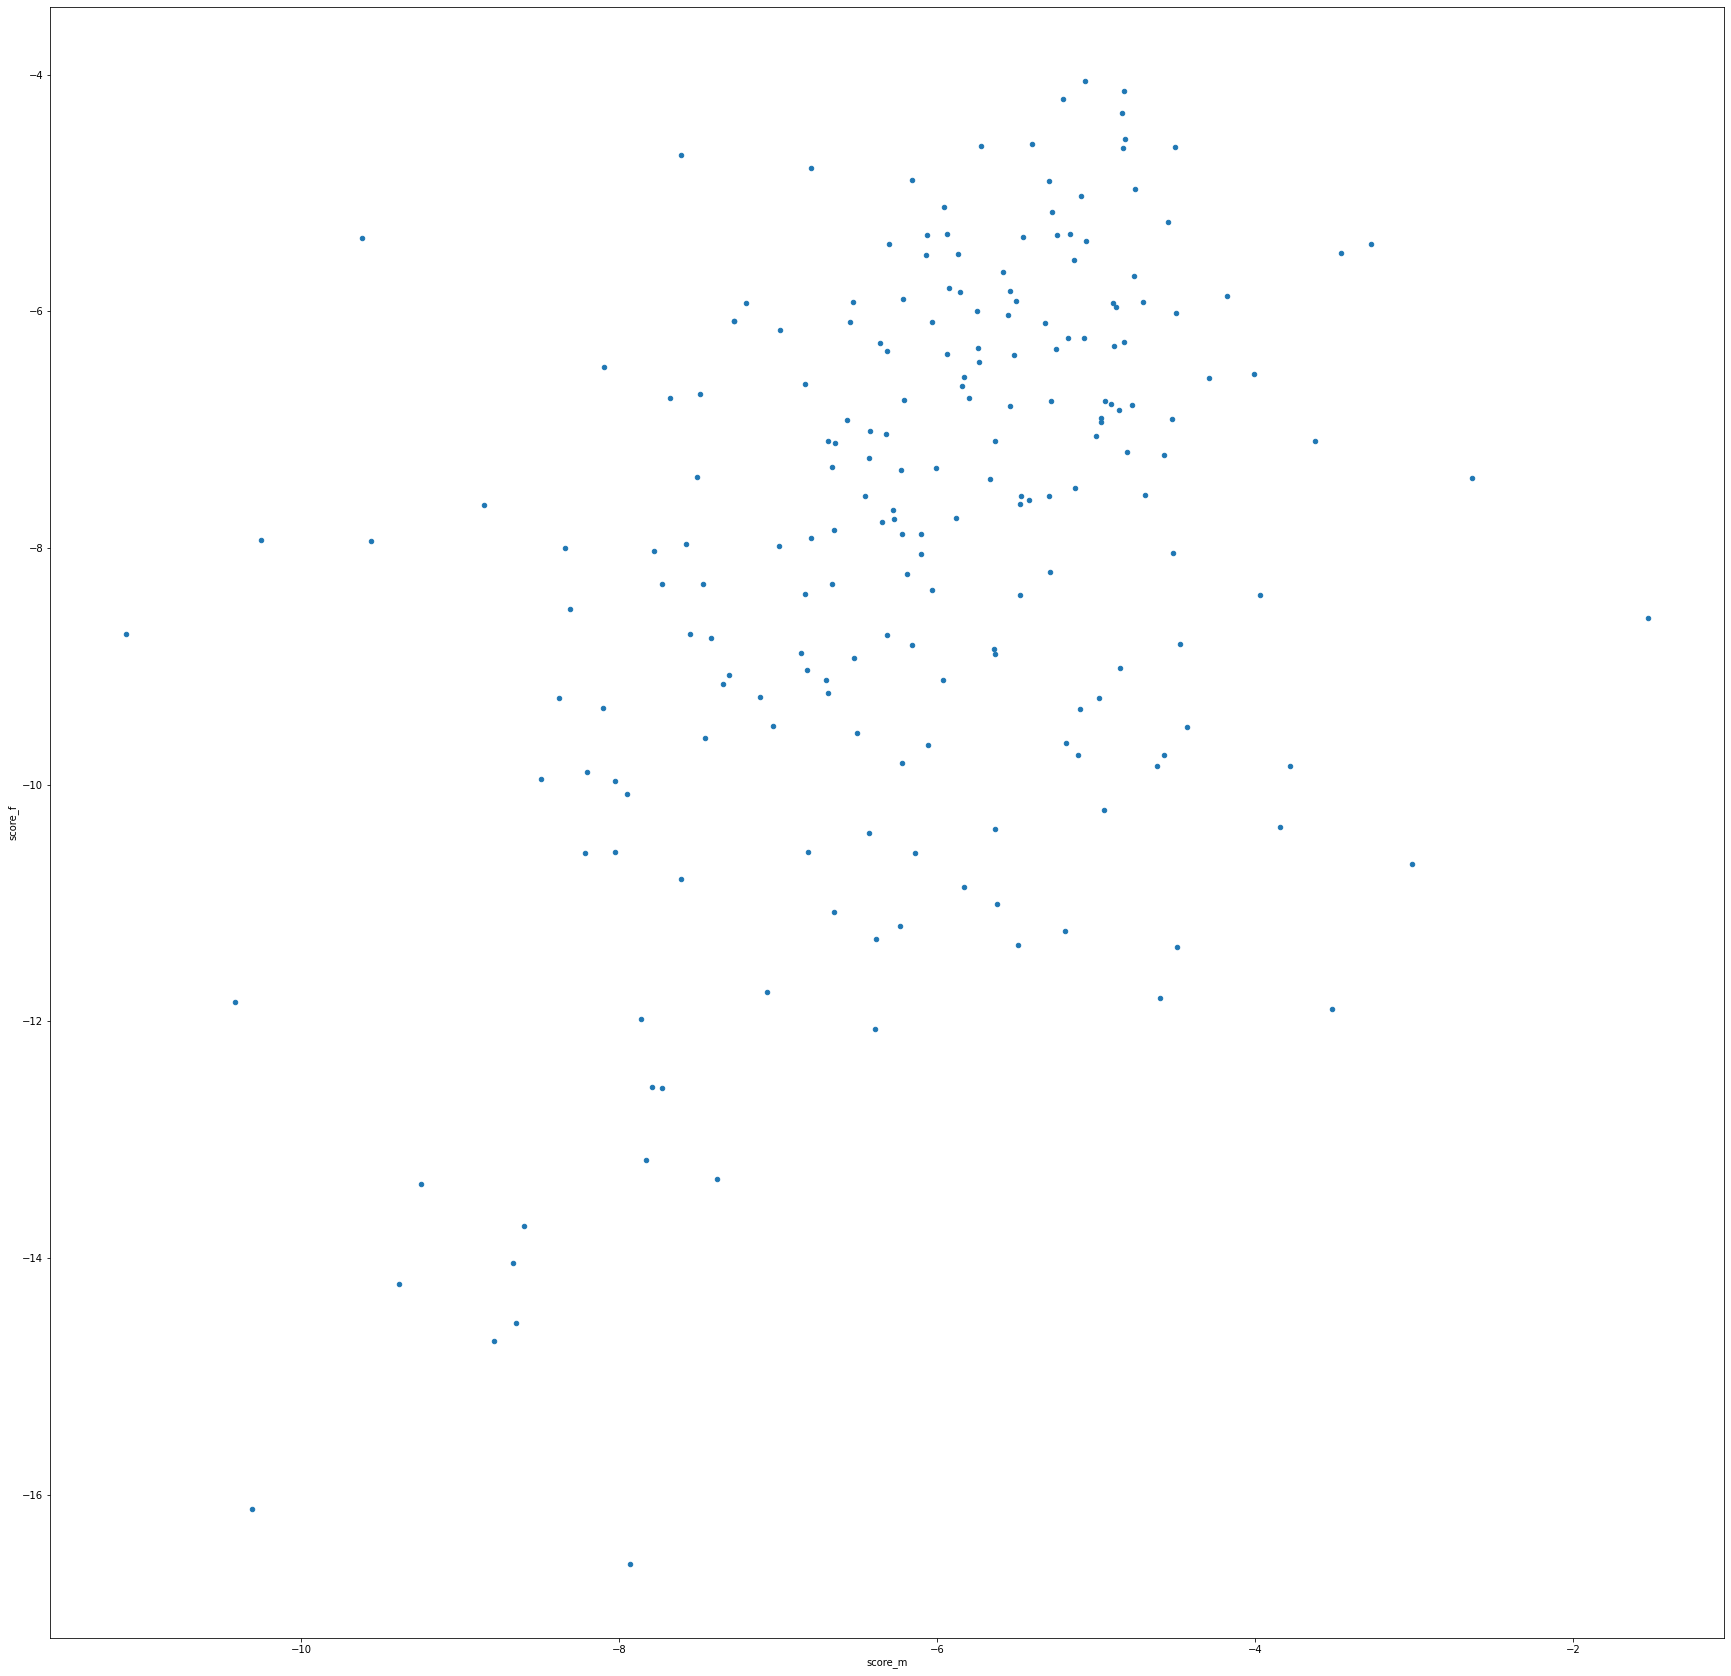

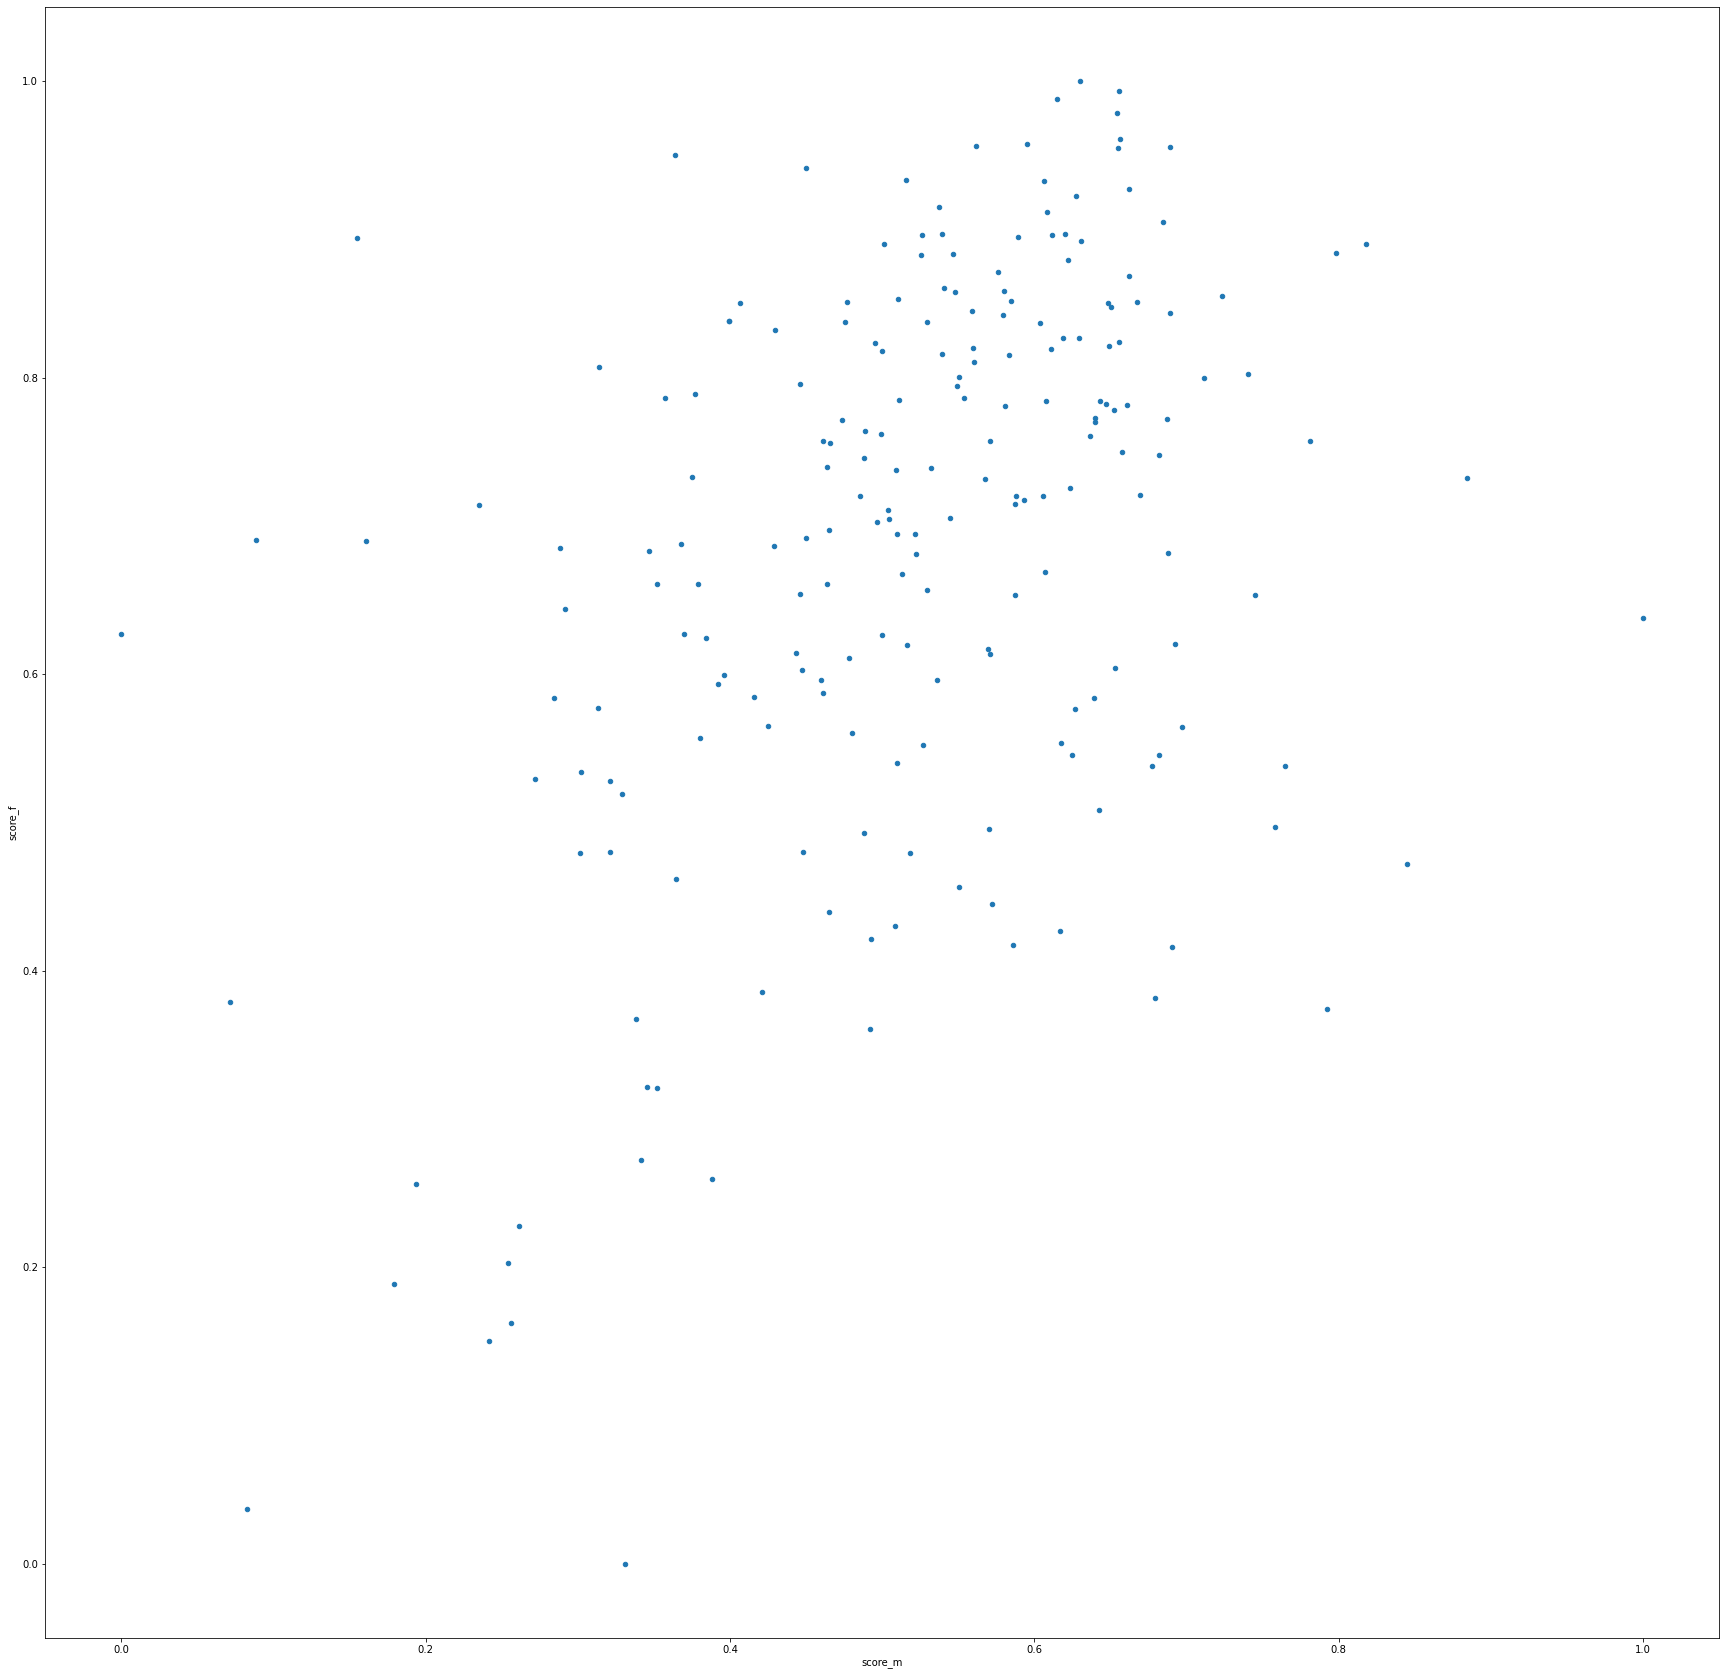

range(1, 30) [-25.764564267205202, -12.979381644577794, -9.369156019852369, -7.636027558894584, -6.39053015785385, -5.565259195048743, -4.922651799747659, -4.3360816332344685, -3.857432435926527, -3.4455145637209426, -3.1871369191491135, -2.9970803679800433, -2.765946698554505, -2.5999227100468723, -2.4371244506807686, -2.2221272089652464, -2.157856520247184, -1.9877638365508525, -1.9368375082335216, -1.804645999371949, -1.6957871827169735, -1.66387695267644, -1.5176719487534802, -1.452755102501414, -1.4415117794861607, -1.3939198858421418, -1.3184800935496492, -1.1753284550783627, -1.157946437388539]
[[0.25125374 0.25125374 0.51998317 0.65477945]
 [0.75357629 0.75357629 0.51860811 0.71611949]]
2 -21.32580523886918


,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f,target_value_m,target_value_f
0,0.000000,simple,0.000000,0.592972,0.717186,[MASK] es abogado,[MASK] es abogada,el,ella
1,0.004831,simple,0.004831,0.669186,0.720686,[MASK] es acompañante turístico,[MASK] es acompañante turístico,el,ella
2,0.009662,simple,0.009662,0.488942,0.764135,[MASK] es actor,[MASK] es actriz,el,ella
3,0.014493,simple,0.014493,0.485311,0.720473,[MASK] es actuario,[MASK] es actuaria,el,ella
4,0.019324,simple,0.019324,0.617019,0.426675,[MASK] es adiestrador,[MASK] es adiestradora,el,ella
...,...,...,...,...,...,...,...,...,...
203,0.980676,simple,0.980676,0.496752,0.702333,[MASK] es vendedor,[MASK] es vendedora,el,ella
204,0.985507,simple,0.985507,0.687750,0.681506,[MASK] es veterinario,[MASK] es veterinaria,el,ella
205,0.990338,simple,0.990338,0.478154,0.610927,[MASK] es vigilante,[MASK] es vigilante,el,ella
206,0.995169,simple,0.995169,0.450089,0.941637,[MASK] es zapatero,[MASK] es zapatera,el,ella


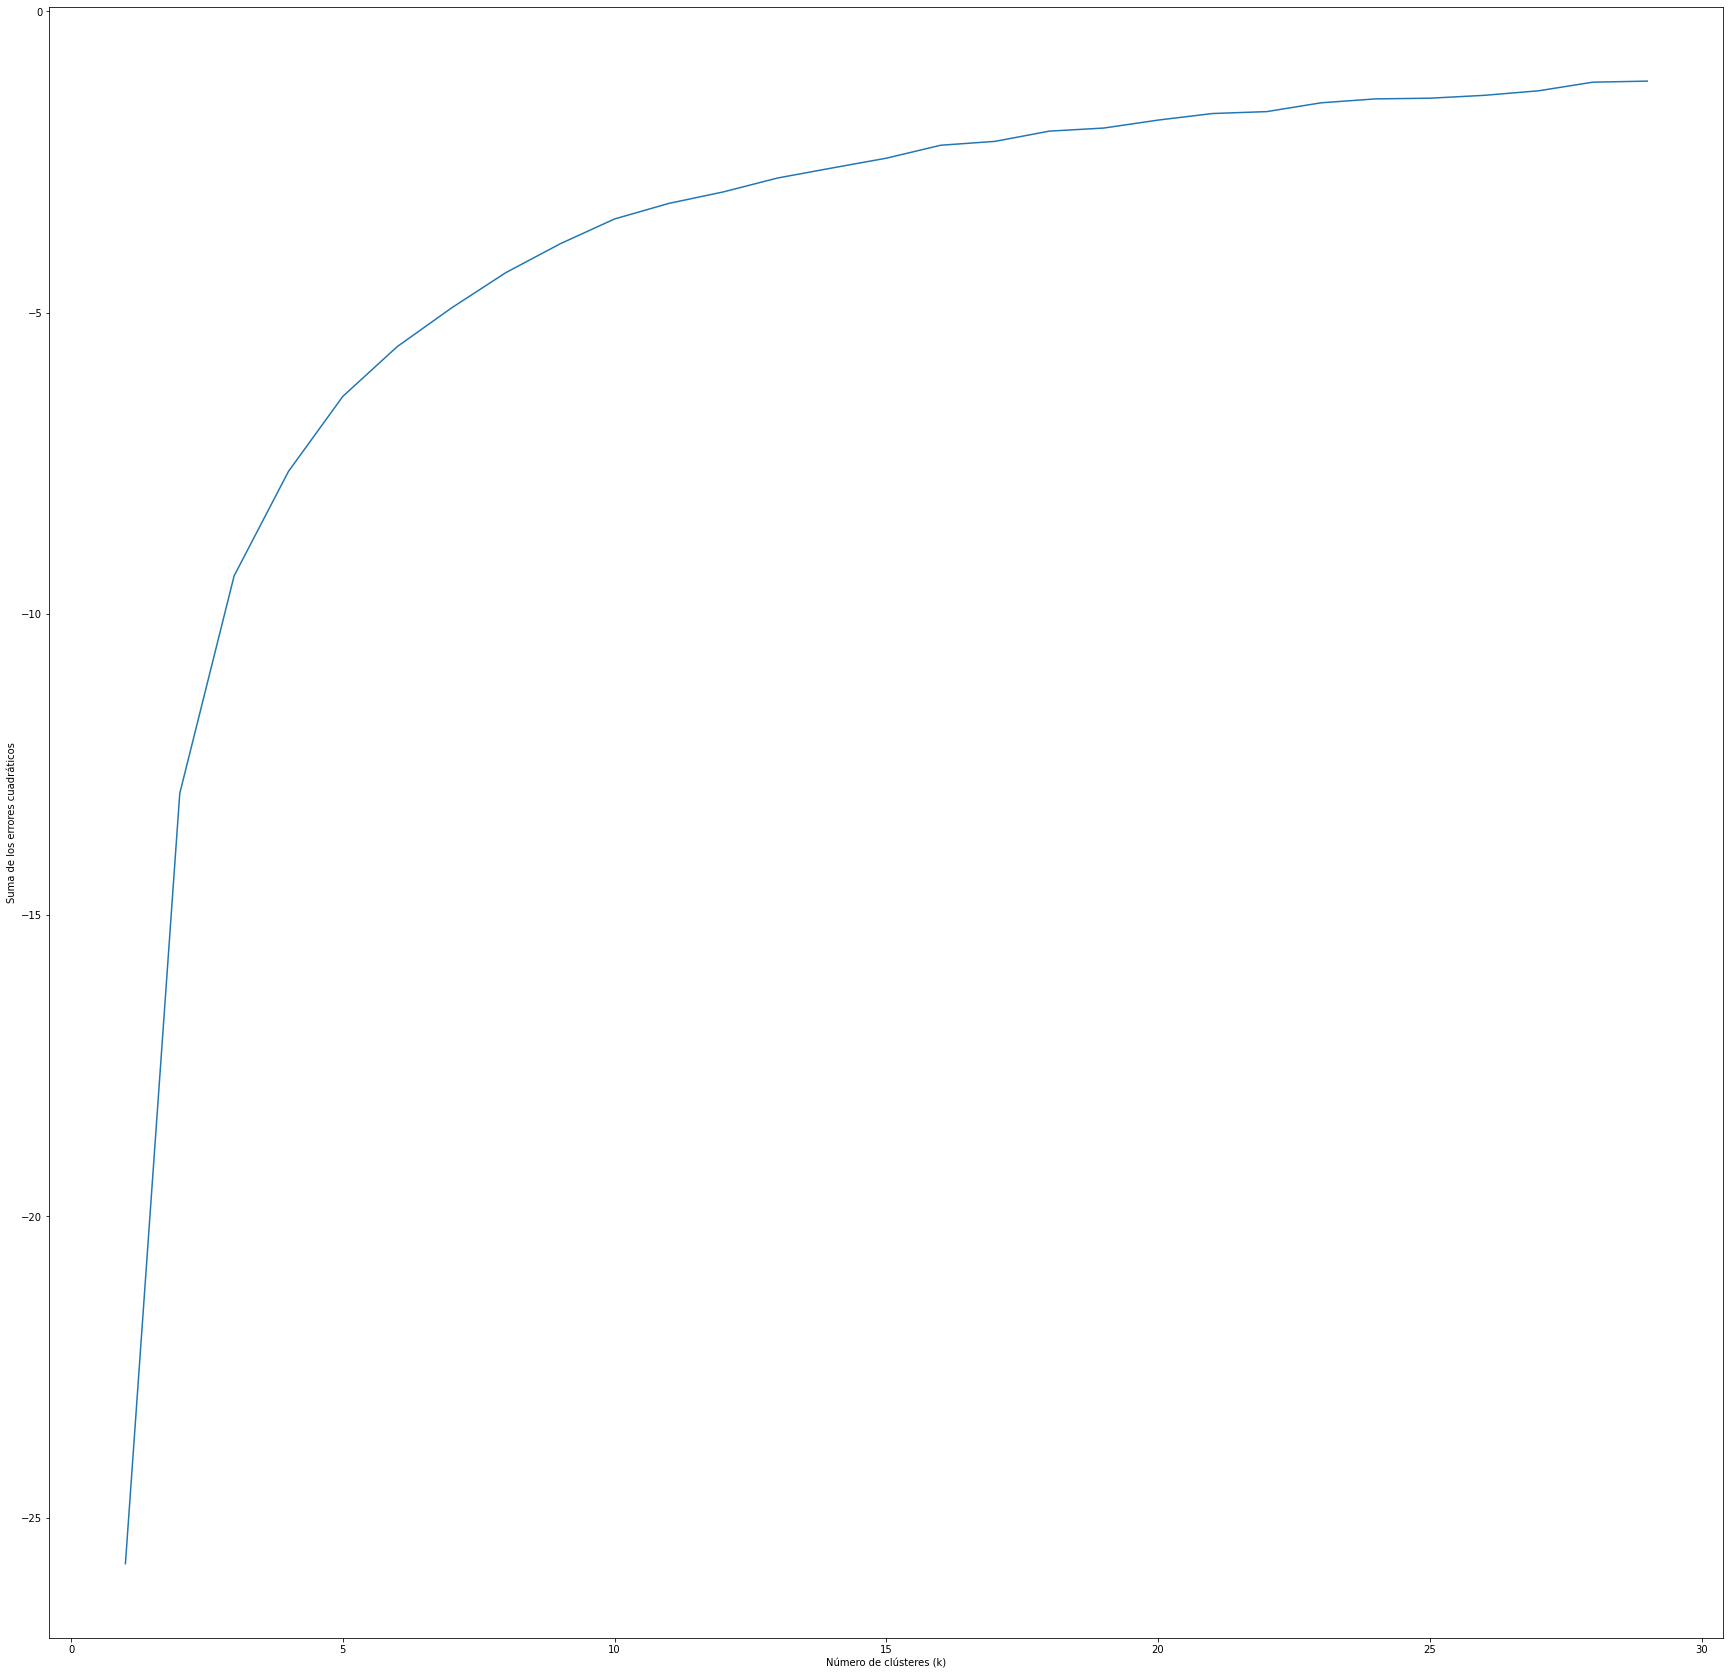

In [15]:
df_profesiones = plot_all('results/Auto/genero-m1_es_profesion-m2.xlsx', False)
df_profesiones

In [16]:
print(df_profesiones)

     Unnamed: 0    type  test_uid   score_m   score_f  \
0      0.000000  simple  0.000000  0.592972  0.717186   
1      0.004831  simple  0.004831  0.669186  0.720686   
2      0.009662  simple  0.009662  0.488942  0.764135   
3      0.014493  simple  0.014493  0.485311  0.720473   
4      0.019324  simple  0.019324  0.617019  0.426675   
..          ...     ...       ...       ...       ...   
203    0.980676  simple  0.980676  0.496752  0.702333   
204    0.985507  simple  0.985507  0.687750  0.681506   
205    0.990338  simple  0.990338  0.478154  0.610927   
206    0.995169  simple  0.995169  0.450089  0.941637   
207    1.000000  simple  1.000000  0.256021  0.162175   

                   masked_sentence_m                masked_sentence_f  \
0                  [MASK] es abogado                [MASK] es abogada   
1    [MASK] es acompañante turístico  [MASK] es acompañante turístico   
2                    [MASK] es actor                 [MASK] es actriz   
3                 [MASK

In [17]:
df_profesiones.describe()

,Unnamed: 0,test_uid,score_m,score_f
count,208.000000,208.000000,208.000000,208.000000
mean,0.500000,0.500000,0.519302,0.685155
std,0.290766,0.290766,0.154928,0.194005
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.440060,0.576739
50%,0.500000,0.500000,0.534198,0.719920
75%,0.750000,0.750000,0.626765,0.833033
max,1.000000,1.000000,1.000000,1.000000


In [18]:
df_profesiones.value_counts('target_value_m')

target_value_m
el    208
dtype: int64

In [19]:
df_profesiones2 = df_profesiones.drop('target_value_m', 1)
df_profesiones2 = df_profesiones2.drop('target_value_f', 1)
df_profesiones2

,Unnamed: 0,type,test_uid,score_m,score_f,masked_sentence_m,masked_sentence_f
0,0.000000,simple,0.000000,0.592972,0.717186,[MASK] es abogado,[MASK] es abogada
1,0.004831,simple,0.004831,0.669186,0.720686,[MASK] es acompañante turístico,[MASK] es acompañante turístico
2,0.009662,simple,0.009662,0.488942,0.764135,[MASK] es actor,[MASK] es actriz
3,0.014493,simple,0.014493,0.485311,0.720473,[MASK] es actuario,[MASK] es actuaria
4,0.019324,simple,0.019324,0.617019,0.426675,[MASK] es adiestrador,[MASK] es adiestradora
...,...,...,...,...,...,...,...
203,0.980676,simple,0.980676,0.496752,0.702333,[MASK] es vendedor,[MASK] es vendedora
204,0.985507,simple,0.985507,0.687750,0.681506,[MASK] es veterinario,[MASK] es veterinaria
205,0.990338,simple,0.990338,0.478154,0.610927,[MASK] es vigilante,[MASK] es vigilante
206,0.995169,simple,0.995169,0.450089,0.941637,[MASK] es zapatero,[MASK] es zapatera


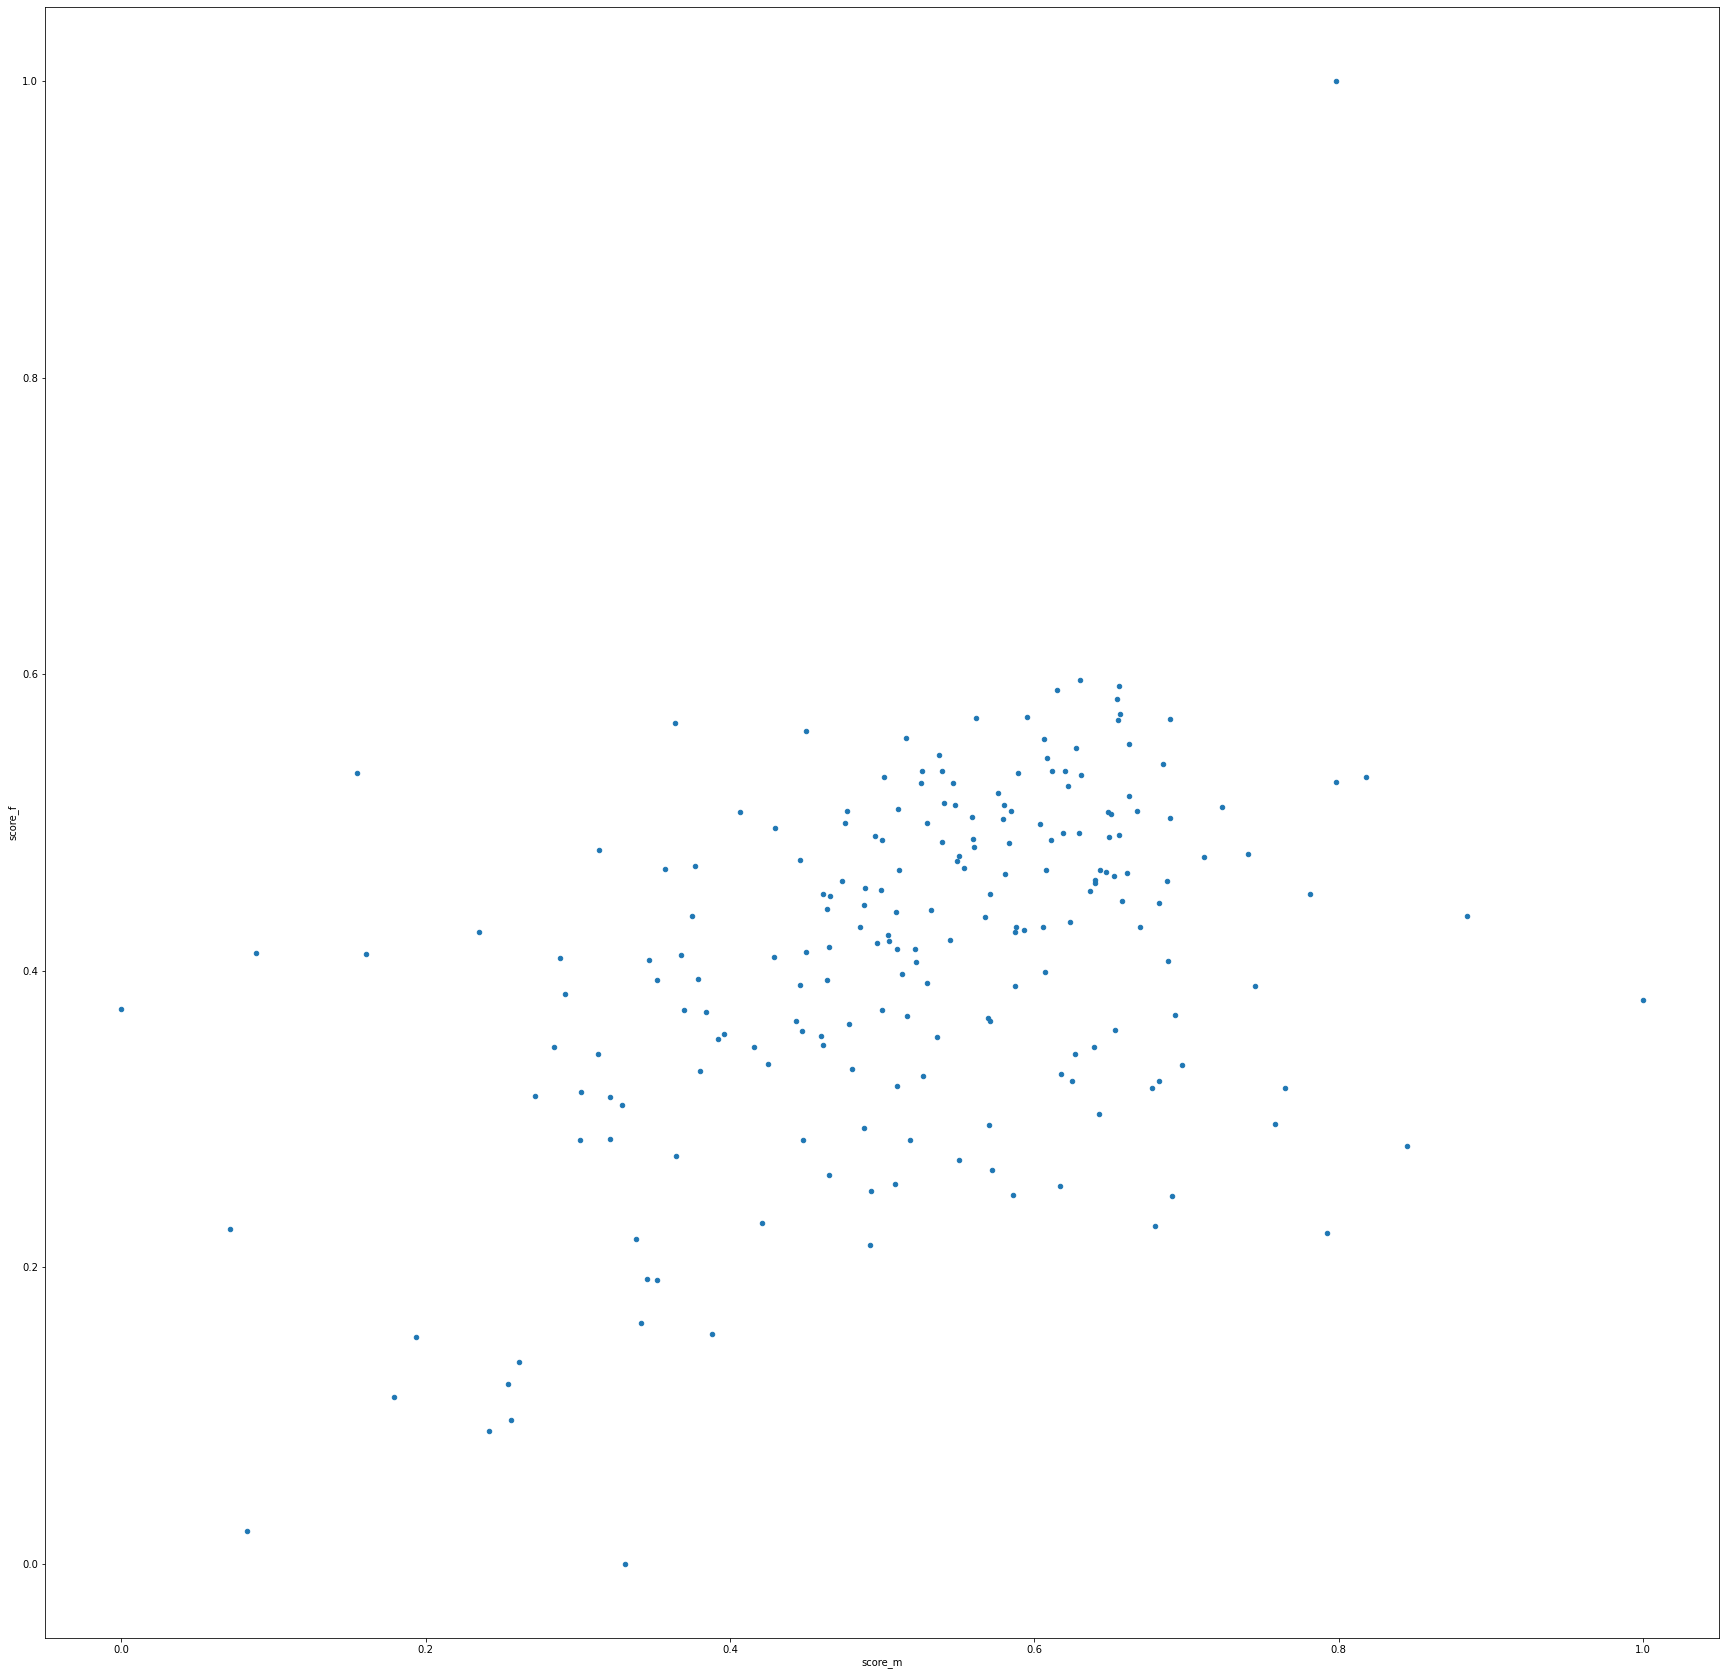

In [20]:
df_profesiones3 = df_profesiones2
df_profesiones3 = df_profesiones2.groupby(['masked_sentence_m']).agg({'score_m': 'sum', 'score_f': 'sum'})
df_profesiones3n = normalize(df_profesiones3)

show_scatter(df_profesiones3n, False)



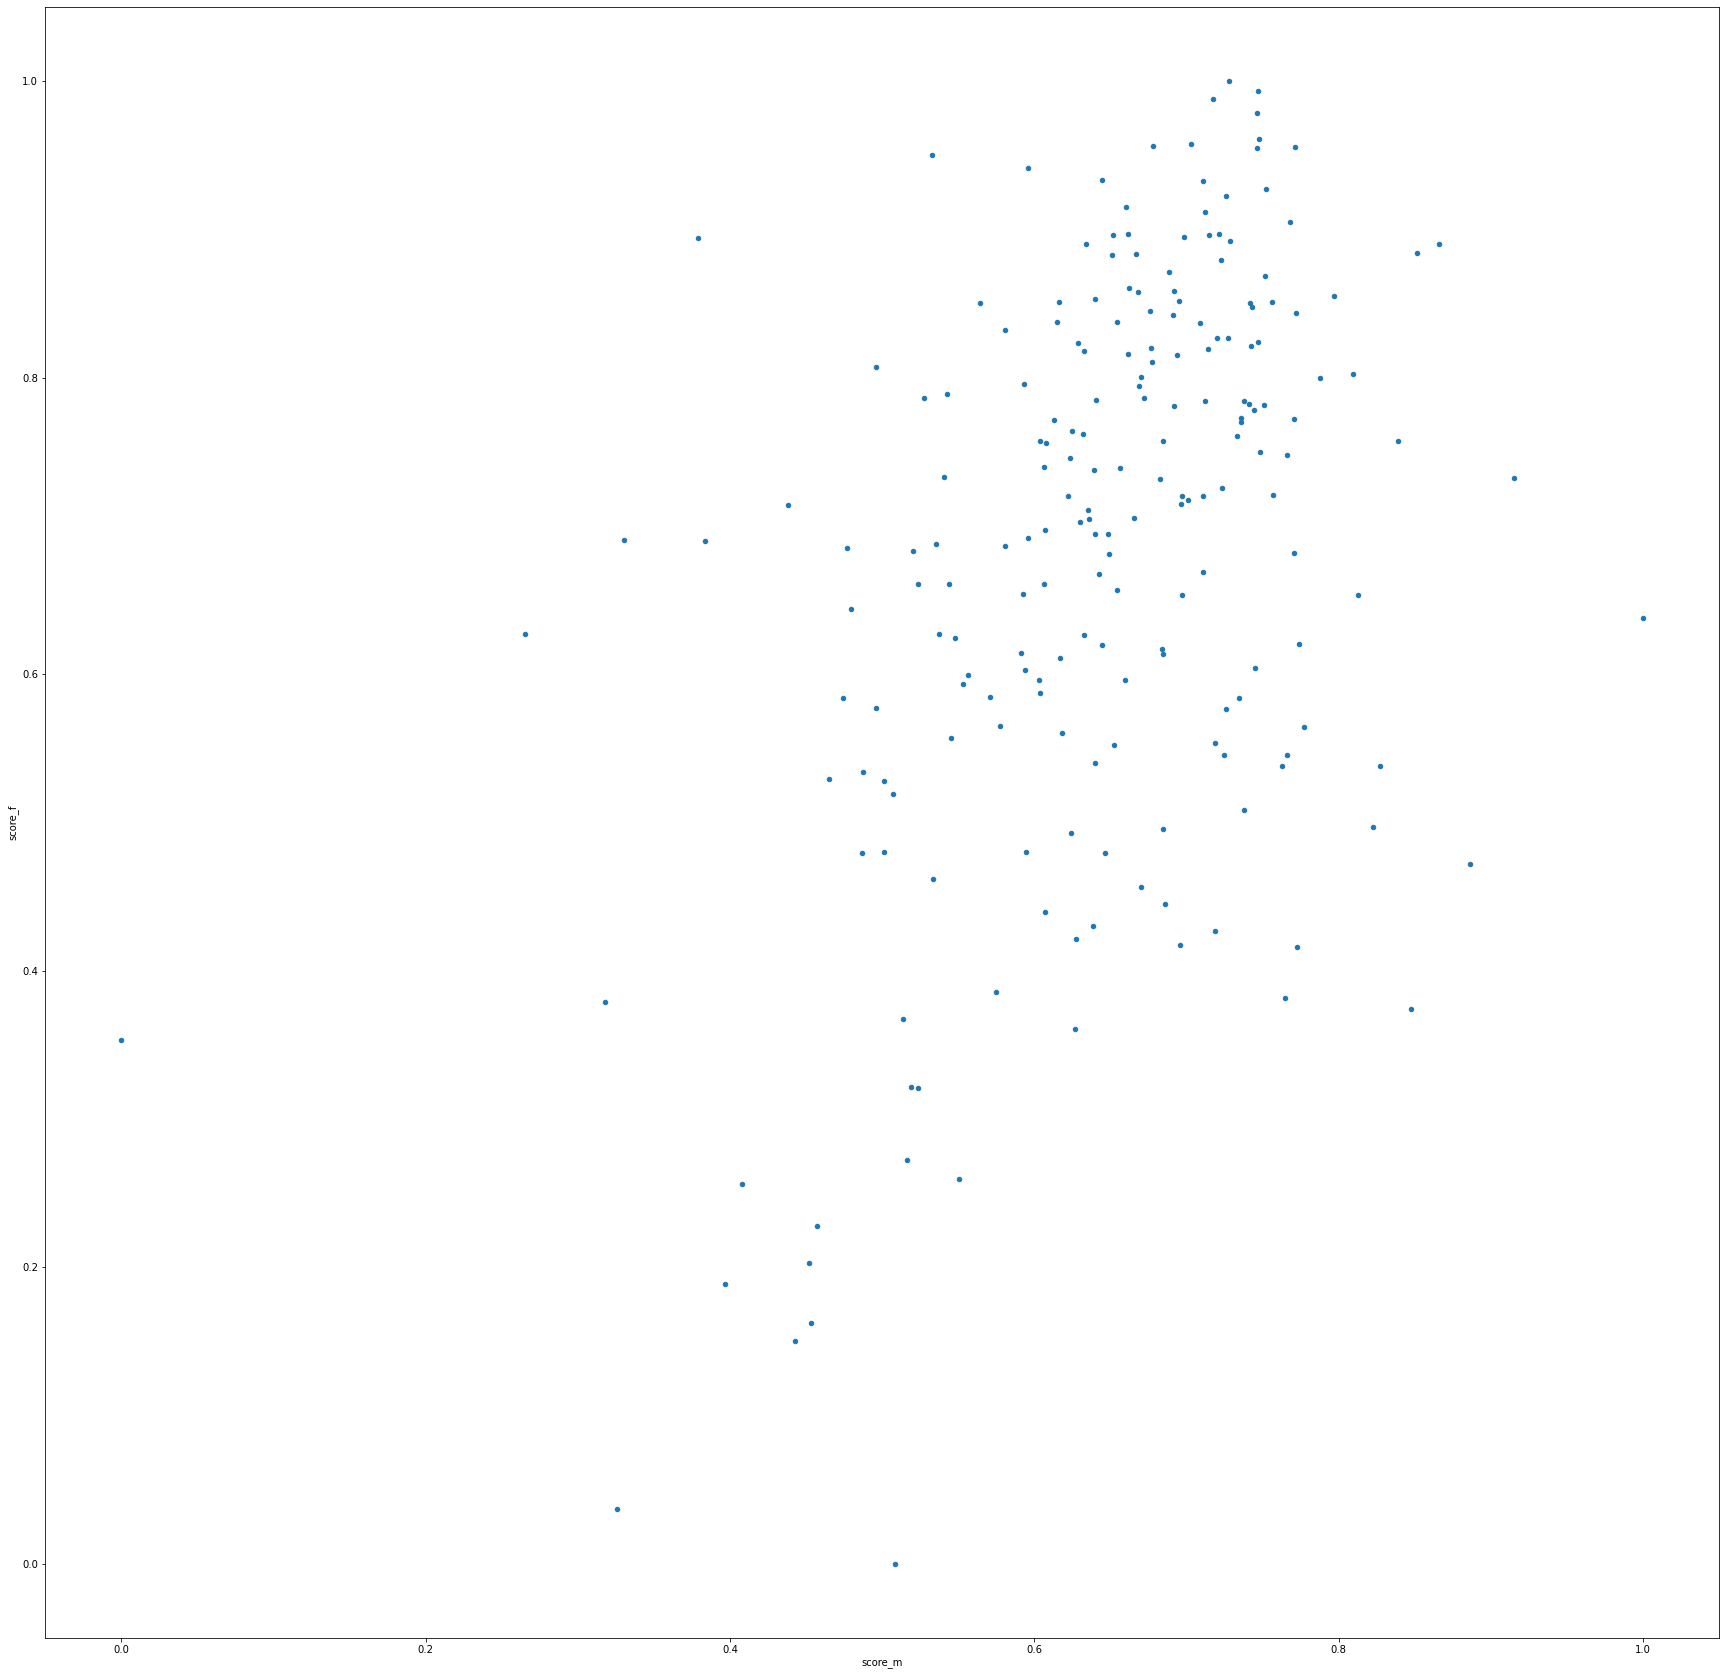

In [21]:
df = read('results/Auto/genero-m1_es_profesion-m2.xlsx')
dfg = df.groupby(['masked_sentence_m']).agg({'score_m': 'sum', 'score_f': 'sum'})
dfn = normalize(dfg)

show_scatter(dfn, False)
